## Module Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

from sklearn.model_selection import train_test_split
from joblib import dump,load
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import scipy.spatial.distance as sdist
import pickle

### Mount Google Drive to Google Colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Understanding

### **Identify datasets with NaN or None values**

In [4]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Week1_challenge_data_source(CSV).csv', na_values=['undefined','?', None])
db.head() # the fisrt five rows

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0  9.16456699548519E+015             42.0              5.0   
1                L77566A             65.0              5.0   
2                D42335A              NaN              NaN   
3                T21824A              NaN              NaN   
4                D88865A              NaN              NaN   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     23.0                     44.0   
1                     16.0                     26.0   
2                      6.0                      9.0   
3                     44.0                     44.0   
4                      6.0                      9.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                   0.0              NaN              NaN   
1                   0.0              NaN              NaN   
2                   0.0              NaN              NaN   
3                   0.0              NaN              NaN   
4                   0.0              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)   Dur. (ms).1  \
0                    37624.0                    38787.0  1.823653e+09   
1                      168.0                     3560.0  1.365104e+09   
2                        0.0                        0.0  1.361763e+09   
3                     3330.0                    37882.0  1.321510e+09   
4                        0.0                        0.0  1.089009e+09   

  Handset Manufacturer                 Handset Type  \
0              Samsung   Samsung Galaxy A5 Sm-A520F   
1   

# Size of the dataset
### Columns of the dataset

In [5]:
# list of column  names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

### Number of columns

In [6]:
print(f"Number of columns: ", len(db.columns))

Number of columns:  55


### Number of data points and data size

In [7]:
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


### Features/columns and their data type

In [8]:
db.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

### Min and Max values of each column

In [9]:
db.max()

Bearer Id                                   1.318654e+19
Start ms                                    9.990000e+02
End ms                                      9.990000e+02
Dur. (ms)                                   1.859336e+06
IMSI                                        2.140743e+14
MSISDN/Number                               8.823971e+14
IMEI                                        9.900120e+13
Avg RTT DL (ms)                             9.692300e+04
Avg RTT UL (ms)                             7.120000e+03
Avg Bearer TP DL (kbps)                     3.781600e+05
Avg Bearer TP UL (kbps)                     5.861300e+04
TCP DL Retrans. Vol (Bytes)                 4.294426e+09
TCP UL Retrans. Vol (Bytes)                 2.908226e+09
DL TP < 50 Kbps (%)                         1.000000e+02
50 Kbps < DL TP < 250 Kbps (%)              9.300000e+01
250 Kbps < DL TP < 1 Mbps (%)               1.000000e+02
DL TP > 1 Mbps (%)                          9.400000e+01
UL TP < 10 Kbps (%)            

In [10]:
db.min()

Bearer Id                                   6.917538e+18
Start ms                                    0.000000e+00
End ms                                      0.000000e+00
Dur. (ms)                                   7.142000e+03
IMSI                                        2.040471e+14
MSISDN/Number                               3.360100e+10
IMEI                                        4.400152e+11
Avg RTT DL (ms)                             0.000000e+00
Avg RTT UL (ms)                             0.000000e+00
Avg Bearer TP DL (kbps)                     0.000000e+00
Avg Bearer TP UL (kbps)                     0.000000e+00
TCP DL Retrans. Vol (Bytes)                 2.000000e+00
TCP UL Retrans. Vol (Bytes)                 1.000000e+00
DL TP < 50 Kbps (%)                         0.000000e+00
50 Kbps < DL TP < 250 Kbps (%)              0.000000e+00
250 Kbps < DL TP < 1 Mbps (%)               0.000000e+00
DL TP > 1 Mbps (%)                          0.000000e+00
UL TP < 10 Kbps (%)            

### Utility Functions

In [11]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 3), "%", "missing values.")


# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

# fill missing numeric values with mean and object type values with mode
def fill_missing_values(df):
  for column in df.columns:
    if df[column].dtype == 'float64':
      df[column] = df[column].fillna(df[column].mean())
    elif df[column].dtypes == 'object':
      df[column] = df[column].fillna(df[column].mode()[0])
  return df


def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

In [12]:
percent_missing(db)

The dataset contains 12.72 % missing values.


### Missing Value table

In [13]:
missing_values_table(db)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254              86.84   
Nb of sec with 6250B < Vol UL < 37500B            111843              74.56   
Nb of sec with 125000B < Vol DL                    97538              65.02   
TCP UL Retrans. Vol (Bytes)                        96649              64.43   
Nb of sec with 31250B < Vol DL < 125000B           93586              62.39   
Nb of sec with 1250B < Vol UL < 6250B              92894              61.93   
Nb of sec with 6250B < Vol DL < 31250B             88317              58.88   
TCP DL Retrans. Vol (Bytes)                        88146              58.76   
HTTP UL (Bytes)                                    81810              54.54   
HTTP DL (Bytes)                                    81474              54.32   
Avg RTT DL (ms)                                    27829              18.55   
Avg RTT UL (ms)                                    27812              18.54   
Handset Manufacturer                                9559               6.37   
Handset Type                                        9559               6.37   
Last Location Name                                  1153               0.77   
MSISDN/Number                                       1066               0.71   
Bearer Id                                            991               0.66   
Nb of sec with Vol UL < 1250B                        793               0.53   
10 Kbps < UL TP < 50 Kbps (%)                        792               0.53   
UL TP > 300 Kbps (%)                                 792               0.53   
50 Kbps < UL TP < 300 Kbps (%)                       792               0.53   
UL TP < 10 Kbps (%)                                  792               0.53   
Nb of sec with Vol DL < 6250B                        755               0.50   
250 Kbps < DL TP < 1 Mbps (%)                        754               0.50   
50 Kbps < DL TP < 250 Kbps (%)                       754               0.50   
DL TP < 50 Kbps (%)                                  754               0.50   
DL TP > 1 Mbps (%)                                   754               0.50   
IMEI                                                 572               0.38   
IMSI                                                 570               0.38   
Start                                                  1               0.00   
End ms                                                 1               0.00   
Total UL (Bytes)                                       1               0.00   
Start ms                                               1               0.00   
End                                                    1               0.00   
Avg Bearer TP DL (kbps)                                1               0.00   
Dur. (ms)                                              1               0.00   
Avg Bearer TP UL (kbps)                                1               0.00   
Dur. (ms).1                                            1               0.00   
Activity Duration UL (ms)                              1               0.00   
Activity Duration DL (ms)                              1               0.00   
Total DL (Bytes)                                       1               0.00   

                                            Dtype  
Nb of sec with 37500B < Vol UL            float64  
Nb of sec with 6250B < Vol UL < 37500B    float64  
Nb of sec with 125000B < Vol DL           float64  
TCP UL Retrans. Vol (Bytes)               float64  
Nb of sec with 31250B < Vol DL < 125000B  float64  
Nb of sec with 1250B < Vol UL < 6250B     float64  
Nb of sec with 6250B < Vol DL < 31250B    float64  
TCP DL Retrans. Vol (Bytes)               float64  
HTTP UL (Bytes)                           float64  
HTTP DL (Bytes)                           float64  
Avg RTT DL (ms)                           float64  
Avg RTT UL (ms)                           float64  
Handset Manufacturer                       obje

### Columns with missing values count

The Column "Nb of sec with 37500B < Vol UL" has maximum missing values of 130254 occurances

In [14]:
db.isna().sum() # missing values of each column

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [15]:
print ("Maximum missing values per column: ", np.max(db.isna().sum())) # print(db.isna().sum().max())

Maximum missing values per column:  130254


# Exploratory Data Analysis

Use Mode method to fill the missing datapoints of all 'object' type features and Mean/Median methods for all numuric type features.
*   use Median method for skewed(negative/positive) numeric feature and 
*   use MEAN/Median for non-skewd/symetrical numeric feature


### Method selection based on data skewness

#### Skewness of each column

In [16]:
db.skew(axis=0)

Bearer Id                                    0.03
Start ms                                     0.00
End ms                                      -0.00
Dur. (ms)                                    3.95
IMSI                                        41.05
MSISDN/Number                              332.16
IMEI                                         1.07
Avg RTT DL (ms)                             62.91
Avg RTT UL (ms)                             28.46
Avg Bearer TP DL (kbps)                      2.59
Avg Bearer TP UL (kbps)                      4.50
TCP DL Retrans. Vol (Bytes)                 15.95
TCP UL Retrans. Vol (Bytes)                 84.11
DL TP < 50 Kbps (%)                         -2.30
50 Kbps < DL TP < 250 Kbps (%)               3.27
250 Kbps < DL TP < 1 Mbps (%)                4.57
DL TP > 1 Mbps (%)                           5.37
UL TP < 10 Kbps (%)                         -8.99
10 Kbps < UL TP < 50 Kbps (%)               10.94
50 Kbps < UL TP < 300 Kbps (%)              21.88


### Skewness visualization with histogram

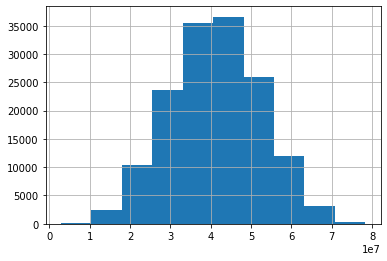

In [17]:
db['Total UL (Bytes)'].hist()

### Positively skewed parameter

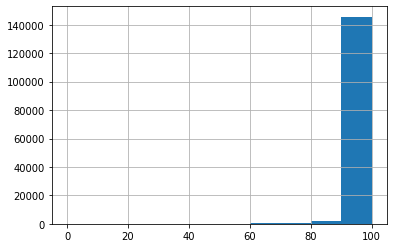

In [18]:
db['UL TP < 10 Kbps (%)'].hist()

### Negatively skewwed parameter

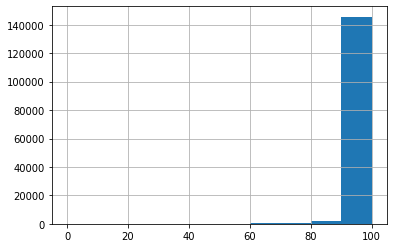

In [19]:
db['UL TP < 10 Kbps (%)'].hist()

### Data with total missing values in each column - revisited

In [20]:
# db.isna().sum()

### Fill missing values
* numeric missing values with mean method
* object type missing values with mode method

In [21]:
fill_missing_values(db).isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

### Other method of handling missing values - Interpolation
* We can use interpolation while working with time-series data because in time-series data we like to fill missing values with previous one or two values.
* It can be used to estimate unknown data points between two known data points.

##### Since we are not considering the time-series nature of the telecom data, we choose not to use interpolation here.

In [22]:
# db.interpolate(inplace=True)

In [23]:
# db.isna().sum()

# Data Transformation
**Scaling and Normalization**

##### Scaling - changing the range of your data 
##### Normalization, you're changing the shape of the distribution of your data.

#### Scaling

* This transforms data so that it fits within a specific scale, like 0-100 or 0-1. 
* It is important when we're using methods based on distance measures of data points like support vector machines (SVM) or k-nearest neighbors (KNN).
* We use the scaler method from sklearn.

#### Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

* Normal distribution ("bell curve", Gaussian distribution) is a specific statistical distribution where a roughly equal observations fall above and below the mean
 * The mean and the median are the same, and there are more observations closer to the mean.

* In general, you'll normalize your data if you're going to be using a machine learning or statistics technique like LDA and Gaussian naive Bayes that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

* We usee the Normalizer method from sklearn



### Numeric Value Scaling

In [24]:
minmax_scaler = preprocessing.MinMaxScaler()
def scalling_numeric_values(df):
  col_values = []
  col_exclude = ['Bearer Id', 'IMSI','MSISDN/Number','IMEI']
  for column in df.columns:
    if df[column].dtype == 'float64' and (column not in col_exclude):
      col_values.append(list(df[column].values))
  col_values_scaled = minmax_scaler.fit_transform(col_values)
  db_scaled = pd.DataFrame(col_values_scaled)
  return df

In [25]:
db_sklearn = fill_missing_values(db.copy())
scalling_numeric_values(db_sklearn)
db_sklearn

Bearer Id            Start  Start ms  \
0      13,114,483,460,844,900,352.00   4/4/2019 12:01    770.00   
1      13,114,483,482,878,900,224.00   4/9/2019 13:04    235.00   
2      13,114,483,484,080,500,736.00   4/9/2019 17:42      1.00   
3      13,114,483,485,442,799,616.00   4/10/2019 0:31    486.00   
4      13,114,483,499,480,700,928.00  4/12/2019 20:10    565.00   
...                              ...              ...       ...   
149996  7,277,825,670,196,679,680.00   4/29/2019 7:28    451.00   
149997  7,349,883,264,234,609,664.00   4/29/2019 7:28    483.00   
149998 13,114,483,573,367,300,096.00   4/29/2019 7:28    283.00   
149999 13,114,483,573,367,300,096.00   4/29/2019 7:28    696.00   
150000 10,138,874,654,256,340,992.00   4/26/2019 7:25    499.19   

                    End  End ms    Dur. (ms)                   IMSI  \
0       4/25/2019 14:35  662.00 1,823,652.00 208,201,448,079,117.00   
1        4/25/2019 8:15  606.00 1,365,104.00 208,201,909,211,140.00   
2       4/25/2019 11:58  652.00 1,361,762.00 208,200,314,458,056.00   
3        4/25/2019 7:36  171.00 1,321,509.00 208,201,402,342,131.00   
4       4/25/2019 10:40  954.00 1,089,009.00 208,201,401,415,120.00   
...                 ...     ...          ...                    ...   
149996   4/30/2019 6:02  214.00    81,230.00 208,202,201,200,072.00   
149997  4/30/2019 10:41  187.00    97,970.00 208,201,908,153,249.00   
149998  4/30/2019 10:46  810.00    98,249.00 208,201,711,161,187.00   
149999  4/30/2019 10:40  327.00    97,910.00 208,202,101,098,075.00   
150000   4/25/2019 0:01  498.80   104,608.56 208,201,639,651,669.06   

           MSISDN/Number                  IMEI     Last Location Name  \
0      33,664,962,239.00 35,521,209,507,511.00  9.16456699548519E+015   
1      33,681,854,413.00 35,794,009,006,359.00                L77566A   
2      33,760,627,129.00 35,281,510,359,387.00                D42335A   
3      33,750,343,200.00 35,356,610,164,913.00                T21824A   
4      33,699,795,932.00 35,407,009,745,539.00                D88865A   
...                  ...                   ...                    ...   
149996 33,650,688,697.00 35,483,109,451,938.00                D20434A   
149997 33,663,449,963.00 35,660,508,296,467.00                D10223C   
149998 33,621,890,103.00 35,721,209,870,907.00                T51102A   
149999 33,619,622,058.00 86,186,204,011,457.00                L88342B   
150000 41,882,819,545.03 48,474,547,977,654.53                D41377B   

        Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0                 42.00             5.00                    23.00   
1                 65.00             5.00                    16.00   
2                109.80            17.66                     6.00   
3                109.80            17.66                    44.00   
4                109.80            17.66                     6.00   
...                 ...              ...                      ...   
149996            32.00             0.00                    52.00   
149997            27.00             2.00                    23.00   
149998            43.00             6.00                    43.00   
149999            37.00             5.00                    34.00   
150000           109.80            17.66                13,300.05   

        Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                         44.00                20,809,914.27   
1                         26.00                20,809,914.27   
2                          9.00                20,809,914.27   
3                         44.00                20,809,914.27   
4                          9.00                20,809,914.27   
...                         ...                          ...   
149996                    65.00                20,809,914.27   
149997                    54.00                20,809,914.27   
149998                    47.00                20,809,914.27   
149999                 

### Scaling between [0,1]

In [26]:
def scalling_numeric_values_0_1(df):
  for column in df.columns:
    col_exclude = ['Bearer Id', 'IMSI','MSISDN/Number','IMEI']
    if df[column].dtype == 'float64' and (column not in col_exclude):
      df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(150001,1))
  return df

In [27]:
db_sklearn = fill_missing_values(db.copy())
scalling_numeric_values_0_1(db_sklearn)

Bearer Id            Start  Start ms  \
0      13,114,483,460,844,900,352.00   4/4/2019 12:01      0.77   
1      13,114,483,482,878,900,224.00   4/9/2019 13:04      0.24   
2      13,114,483,484,080,500,736.00   4/9/2019 17:42      0.00   
3      13,114,483,485,442,799,616.00   4/10/2019 0:31      0.49   
4      13,114,483,499,480,700,928.00  4/12/2019 20:10      0.57   
...                              ...              ...       ...   
149996  7,277,825,670,196,679,680.00   4/29/2019 7:28      0.45   
149997  7,349,883,264,234,609,664.00   4/29/2019 7:28      0.48   
149998 13,114,483,573,367,300,096.00   4/29/2019 7:28      0.28   
149999 13,114,483,573,367,300,096.00   4/29/2019 7:28      0.70   
150000 10,138,874,654,256,340,992.00   4/26/2019 7:25      0.50   

                    End  End ms  Dur. (ms)                   IMSI  \
0       4/25/2019 14:35    0.66       0.98 208,201,448,079,117.00   
1        4/25/2019 8:15    0.61       0.73 208,201,909,211,140.00   
2       4/25/2019 11:58    0.65       0.73 208,200,314,458,056.00   
3        4/25/2019 7:36    0.17       0.71 208,201,402,342,131.00   
4       4/25/2019 10:40    0.95       0.58 208,201,401,415,120.00   
...                 ...     ...        ...                    ...   
149996   4/30/2019 6:02    0.21       0.04 208,202,201,200,072.00   
149997  4/30/2019 10:41    0.19       0.05 208,201,908,153,249.00   
149998  4/30/2019 10:46    0.81       0.05 208,201,711,161,187.00   
149999  4/30/2019 10:40    0.33       0.05 208,202,101,098,075.00   
150000   4/25/2019 0:01    0.50       0.05 208,201,639,651,669.06   

           MSISDN/Number                  IMEI     Last Location Name  \
0      33,664,962,239.00 35,521,209,507,511.00  9.16456699548519E+015   
1      33,681,854,413.00 35,794,009,006,359.00                L77566A   
2      33,760,627,129.00 35,281,510,359,387.00                D42335A   
3      33,750,343,200.00 35,356,610,164,913.00                T21824A   
4      33,699,795,932.00 35,407,009,745,539.00                D88865A   
...                  ...                   ...                    ...   
149996 33,650,688,697.00 35,483,109,451,938.00                D20434A   
149997 33,663,449,963.00 35,660,508,296,467.00                D10223C   
149998 33,621,890,103.00 35,721,209,870,907.00                T51102A   
149999 33,619,622,058.00 86,186,204,011,457.00                L88342B   
150000 41,882,819,545.03 48,474,547,977,654.53                D41377B   

        Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0                  0.00             0.00                     0.00   
1                  0.00             0.00                     0.00   
2                  0.00             0.00                     0.00   
3                  0.00             0.00                     0.00   
4                  0.00             0.00                     0.00   
...                 ...              ...                      ...   
149996             0.00             0.00                     0.00   
149997             0.00             0.00                     0.00   
149998             0.00             0.00                     0.00   
149999             0.00             0.00                     0.00   
150000             0.00             0.00                     0.04   

        Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                          0.00                         0.00   
1                          0.00                         0.00   
2                          0.00                         0.00   
3                          0.00                         0.00   
4                          0.00                         0.00   
...                         ...                          ...   
149996                     0.00                         0.00   
149997                     0.00                         0.00   
149998                     0.00                         0.00   
149999                     0.00                

### Mean and Mediam of some vital attributes

In [28]:
important_columns_numeric = ['Bearer Id','Dur. (ms)','MSISDN/Number',
                      'Avg RTT DL (ms)','Avg RTT UL (ms)',
                      'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
                      'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                      'Google DL (Bytes)', 'Google UL (Bytes)', 
                      'Email DL (Bytes)','Email UL (Bytes)',
                      'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                      'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
                      'Gaming DL (Bytes)','Gaming UL (Bytes)',
                      'Other DL (Bytes)', 'Other UL (Bytes)',
                      'Total UL (Bytes)', 'Total DL (Bytes)' ]

important_columns_object = ['Handset Manufacturer','Handset Type']


In [29]:
db[important_columns_numeric].mean() #mean of numeric columns

Bearer Id                     10,138,874,654,256,338,944.00
Dur. (ms)                                        104,608.56
MSISDN/Number                             41,882,819,545.03
Avg RTT DL (ms)                                      109.80
Avg RTT UL (ms)                                       17.66
TCP DL Retrans. Vol (Bytes)                   20,809,914.27
TCP UL Retrans. Vol (Bytes)                      759,658.66
Social Media DL (Bytes)                        1,795,321.77
Social Media UL (Bytes)                           32,928.43
Google DL (Bytes)                              5,750,752.62
Google UL (Bytes)                              2,056,541.93
Email DL (Bytes)                               1,791,728.87
Email UL (Bytes)                                 467,373.44
Youtube DL (Bytes)                            11,634,072.50
Youtube UL (Bytes)                            11,009,410.13
Netflix DL (Bytes)                            11,626,851.72
Netflix UL (Bytes)                      

In [30]:
# db[important_columns_numeric].median()

In [31]:
db[important_columns_object].mode()

Handset Manufacturer      Handset Type
0                Apple  Huawei B528S-23A

# User Overview Analysis


## Univariate Analysis
* Numric Univaraite Analysis
* Categorical Univariate Analysis


### Numeric Univariate EDA

In [32]:
db_explore = db.copy()
fix_outlier(db_explore, "MSISDN/Number")

0        33,664,962,239.00
1        33,681,854,413.00
2        33,760,627,129.00
3        33,750,343,200.00
4        33,699,795,932.00
                ...       
149996   33,650,688,697.00
149997   33,663,449,963.00
149998   33,621,890,103.00
149999   33,619,622,058.00
150000   33,663,797,508.00
Name: MSISDN/Number, Length: 150001, dtype: float64

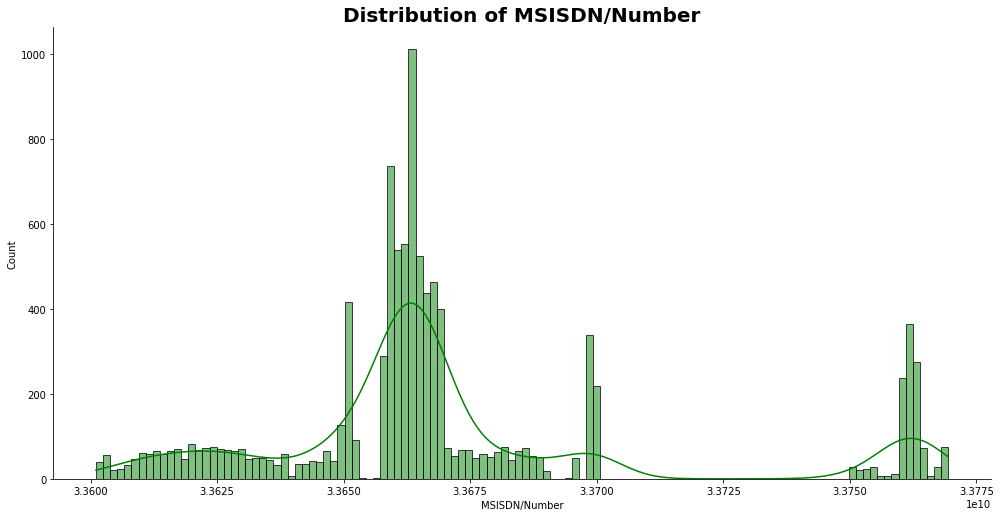

In [33]:
plot_hist(db_explore.head(10000),"MSISDN/Number" ,'green')

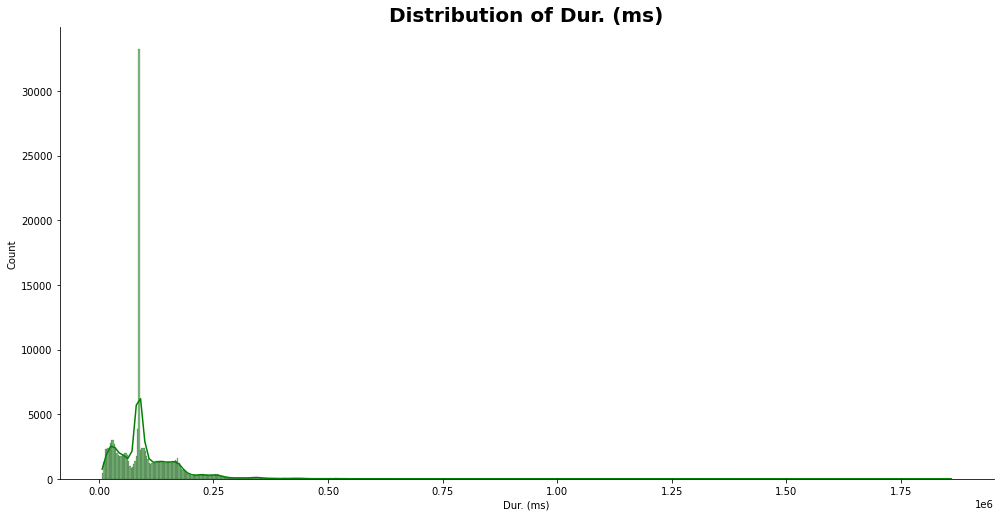

In [34]:
plot_hist(db_explore, "Dur. (ms)", "green")

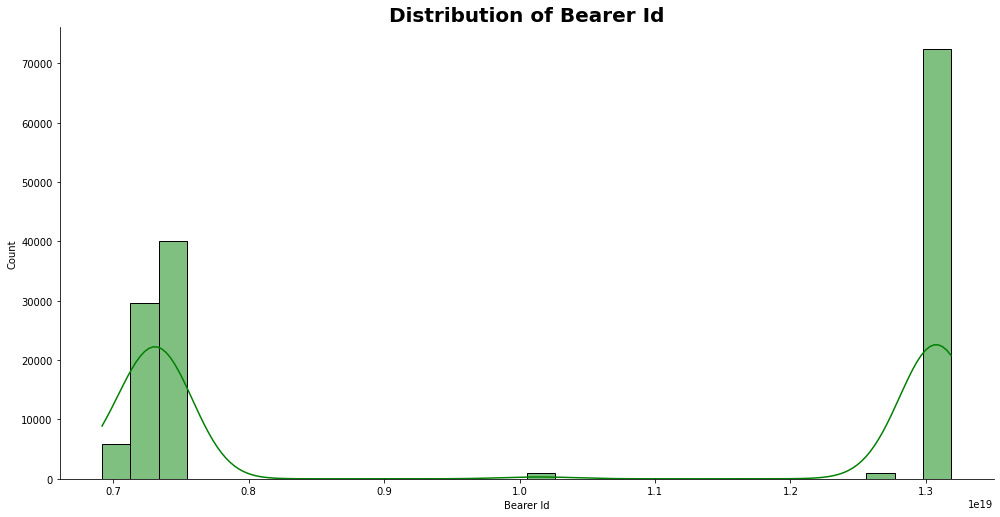

In [35]:
plot_hist(db_explore, "Bearer Id", "green")

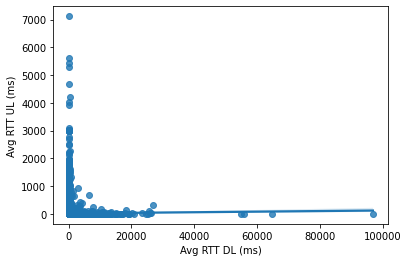

In [36]:
sns.regplot(data = db_explore,x="Avg RTT DL (ms)",y="Avg RTT UL (ms)" ) #sns.barplot(,y='Social Media UL (Bytes)',data=db_explore.head(1000))



In [37]:
# plot_hist(db, "Avg RTT UL (ms)", "green")


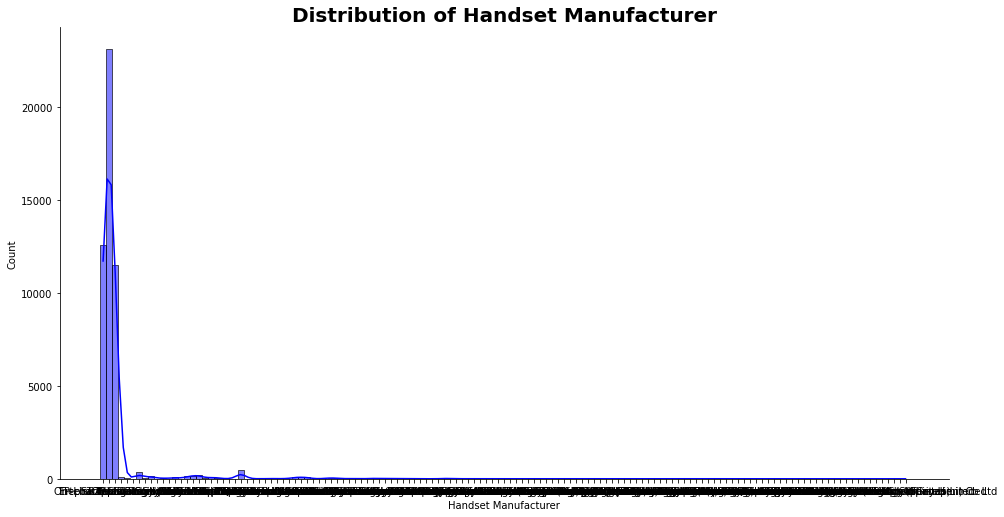

In [38]:
plot_hist(db_explore.head(50000), "Handset Manufacturer", "blue")


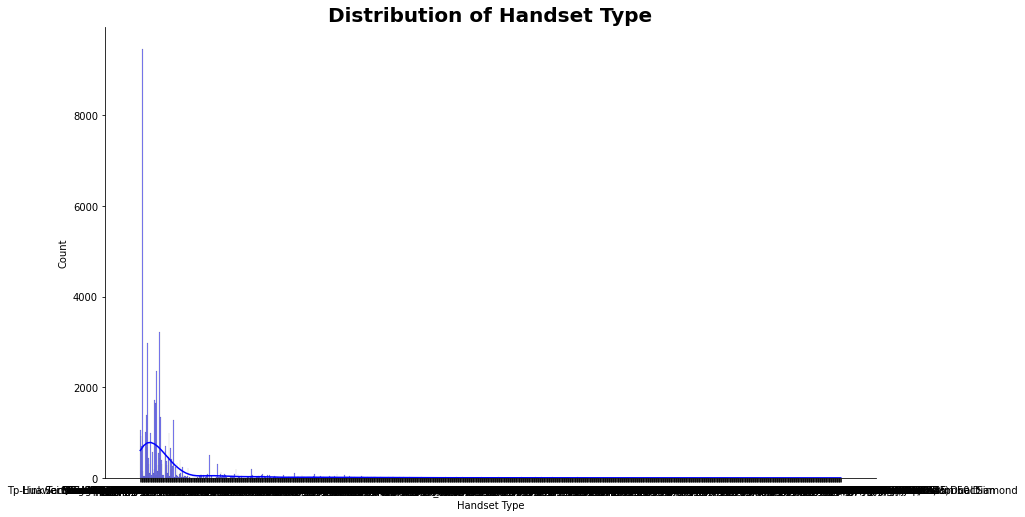

In [39]:
plot_hist(db_explore.head(50000), "Handset Type", "blue")

In [40]:
# sns.regplot(data = db_encoded,x="Handset Type",y="Handset Manufacturer" ) #sns.barplot(,y='Social Media UL (Bytes)',data=db_explore.head(1000))


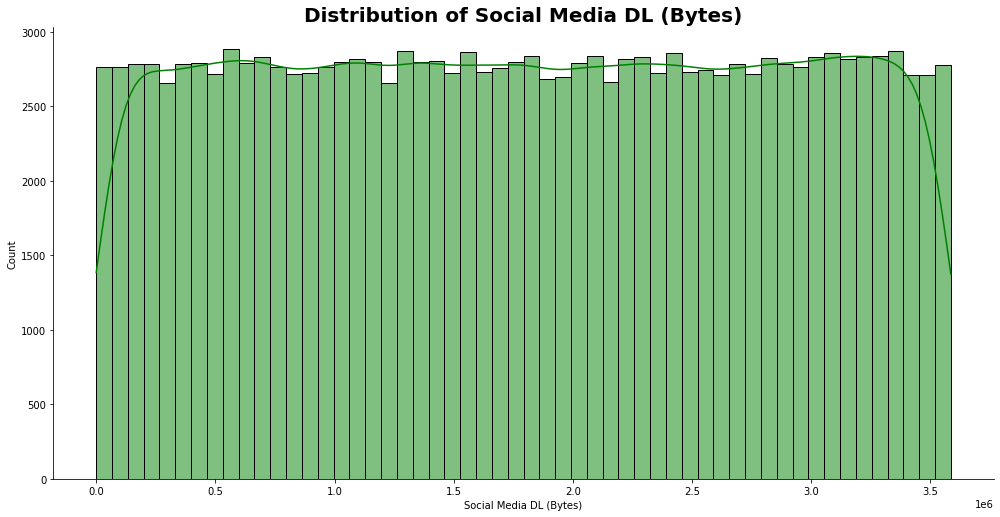

In [41]:
plot_hist(db_explore, "Social Media DL (Bytes)", "green")


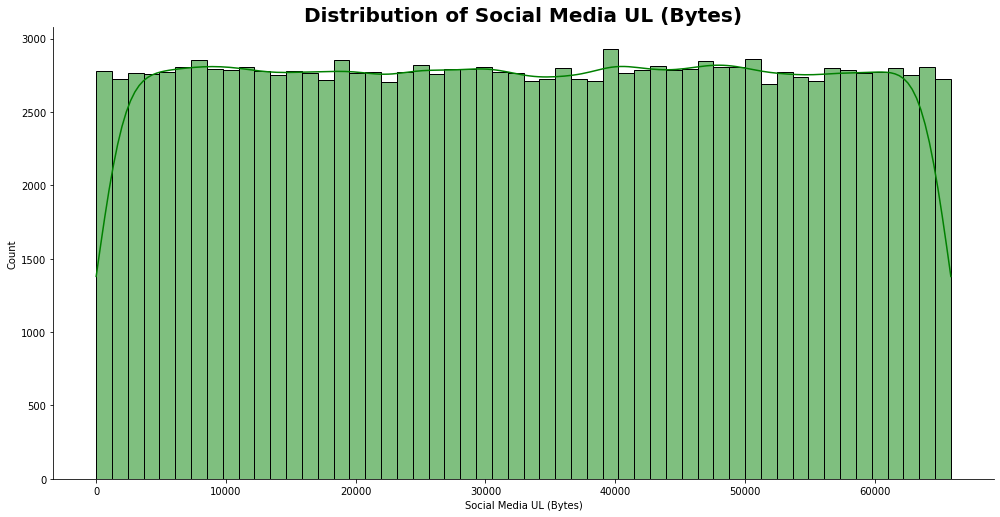

In [42]:
# sns.histplot(x=columns[0], data =db) # this also works
plot_hist(db_explore, "Social Media UL (Bytes)", "green")


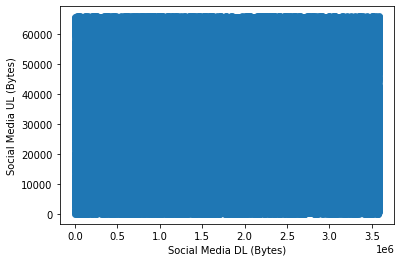

In [43]:
sns.regplot(data = db,x="Social Media DL (Bytes)",y="Social Media UL (Bytes)" ) #sns.barplot(,y='Social Media UL (Bytes)',data=db_explore.head(1000))


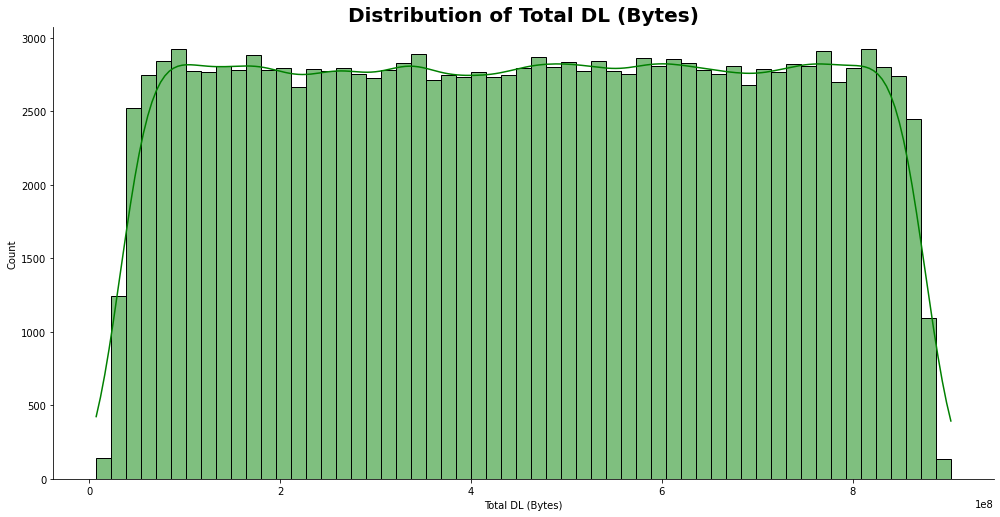

In [44]:
plot_hist(db_explore, "Total DL (Bytes)", "green")


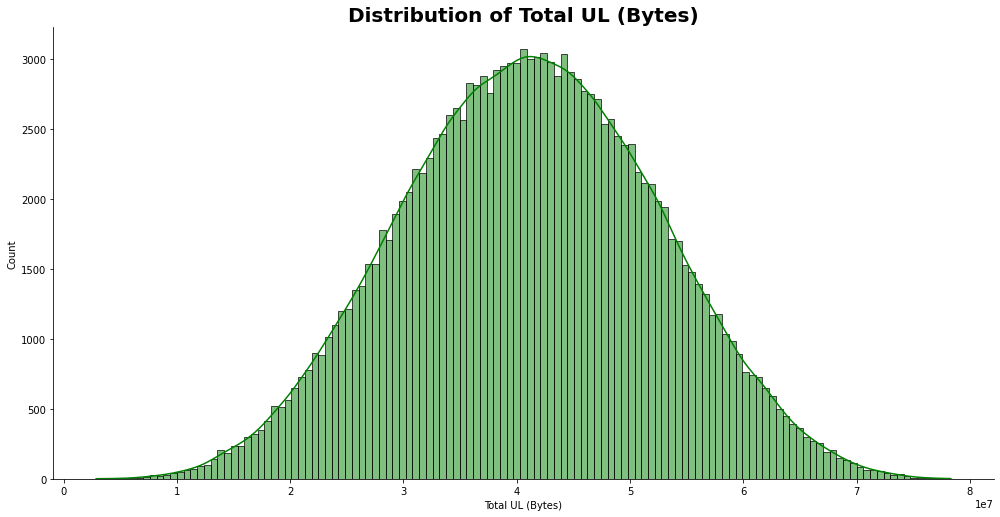

In [45]:
plot_hist(db_explore, "Total UL (Bytes)", "green")


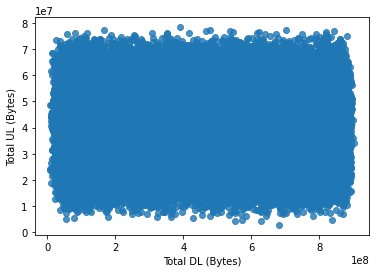

In [46]:
sns.regplot(data = db,x="Total DL (Bytes)",y="Total UL (Bytes)" ) #sns.barplot(,y='Social Media UL (Bytes)',data=db_explore.head(1000))


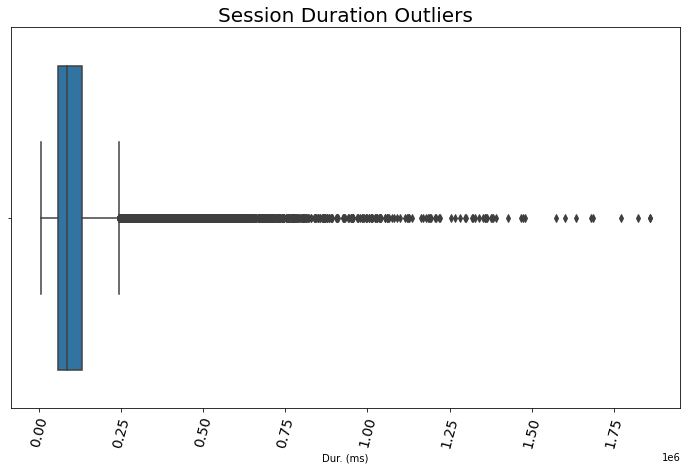

In [47]:
plot_box(db_explore, "Dur. (ms)", "Session Duration Outliers")

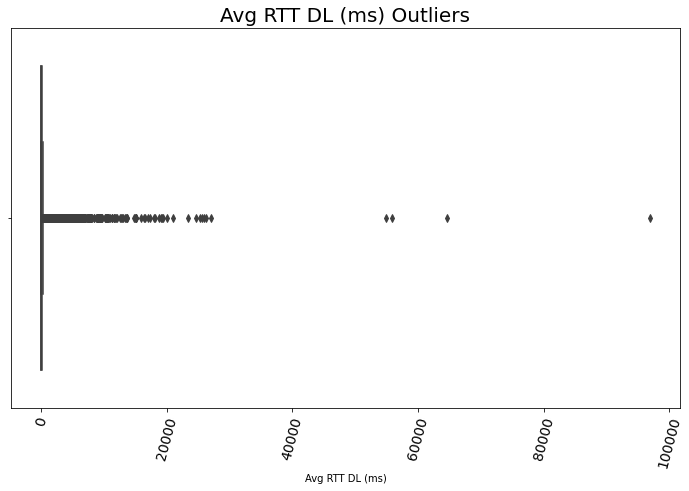

In [48]:
plot_box(db_explore, "Avg RTT DL (ms)", "Avg RTT DL (ms) Outliers")


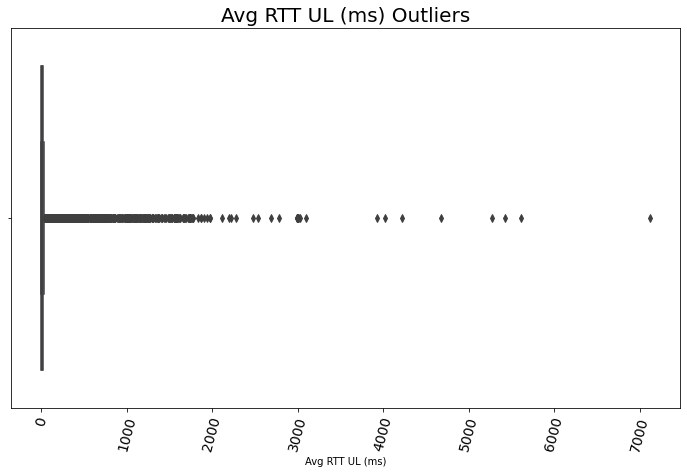

In [49]:
plot_box(db_explore, "Avg RTT UL (ms)", "Avg RTT UL (ms) Outliers")

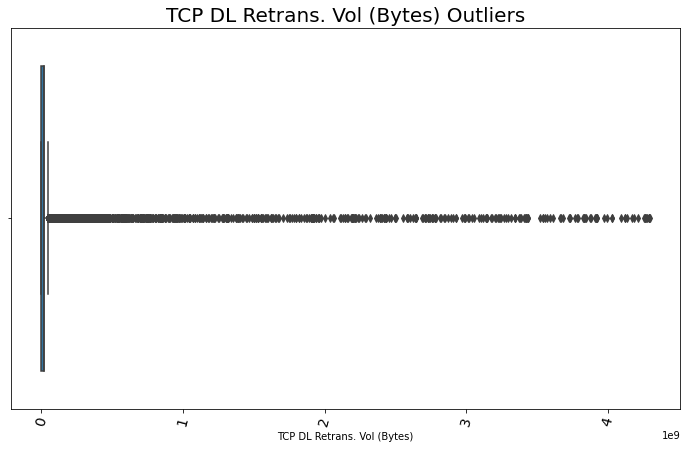

In [50]:
plot_box(db_explore, "TCP DL Retrans. Vol (Bytes)", "TCP DL Retrans. Vol (Bytes) Outliers")


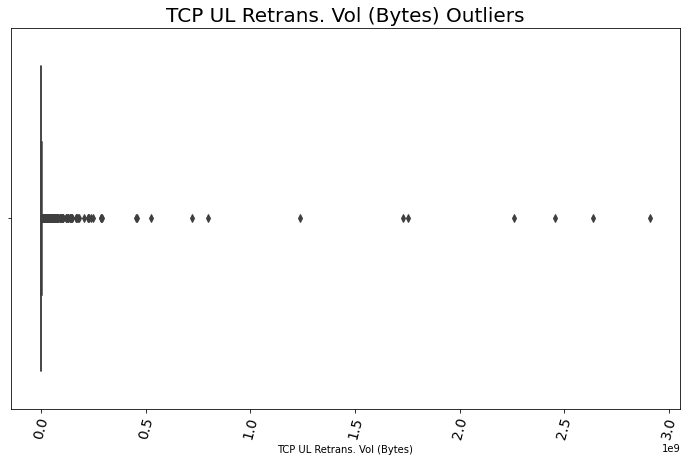

In [51]:
plot_box(db_explore, "TCP UL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes) Outliers")


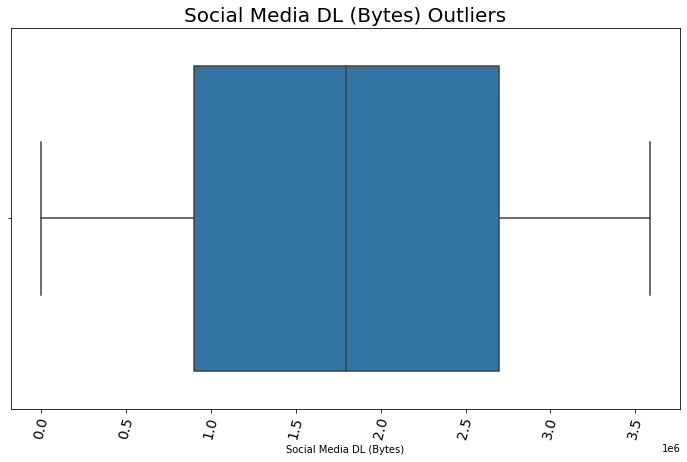

In [52]:
plot_box(db_explore, "Social Media DL (Bytes)", "Social Media DL (Bytes) Outliers")


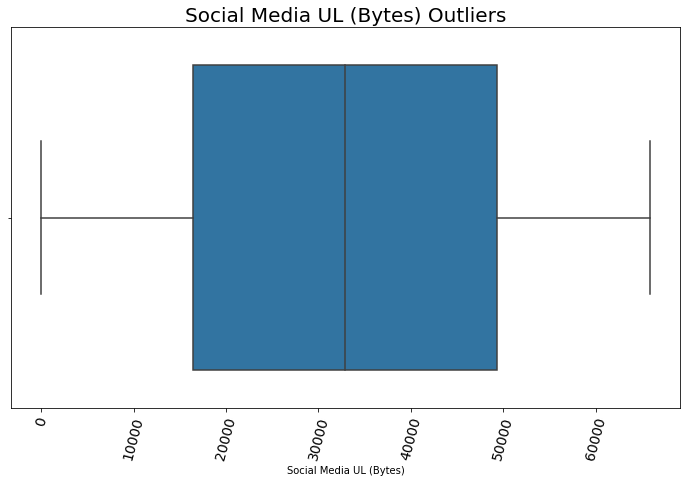

In [53]:
plot_box(db_explore, "Social Media UL (Bytes)", "Social Media UL (Bytes) Outliers")


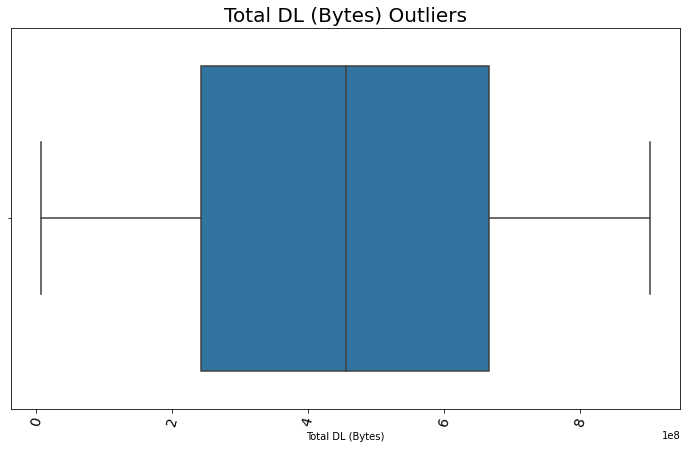

In [54]:
plot_box(db_explore, "Total DL (Bytes)", "Total DL (Bytes) Outliers")

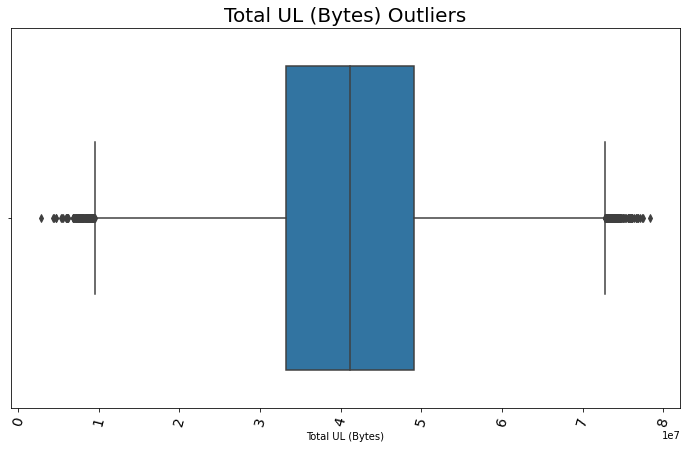

In [55]:
plot_box(db_explore, "Total UL (Bytes)", "Total UL (Bytes) Outliers")

### Categorical Univariate EDA

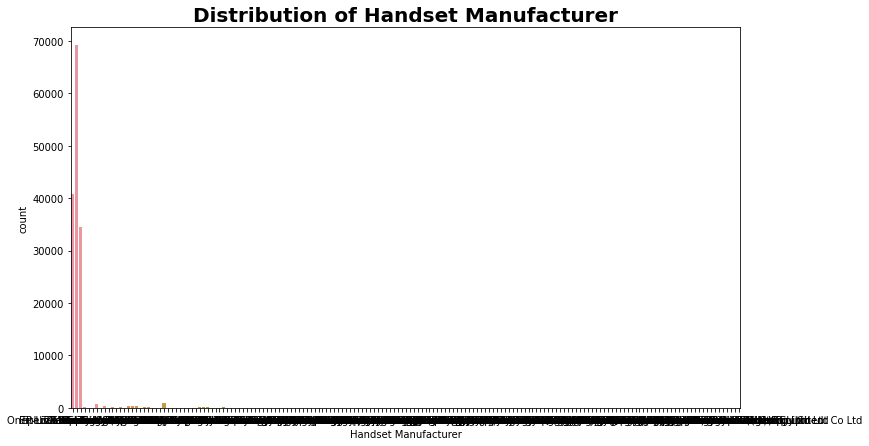

In [56]:
plot_count(db_explore, "Handset Manufacturer")


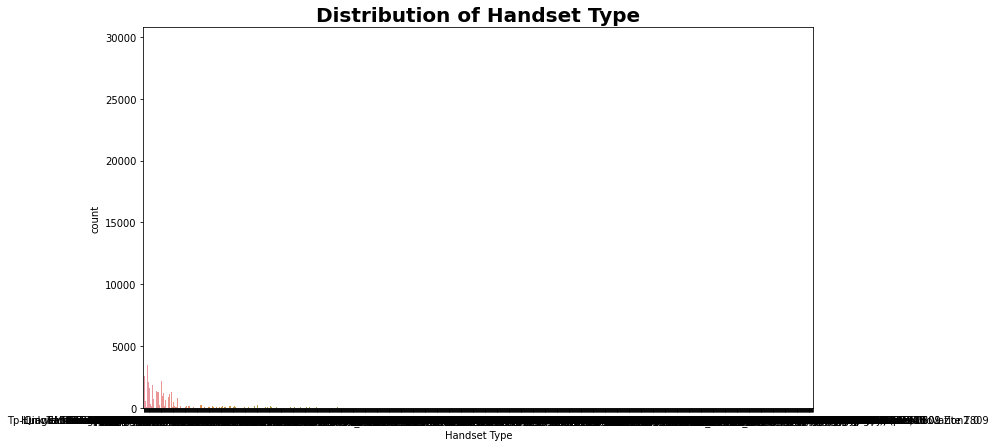

In [57]:
plot_count(db_explore, "Handset Type")

### Non-Graphical Univariate EDA

In [58]:
db.describe()

Bearer Id   Start ms     End ms    Dur. (ms)  \
count                    150,001.00 150,001.00 150,001.00   150,001.00   
mean  10,138,874,654,256,338,944.00     499.19     498.80   104,608.56   
std    2,883,599,561,544,278,016.00     288.61     288.10    81,037.35   
min    6,917,537,518,543,529,984.00       0.00       0.00     7,142.00   
25%    7,349,883,247,447,919,616.00     250.00     251.00    57,442.00   
50%    7,349,883,264,196,119,552.00     499.00     500.00    86,399.00   
75%   13,042,425,978,928,500,736.00     749.00     750.00   132,430.00   
max   13,186,541,167,134,199,808.00     999.00     999.00 1,859,336.00   

                        IMSI          MSISDN/Number                  IMEI  \
count             150,001.00             150,001.00            150,001.00   
mean  208,201,639,651,669.06      41,882,819,545.03 48,474,547,977,654.55   
std        21,447,224,608.89   2,438,731,270,479.18 22,373,590,654,759.21   
min   204,047,108,489,451.00      33,601,001,722.00    440,015,202,000.00   
25%   208,201,401,264,956.00      33,651,508,781.00 35,462,609,538,986.00   
50%   208,201,546,359,072.00      33,663,797,508.00 35,722,409,972,293.00   
75%   208,201,771,607,314.00      33,684,730,950.00 86,119,704,277,453.00   
max   214,074,303,349,628.00 882,397,108,489,451.00 99,001,201,327,774.00   

       Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
count       150,001.00       150,001.00               150,001.00   
mean            109.80            17.66                13,300.05   
std             559.34            76.53                23,971.80   
min               0.00             0.00                     0.00   
25%              35.00             3.00                    43.00   
50%              54.00             7.00                    63.00   
75%             109.80            17.66                19,710.00   
max          96,923.00         7,120.00               378,160.00   

       Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
count               150,001.00                   150,001.00   
mean                  1,770.43                20,809,914.27   
std                   4,625.34               117,235,576.02   
min                       0.00                         2.00   
25%                      47.00                 1,332,932.00   
50%                      63.00                20,809,914.27   
75%                   1,120.00                20,809,914.27   
max                  58,613.00             4,294,425,570.00   

       TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
count                   150,001.00           150,001.00   
mean                    759,658.66                92.84   
std                  15,776,162.06                13.01   
min                           1.00                 0.00   
25%                      63,009.00                91.00   
50%                     759,658.66               100.00   
75%                     759,658.66               100.00   
max               2,908,226,006.00               100.00   

       50 Kbps < DL TP < 250 Kbps (%)  250 Kbps < DL TP < 1 Mbps (%)  \
count                      150,001.00                     150,001.00   
mean                             3.07                           1.72   
std                              6.20                           4.15   
min                              0.00                           0.00   
25%                              0.00                           0.00   
50%                              0.00                           0.00   
75%                              4.00                           1.00   
max                             93.00                         100.00   

       DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
count          150,001.00           150,001.00                     150,001.00   
mean                 1.61                98.53                           0.78   
std                  4.82                 4.62              

In [59]:
db["Total DL (Bytes)"].describe()


count       150,001.00
mean    454,643,430.08
std     244,142,060.57
min       7,114,041.00
25%     243,107,173.00
50%     455,840,911.00
75%     665,705,138.00
max     902,969,616.00
Name: Total DL (Bytes), dtype: float64

In [60]:
db["Total UL (Bytes)"].describe()


count      150,001.00
mean    41,121,206.29
std     11,276,348.93
min      2,866,892.00
25%     33,222,029.00
50%     41,143,242.00
75%     49,034,238.00
max     78,331,311.00
Name: Total UL (Bytes), dtype: float64

In [61]:
db["MSISDN/Number"].describe()


count               150,001.00
mean         41,882,819,545.03
std       2,438,731,270,479.18
min          33,601,001,722.00
25%          33,651,508,781.00
50%          33,663,797,508.00
75%          33,684,730,950.00
max     882,397,108,489,451.00
Name: MSISDN/Number, dtype: float64

In [62]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

In [63]:
db.isna().sum()


Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [64]:
db_explore_100 = db_explore.head(100)


## Bivariate Analysis
#### Applications Vs Total DL and Total UL

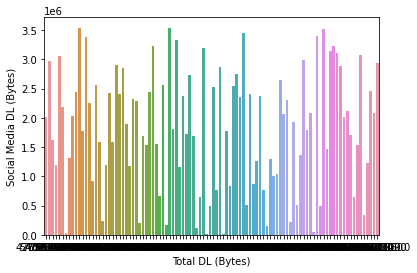

In [65]:
sns.barplot(x='Total DL (Bytes)',y='Social Media DL (Bytes)',data=db_explore_100)



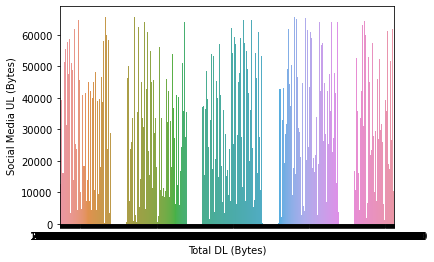

In [66]:
sns.barplot(x='Total DL (Bytes)',y='Social Media UL (Bytes)',data=db_explore.head(1000))


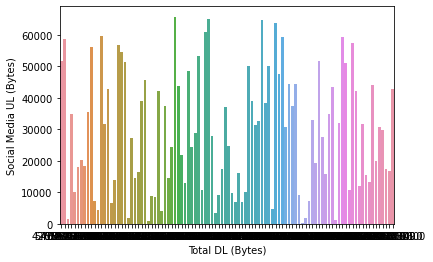

In [67]:
sns.barplot(x='Total DL (Bytes)',y='Social Media UL (Bytes)',data=db_explore_100)


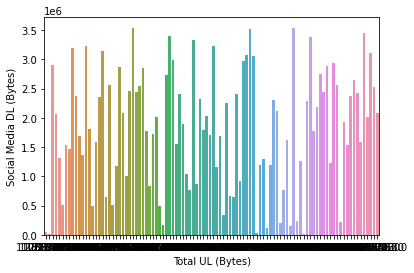

In [68]:
sns.barplot(x='Total UL (Bytes)',y='Social Media DL (Bytes)',data=db_explore_100)


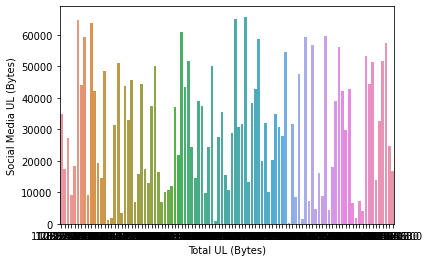

In [69]:
sns.barplot(x='Total UL (Bytes)',y='Social Media UL (Bytes)',data=db_explore_100)


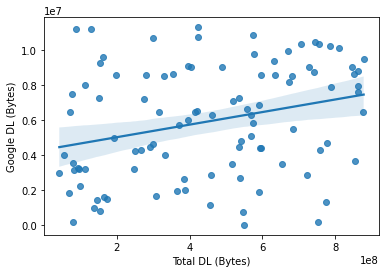

In [70]:
sns.regplot(x='Total DL (Bytes)',y='Google DL (Bytes)',data=db_explore_100)


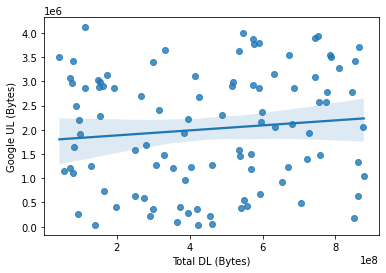

In [71]:
sns.regplot(x='Total DL (Bytes)',y='Google UL (Bytes)',data=db_explore_100)


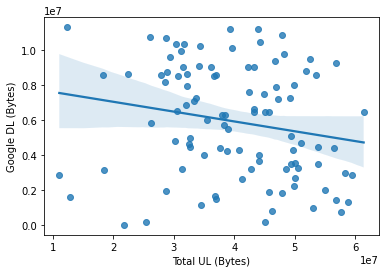

In [72]:
sns.regplot(x='Total UL (Bytes)',y='Google DL (Bytes)',data=db_explore_100)

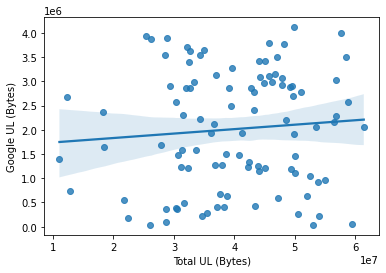

In [73]:
sns.regplot(x='Total UL (Bytes)',y='Google UL (Bytes)',data=db_explore_100)


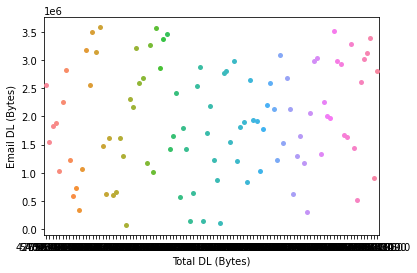

In [74]:
sns.stripplot(x='Total DL (Bytes)',y='Email DL (Bytes)',data=db_explore_100)


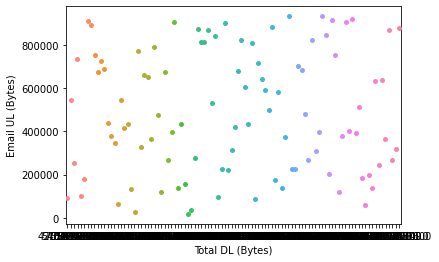

In [75]:
sns.stripplot(x='Total DL (Bytes)',y='Email UL (Bytes)',data=db_explore_100)


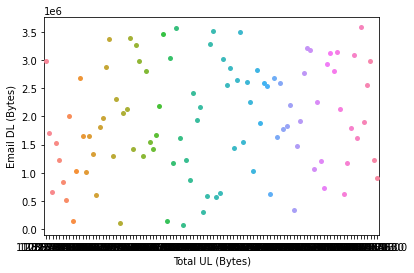

In [76]:
sns.stripplot(x='Total UL (Bytes)',y='Email DL (Bytes)',data=db_explore_100)


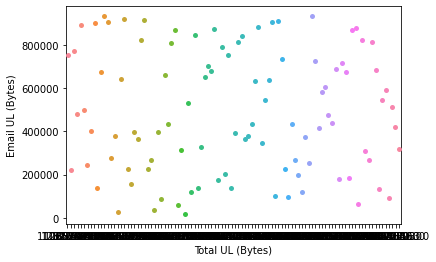

In [77]:
sns.stripplot(x='Total UL (Bytes)',y='Email UL (Bytes)',data=db_explore_100)


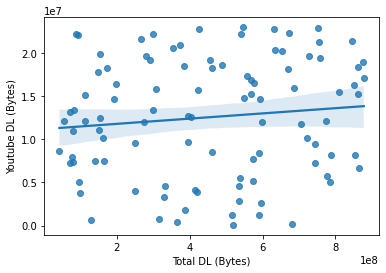

In [78]:
sns.regplot(x='Total DL (Bytes)',y='Youtube DL (Bytes)',data=db_explore_100)


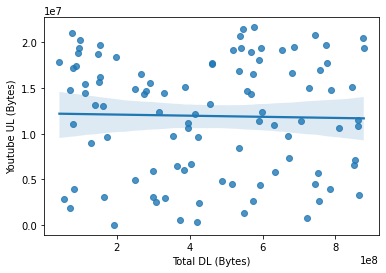

In [79]:
sns.regplot(x='Total DL (Bytes)',y='Youtube UL (Bytes)',data=db_explore_100)


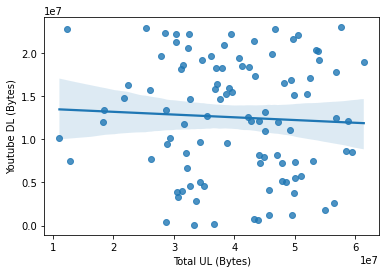

In [80]:
sns.regplot(x='Total UL (Bytes)',y='Youtube DL (Bytes)',data=db_explore_100)


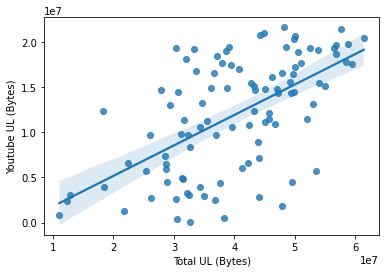

In [81]:
sns.regplot(x='Total UL (Bytes)',y='Youtube UL (Bytes)',data=db_explore_100)


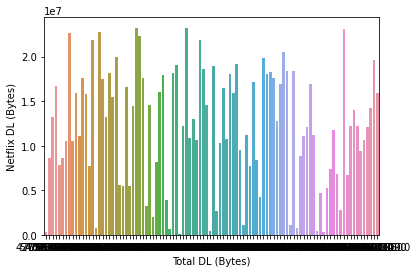

In [82]:
sns.barplot(x='Total DL (Bytes)',y='Netflix DL (Bytes)',data=db_explore_100)


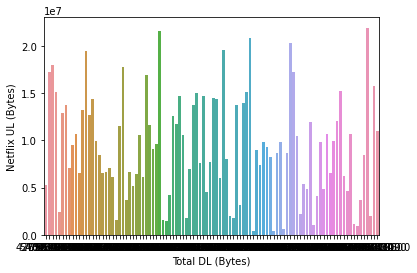

In [83]:
sns.barplot(x='Total DL (Bytes)',y='Netflix UL (Bytes)',data=db_explore_100)


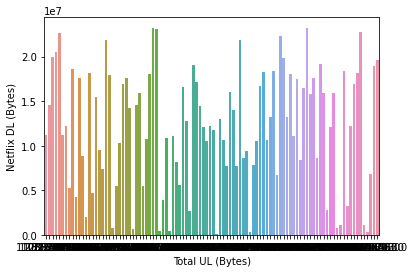

In [84]:
sns.barplot(x='Total UL (Bytes)',y='Netflix DL (Bytes)',data=db_explore_100)


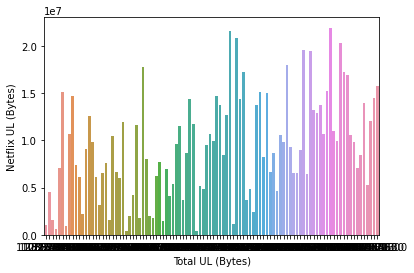

In [85]:
sns.barplot(x='Total UL (Bytes)',y='Netflix UL (Bytes)',data=db_explore_100)


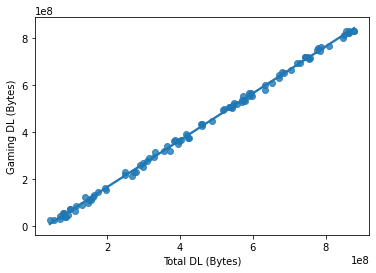

In [86]:
sns.regplot(x='Total DL (Bytes)',y='Gaming DL (Bytes)',data=db_explore_100)


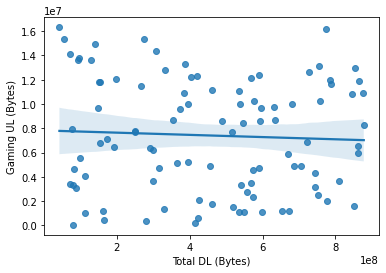

In [87]:
sns.regplot(x='Total DL (Bytes)',y='Gaming UL (Bytes)',data=db_explore_100)


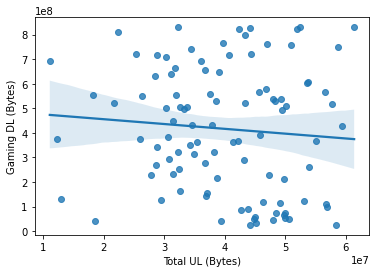

In [88]:
sns.regplot(x='Total UL (Bytes)',y='Gaming DL (Bytes)',data=db_explore_100)


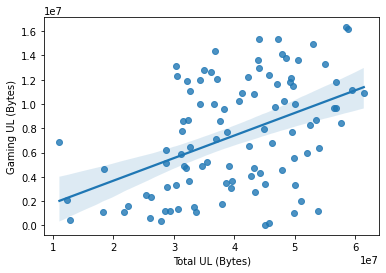

In [89]:
sns.regplot(x='Total UL (Bytes)',y='Gaming UL (Bytes)',data=db_explore_100)


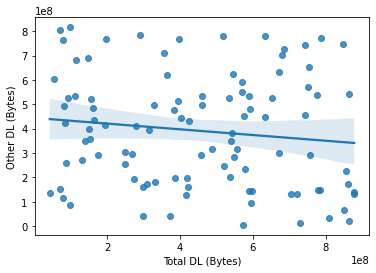

In [90]:
sns.regplot(x='Total DL (Bytes)',y='Other DL (Bytes)',data=db_explore_100)


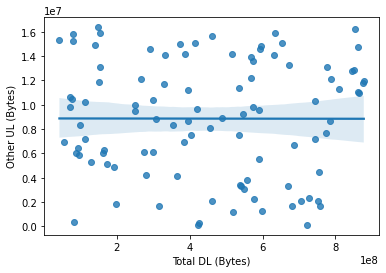

In [91]:
sns.regplot(x='Total DL (Bytes)',y='Other UL (Bytes)',data=db_explore_100)


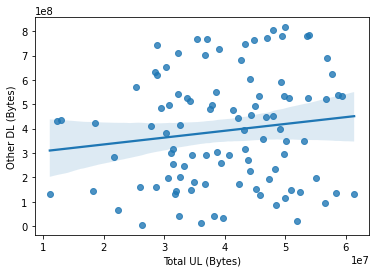

In [92]:
sns.regplot(x='Total UL (Bytes)',y='Other DL (Bytes)',data=db_explore_100)


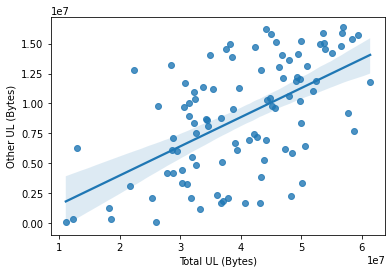

In [93]:
sns.regplot(x='Total UL (Bytes)',y='Other UL (Bytes)',data=db_explore_100)

##Multivariate Analysis

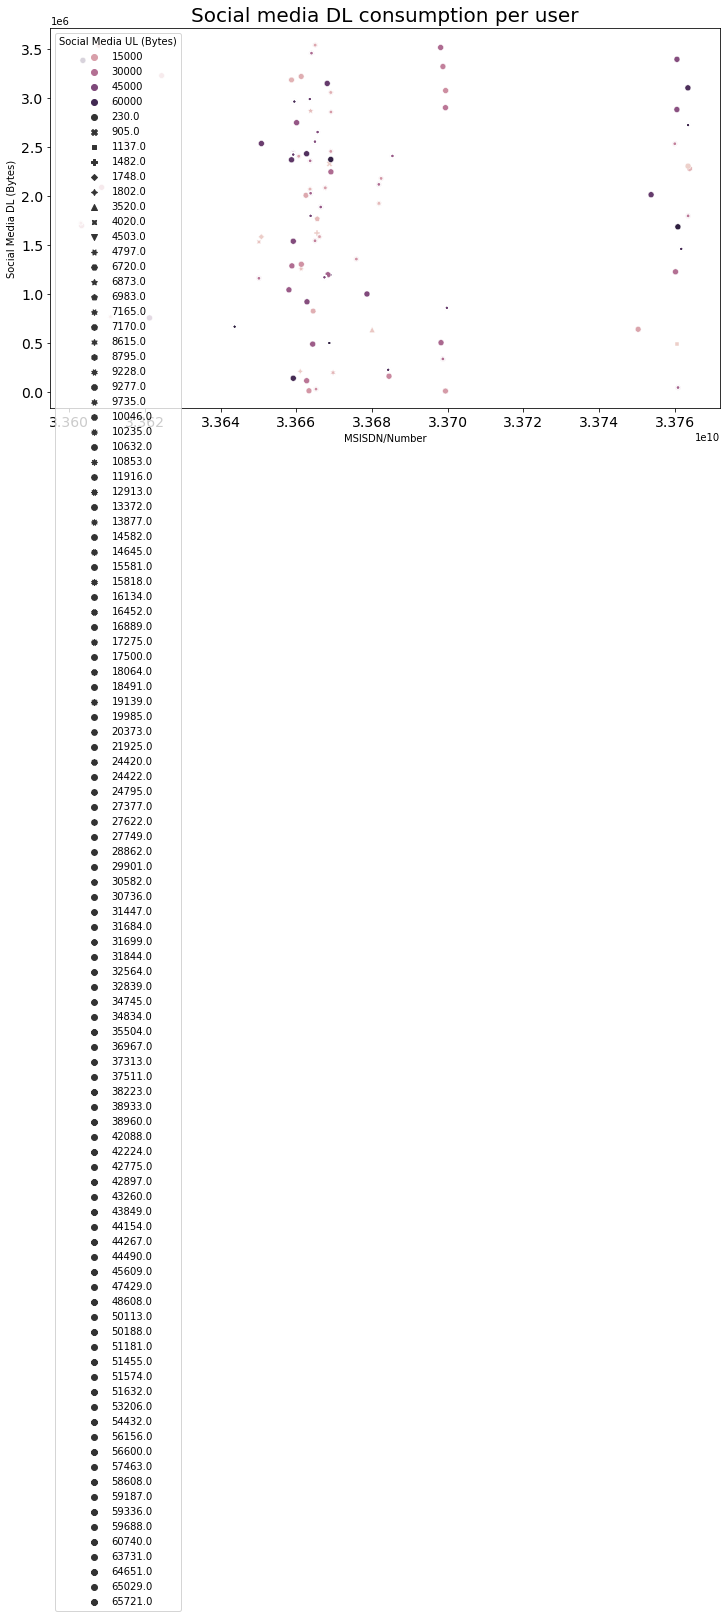

In [94]:
plot_scatter(db_explore.head(100), x_col="MSISDN/Number", y_col="Social Media DL (Bytes)", hue="Social Media UL (Bytes)",
             style="Social Media UL (Bytes)", title="Social media DL consumption per user")


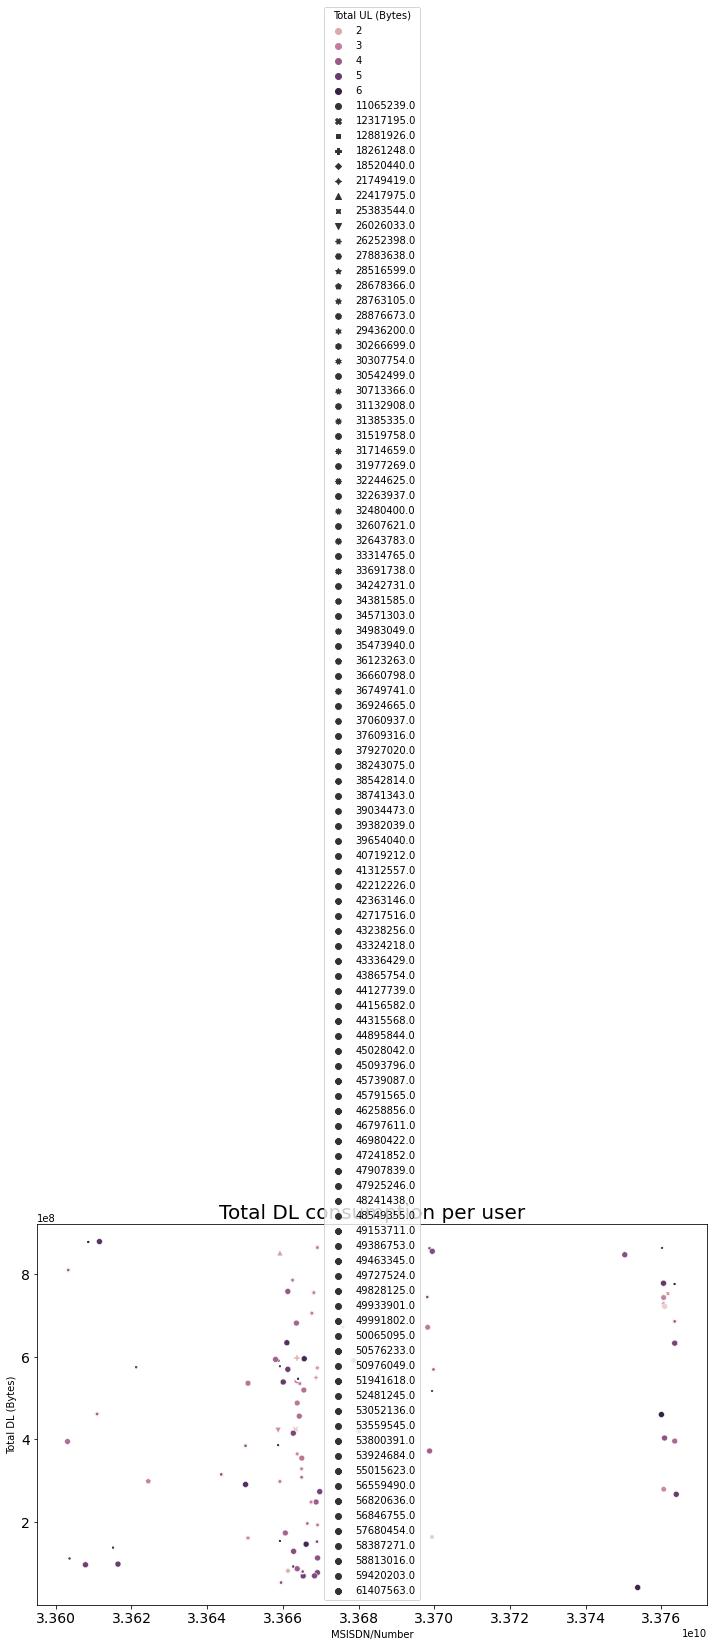

In [95]:
plot_scatter(db_explore.head(100), x_col="MSISDN/Number", y_col="Total DL (Bytes)", hue="Total UL (Bytes)",
             style="Total UL (Bytes)", title="Total DL consumption per user")


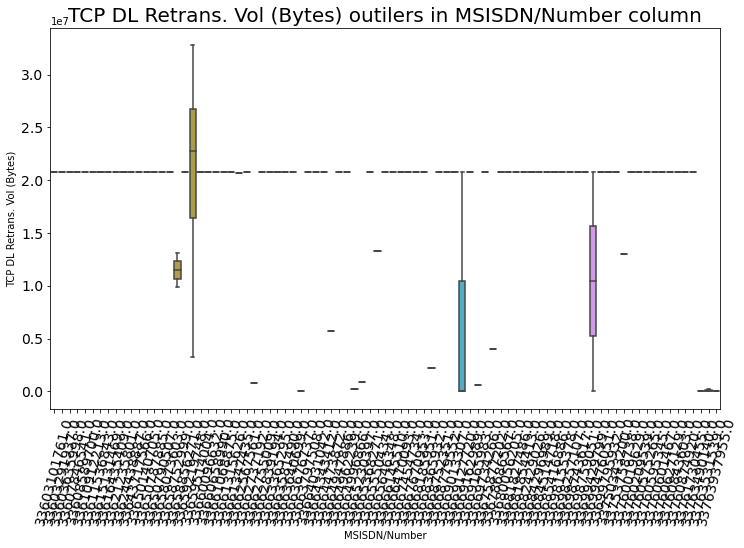

In [96]:
plot_box_multi(db_explore.head(100), x_col="MSISDN/Number", y_col="TCP DL Retrans. Vol (Bytes)", 
               title="TCP DL Retrans. Vol (Bytes) outilers in MSISDN/Number column")


In [97]:
dfPair = db_explore.head(50)[["MSISDN/Number", "Dur. (ms)", "Avg RTT DL (ms)", "Social Media DL (Bytes)", "Total DL (Bytes)"]]


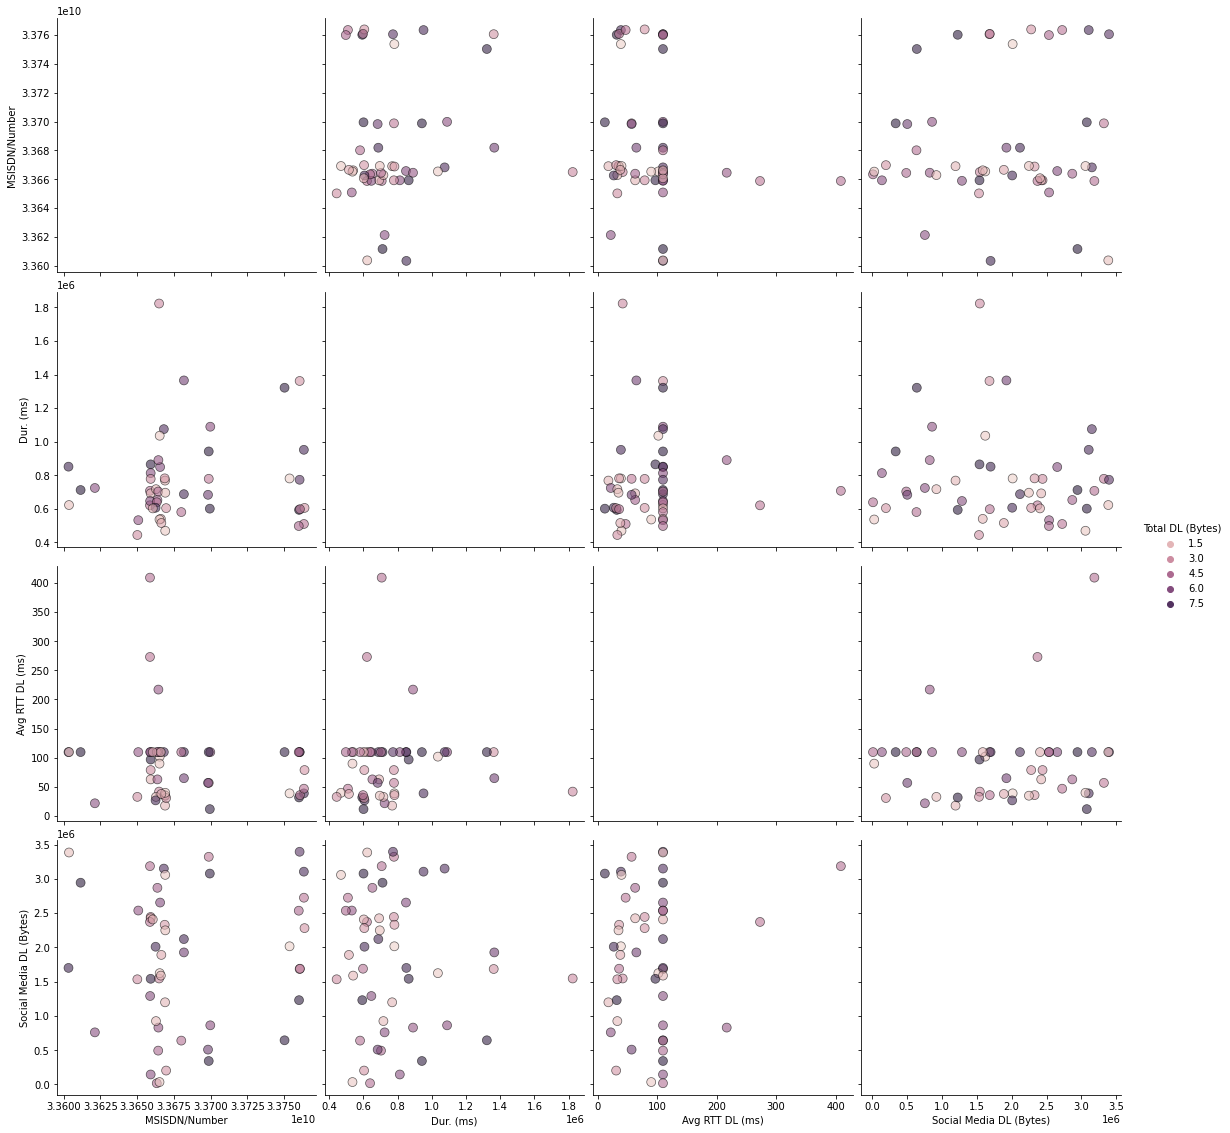

In [98]:
sns.pairplot(dfPair, hue = 'Total DL (Bytes)', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)


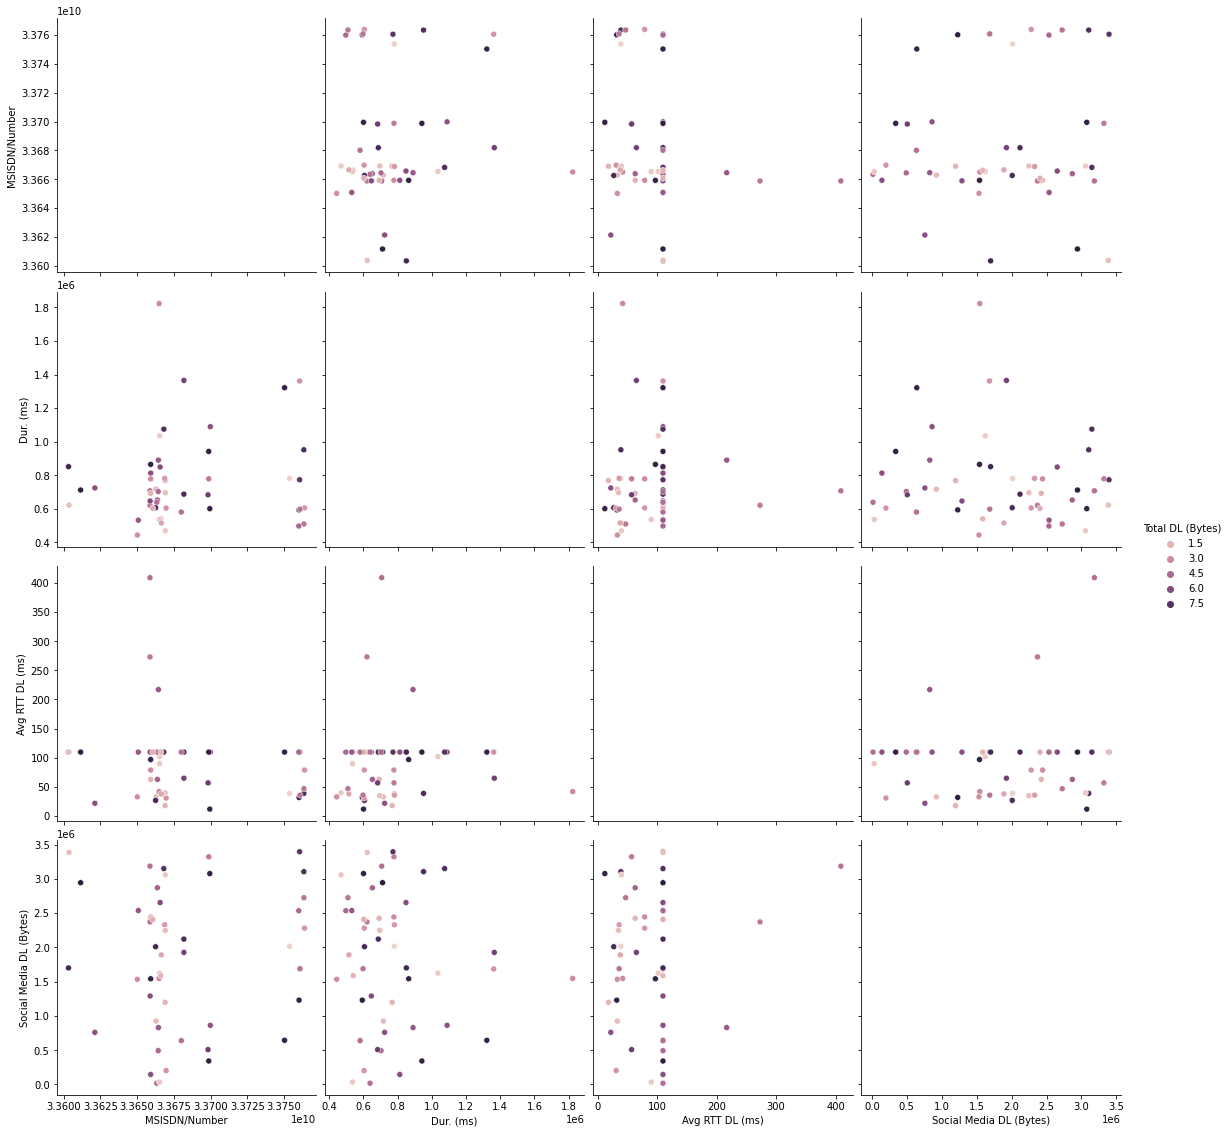

In [99]:
dfPair = db_explore.head(50)[["MSISDN/Number", "Dur. (ms)", "Avg RTT DL (ms)", "Social Media DL (Bytes)", "Total DL (Bytes)"]]
sns.pairplot(dfPair, hue = 'Total DL (Bytes)', diag_kind = 'kde',height=4)

# Deciles

### Decile Columns

In [100]:
decile_columns = ['MSISDN/Number','Dur. (ms)','Total UL (Bytes)', 'Total DL (Bytes)' ] # to limit the number of columns to be displayed
db_decile = db_explore[decile_columns]
# db_decile_group["Dur. Decile"] = pd.qcut(db_decile_group['Dur. (ms)'], 5, labels = ['Dec 1','Dec 2','Dec 3','Dec 4','Dec 5'])
# db_decile_group

### Five MSISDN deciles based on xDR Duration
#### contains all selected columns

In [101]:
db_decile_group_dur = db_decile.groupby(pd.qcut(db_decile["Dur. (ms)"], 5))
db_decile_group_dur.describe() # includes all selected columns

MSISDN/Number                                  \
                              count              mean           std   
Dur. (ms)                                                             
(7141.999, 45960.0]       30,001.00 33,666,169,023.96 37,931,087.46   
(45960.0, 86399.0]        47,703.00 33,672,344,952.70 38,885,518.57   
(86399.0, 92515.0]        12,298.00 33,673,034,118.92 39,435,686.52   
(92515.0, 148355.0]       29,999.00 33,666,819,176.75 38,541,370.82   
(148355.0, 1859336.0]     30,000.00 33,669,547,237.16 39,915,934.32   

                                                                             \
                                    min               25%               50%   
Dur. (ms)                                                                     
(7141.999, 45960.0]   33,601,008,617.00 33,650,083,088.00 33,663,478,205.00   
(45960.0, 86399.0]    33,601,007,832.00 33,658,633,221.00 33,663,797,508.00   
(86399.0, 92515.0]    33,601,027,208.00 33,658,658,865.00 33,663,797,508.00   
(92515.0, 148355.0]   33,601,001,722.00 33,650,209,052.00 33,663,119,775.00   
(148355.0, 1859336.0] 33,601,001,754.00 33,650,758,770.25 33,663,797,508.00   

                                                          Dur. (ms)  \
                                    75%               max     count   
Dur. (ms)                                                             
(7141.999, 45960.0]   33,672,363,308.00 33,769,455,327.00 30,001.00   
(45960.0, 86399.0]    33,673,886,489.00 33,769,469,548.00 47,703.00   
(86399.0, 92515.0]    33,674,664,006.50 33,769,407,386.00 12,298.00   
(92515.0, 148355.0]   33,671,399,594.00 33,769,469,548.00 29,999.00   
(148355.0, 1859336.0] 33,675,879,504.00 33,769,469,548.00 30,000.00   

                                                                              \
                            mean        std        min        25%        50%   
Dur. (ms)                                                                      
(7141.999, 45960.0]    27,814.03   9,678.73   7,142.00  19,826.00  28,066.00   
(45960.0, 86399.0]     76,409.03  13,532.71  45,961.00  64,046.00  86,073.00   
(86399.0, 92515.0]     87,625.79   1,862.82  86,400.00  86,400.00  86,400.00   
(92515.0, 148355.0]   117,382.66  16,916.44  92,516.00 101,468.50 115,971.00   
(148355.0, 1859336.0] 220,433.85 106,321.35 148,357.00 164,734.00 181,419.50   

                                              Total UL (Bytes)                \
                             75%          max            count          mean   
Dur. (ms)                                                                      
(7141.999, 45960.0]    35,416.00    45,960.00        30,001.00 41,141,541.00   
(45960.0, 86399.0]     86,399.00    86,399.00        47,703.00 41,138,521.42   
(86399.0, 92515.0]     88,620.75    92,515.00        12,298.00 41,204,052.37   
(92515.0, 148355.0]   132,430.50   148,355.00        29,999.00 41,087,431.94   
(148355.0, 1859336.0] 241,538.25 1,859,336.00        30,000.00 41,073,149.97   

                                                                              \
                                std          min           25%           50%   
Dur. (ms)                                                                      
(7141.999, 45960.0]   11,283,799.26 4,469,240.00 33,230,999.00 41,141,014.00   
(45960.0, 86399.0]    11,254,759.60 4,338,786.00 33,242,671.50 41,109,187.00   
(86399.0, 92515.0]    11,190,338.04 4,661,082.00 33,372,690.75 41,292,751.00   
(92515.0, 148355.0]   11,278,509.93 2,866,892.00 33,194,588.00 41,117,285.00   
(148355.0, 1859336.0] 11,336,428.59 5,276,726.00 33,151,227.25 41,171,129.50   

                                                  Total DL (Bytes)  \
                                75%           max            count   
Dur. (ms)                                                            
(7141.999, 45960.0]   49,076,042.00 78,331,311.00        30,001.00   
(45960.0, 86399.0]    49,017,823.50 77,157,382.0

### Deciles based on xDR duration
### Contains only the xDR duration data

In [102]:
db_decile_group_dur['Dur. (ms)'].describe() 

count       mean        std        min        25%  \
Dur. (ms)                                                                     
(7141.999, 45960.0]   30,001.00  27,814.03   9,678.73   7,142.00  19,826.00   
(45960.0, 86399.0]    47,703.00  76,409.03  13,532.71  45,961.00  64,046.00   
(86399.0, 92515.0]    12,298.00  87,625.79   1,862.82  86,400.00  86,400.00   
(92515.0, 148355.0]   29,999.00 117,382.66  16,916.44  92,516.00 101,468.50   
(148355.0, 1859336.0] 30,000.00 220,433.85 106,321.35 148,357.00 164,734.00   

                             50%        75%          max  
Dur. (ms)                                                 
(7141.999, 45960.0]    28,066.00  35,416.00    45,960.00  
(45960.0, 86399.0]     86,073.00  86,399.00    86,399.00  
(86399.0, 92515.0]     86,400.00  88,620.75    92,515.00  
(92515.0, 148355.0]   115,971.00 132,430.50   148,355.00  
(148355.0, 1859336.0] 181,419.50 241,538.25 1,859,336.00

### Decile Total DL Bytes sum




In [103]:
db_decile_group_dur['Total DL (Bytes)'].sum()

Dur. (ms)
(7141.999, 45960.0]     13,649,755,092,570.00
(45960.0, 86399.0]      21,657,543,441,921.00
(86399.0, 92515.0]       5,582,355,454,979.00
(92515.0, 148355.0]     13,621,168,066,561.08
(148355.0, 1859336.0]   13,686,147,099,244.00
Name: Total DL (Bytes), dtype: float64

### Decile Total UL Bytes sum


In [104]:
db_decile_group_dur['Total UL (Bytes)'].sum() 

Dur. (ms)
(7141.999, 45960.0]     1,234,287,371,672.00
(45960.0, 86399.0]      1,962,430,887,505.00
(86399.0, 92515.0]        506,727,436,012.00
(92515.0, 148355.0]     1,232,581,870,658.29
(148355.0, 1859336.0]   1,232,194,499,175.00
Name: Total UL (Bytes), dtype: float64

## Correlation Analysis

### Correlation Analysis for the whole data


In [105]:
db.corr(method='pearson')

Bearer Id  Start ms  End ms  \
Bearer Id                                      1.00      0.00   -0.00   
Start ms                                       0.00      1.00    0.12   
End ms                                        -0.00      0.12    1.00   
Dur. (ms)                                      0.01      0.00   -0.00   
IMSI                                           0.00     -0.00    0.00   
MSISDN/Number                                 -0.00     -0.00   -0.00   
IMEI                                           0.16     -0.00   -0.00   
Avg RTT DL (ms)                               -0.02      0.00   -0.00   
Avg RTT UL (ms)                                0.03     -0.00   -0.00   
Avg Bearer TP DL (kbps)                        0.06     -0.00    0.00   
Avg Bearer TP UL (kbps)                        0.05     -0.00    0.00   
TCP DL Retrans. Vol (Bytes)                    0.01      0.00    0.00   
TCP UL Retrans. Vol (Bytes)                    0.01     -0.00   -0.00   
DL TP < 50 Kbps (%)                           -0.07      0.00   -0.00   
50 Kbps < DL TP < 250 Kbps (%)                 0.04     -0.00    0.00   
250 Kbps < DL TP < 1 Mbps (%)                  0.06     -0.00    0.00   
DL TP > 1 Mbps (%)                             0.06      0.00    0.00   
UL TP < 10 Kbps (%)                           -0.04      0.00   -0.00   
10 Kbps < UL TP < 50 Kbps (%)                  0.03     -0.00    0.00   
50 Kbps < UL TP < 300 Kbps (%)                 0.02      0.00    0.00   
UL TP > 300 Kbps (%)                           0.01      0.00   -0.00   
HTTP DL (Bytes)                                0.02      0.00    0.00   
HTTP UL (Bytes)                                0.02      0.00   -0.00   
Activity Duration DL (ms)                      0.08     -0.00    0.00   
Activity Duration UL (ms)                      0.07     -0.00   -0.00   
Dur. (ms).1                                    0.01      0.00   -0.00   
Nb of sec with 125000B < Vol DL                0.04      0.00    0.00   
Nb of sec with 1250B < Vol UL < 6250B          0.02     -0.00    0.00   
Nb of sec with 31250B < Vol DL < 125000B       0.05      0.00    0.00   
Nb of sec with 37500B < Vol UL                 0.00     -0.00   -0.00   
Nb of sec with 6250B < Vol DL < 31250B         0.05     -0.00    0.00   
Nb of sec with 6250B < Vol UL < 37500B         0.01     -0.00   -0.00   
Nb of sec with Vol DL < 6250B                  0.08      0.00   -0.00   
Nb of sec with Vol UL < 1250B                  0.08      0.00   -0.00   
Social Media DL (Bytes)                       -0.00      0.00    0.00   
Social Media UL (Bytes)                       -0.00      0.00   -0.00   
Google DL (Bytes)                             -0.00      0.00   -0.00   
Google UL (Bytes)                              0.00      0.00    0.00   
Email DL (Bytes)                               0.00      0.00   -0.00   
Email UL (Bytes)                              -0.00     -0.00   -0.00   
Youtube DL (Bytes)                            -0.00     -0.00   -0.00   
Youtube UL (Bytes)                            -0.00      0.00   -0.00   
Netflix DL (Bytes)                            -0.00     -0.00    0.00   
Netflix UL (Bytes)                            -0.00     -0.00   -0.00   
Gaming DL (Bytes)                              0.00     -0.00   -0.00   
Gaming UL (Bytes)                             -0.00     -0.00    0.00   
Other DL (Bytes)                               0.00     -0.00    0.00   
Other UL (Bytes)                              -0.00      0.00    0.00   
Total UL (Bytes)                              -0.00     -0.00   -0.00   
Total DL (Bytes)                               0.00     -0.00   -0.00   

                                          Dur. (ms)  IMSI  MSISDN/Number  \
Bearer Id                                      0.01  0.00          -0.00   
Start ms                                       0.00 -0.00          -0.00   
End ms                                        -0.00  0.00          -0.00   
Dur. (ms)     

### Correlation Analysis for individual columns
* Can be calculated using 'pearson’, ‘kendall’, ‘spearman methods; pearson being the standard correlation coefficient



In [106]:
cor_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
               'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
               'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'] 
db[cor_columns].corr(method='pearson')

Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                     1.00                    -0.00   
Social Media UL (Bytes)                    -0.00                     1.00   
Google DL (Bytes)                          -0.00                     0.00   
Google UL (Bytes)                           0.00                     0.00   
Email DL (Bytes)                            0.00                     0.00   
Email UL (Bytes)                           -0.00                    -0.00   
Youtube DL (Bytes)                         -0.00                    -0.00   
Youtube UL (Bytes)                          0.00                    -0.00   
Netflix DL (Bytes)                         -0.00                    -0.00   
Netflix UL (Bytes)                          0.00                    -0.00   
Gaming DL (Bytes)                           0.00                     0.00   
Gaming UL (Bytes)                           0.00                     0.00   
Other DL (Bytes)                            0.01                    -0.00   
Other UL (Bytes)                            0.00                     0.00   

                         Google DL (Bytes)  Google UL (Bytes)  \
Social Media DL (Bytes)              -0.00               0.00   
Social Media UL (Bytes)               0.00               0.00   
Google DL (Bytes)                     1.00              -0.00   
Google UL (Bytes)                    -0.00               1.00   
Email DL (Bytes)                     -0.00              -0.00   
Email UL (Bytes)                      0.00              -0.00   
Youtube DL (Bytes)                    0.00               0.00   
Youtube UL (Bytes)                    0.00               0.00   
Netflix DL (Bytes)                    0.00              -0.00   
Netflix UL (Bytes)                   -0.00              -0.00   
Gaming DL (Bytes)                    -0.00               0.00   
Gaming UL (Bytes)                    -0.00              -0.00   
Other DL (Bytes)                     -0.00               0.00   
Other UL (Bytes)                     -0.00              -0.00   

                         Email DL (Bytes)  Email UL (Bytes)  \
Social Media DL (Bytes)              0.00             -0.00   
Social Media UL (Bytes)              0.00             -0.00   
Google DL (Bytes)                   -0.00              0.00   
Google UL (Bytes)                   -0.00             -0.00   
Email DL (Bytes)                     1.00              0.00   
Email UL (Bytes)                     0.00              1.00   
Youtube DL (Bytes)                   0.00             -0.00   
Youtube UL (Bytes)                  -0.00             -0.01   
Netflix DL (Bytes)                   0.00             -0.00   
Netflix UL (Bytes)                  -0.00              0.00   
Gaming DL (Bytes)                    0.00             -0.00   
Gaming UL (Bytes)                   -0.00              0.01   
Other DL (Bytes)                    -0.00             -0.00   
Other UL (Bytes)                     0.00              0.00   

                         Youtube DL (Bytes)  Youtube UL (Bytes)  \
Social Media DL (Bytes)               -0.00                0.00   
Social Media UL (Bytes)               -0.00               -0.00   
Google DL (Bytes)                      0.00                0.00   
Google UL (Bytes)                      0.00                0.00   
Email DL (Bytes)                       0.00               -0.00   
Email UL (Bytes)                      -0.00               -0.01   
Youtube DL (Bytes)                     1.00                0.00   
Youtube UL (Bytes)                     0.00                1.00   
Netflix DL (Bytes)                     0.00                0.00   
Netflix UL (Bytes)                     0.00                0.00   
Gaming DL (Bytes)                     -0.00               -0.00   
Gaming UL (Bytes)                     -0.00                0.00   
Other DL (Bytes)                       0.00                0.00   
Other UL 

### Unapproximated pairwise Correlation coefficients

In [107]:
db[cor_columns[0]].corr(db[cor_columns[1]], method = 'pearson')

-0.0005552550605629289

In [108]:
def Iterative_corr():
  for i in range(0,len(cor_columns)):
    print(f"Correlation between {cor_columns[i-1]} and {cor_columns[i]} is {db[cor_columns[i-1]].corr(db[cor_columns[i]], method = 'pearson')}")

In [109]:
Iterative_corr()

Correlation between Other UL (Bytes) and Social Media DL (Bytes) is 0.000610172935868667
Correlation between Social Media DL (Bytes) and Social Media UL (Bytes) is -0.0005552550605629289
Correlation between Social Media UL (Bytes) and Google DL (Bytes) is 0.0035420493604944817
Correlation between Google DL (Bytes) and Google UL (Bytes) is -0.00010337279625522597
Correlation between Google UL (Bytes) and Email DL (Bytes) is -0.0011566918702905404
Correlation between Email DL (Bytes) and Email UL (Bytes) is 0.002552705150782542
Correlation between Email UL (Bytes) and Youtube DL (Bytes) is -0.0003202909729306648
Correlation between Youtube DL (Bytes) and Youtube UL (Bytes) is 0.0024328000864883197
Correlation between Youtube UL (Bytes) and Netflix DL (Bytes) is 0.00042266596396286
Correlation between Netflix DL (Bytes) and Netflix UL (Bytes) is 0.0010652722724041523
Correlation between Netflix UL (Bytes) and Gaming DL (Bytes) is -0.0010506452722832409
Correlation between Gaming DL (Bytes

## Principal Component Analysis

In [110]:
db_explore_PCA = PCA(n_components=5)


In [111]:
db_explore_numeric = db_explore[important_columns_numeric]
db_explore_PC = db_explore_PCA.fit_transform(db_explore_numeric)


In [112]:
principal_db_explore_df = pd.DataFrame(data = db_explore_PC,
                        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principal_db_explore_df.head()


PC1             PC2             PC3           PC4  \
0 -2,975,608,806,588,633,088.00  204,092,727.47 -250,355,722.80   -654,836.49   
1 -2,975,608,828,622,561,792.00 -272,003,005.10  106,570,360.16 -1,623,907.90   
2 -2,975,608,829,824,161,792.00  259,850,904.75  -11,618,980.76   -969,617.79   
3 -2,975,608,831,186,461,184.00 -542,283,724.59  329,711,847.21 -1,802,615.66   
4 -2,975,608,845,224,361,984.00 -155,032,182.39  129,944,020.15 -1,679,883.08   

            PC5  
0 -5,209,392.44  
1 11,892,773.26  
2 90,457,899.77  
3 80,447,249.64  
4 29,762,682.67

In [113]:
print(f'Explained variation per principal component: {db_explore_PCA.explained_variance_ratio_}')

Explained variation per principal component: [1.00000000e+00 1.43202068e-20 7.11335536e-21 1.65264714e-21
 1.82559510e-22]


# User Engagement Analysis


### Top 10 Handsets used

In [114]:
db_hndset_count = db['Handset Type'].value_counts()
top_10_hndsets = db_hndset_count.head(10)
print("Most used handset types in Descending order:\n", db_hndset_count)
print("\n\nTop 10 handsets used: \n", top_10_hndsets)

Most used handset types in Descending order:
 Huawei B528S-23A                                           29311
Apple iPhone 6S (A1688)                                     9419
Apple iPhone 6 (A1586)                                      9023
Apple iPhone 7 (A1778)                                      6326
Apple iPhone Se (A1723)                                     5187
                                                           ...  
Tct Mobile Suzho. Alcatel One Touch Y580D                      1
Shenzhen Fortune. M-Ppas6                                      1
Wiko Global Sasu Wiko Ridge 4G                                 1
Hongkong Ipro Te. Ipro I9350 I9400 S3 Wave 3.5 Wave 4.0        1
Shenzhen Jeko Co. Blackview Bv5800 Pro                         1
Name: Handset Type, Length: 1395, dtype: int64


Top 10 handsets used: 
 Huawei B528S-23A                29311
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone S

### Top 3 handset manufacturers

In [115]:
db_hndset_manufac_count = db['Handset Manufacturer'].value_counts()
top_3_manufact = db_hndset_manufac_count.head(3)
print("Dominant manufacturers in descending order:\n", db_hndset_manufac_count)
print("\n\nTop 3 manufacturers: \n", top_3_manufact)

Dominant manufacturers in descending order:
 Apple                               69124
Samsung                             40839
Huawei                              34423
Sony Mobile Communications Ab         980
Wiko Global Sasu                      747
                                    ...  
Pt. Arga Mas Lestari                    1
Doke Communication (Hk) Limited         1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Shenzhen Gaoxinqi                       1
Name: Handset Manufacturer, Length: 169, dtype: int64


Top 3 manufacturers: 
 Apple      69124
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


### Manufacturer-Handset pairs

In [116]:
db_hndset_manufac_pair = db.value_counts(["Handset Manufacturer", "Handset Type"])
top_3_manufact_5_hndset = db_hndset_manufac_pair.head(3)
print("Manufacturers-handset pair:\n", top_3_manufact_5_hndset)

Manufacturers-handset pair:
 Handset Manufacturer  Handset Type           
Huawei                Huawei B528S-23A           19752
Apple                 Huawei B528S-23A            9559
                      Apple iPhone 6S (A1688)     9419
dtype: int64


## Data Aggregation with each column

### Frequency of each session (Bearer Id)

In [117]:
db['Bearer Id'].value_counts() # Each xDR occurances aggregated
# db.value_counts('Bearer Id') #also works

10,138,874,654,256,340,992.00    991
13,042,425,979,269,199,872.00     16
13,042,425,965,944,199,168.00     10
13,042,425,974,582,800,384.00      9
13,042,425,978,774,599,680.00      9
                                ... 
7,349,883,253,835,950,080.00       1
13,114,483,558,765,600,768.00      1
7,349,883,253,834,980,352.00       1
7,349,883,253,834,300,416.00       1
13,114,483,460,844,900,352.00      1
Name: Bearer Id, Length: 134709, dtype: int64

### 10 most frequent sessions

In [118]:
db['Bearer Id'].value_counts().head(10)

10,138,874,654,256,340,992.00    991
13,042,425,979,269,199,872.00     16
13,042,425,965,944,199,168.00     10
13,042,425,974,582,800,384.00      9
13,042,425,978,774,599,680.00      9
13,042,425,981,873,399,808.00      9
13,042,425,972,278,300,672.00      9
13,042,425,975,039,100,928.00      8
13,042,425,960,483,100,672.00      8
13,114,483,561,758,900,224.00      8
Name: Bearer Id, dtype: int64

### Frequency of each User(MSISDN/Number)

In [119]:
db["MSISDN/Number"].value_counts()

41,882,819,545.03    1066
33,626,320,676.00      18
33,614,892,860.00      17
33,625,779,332.00      17
33,659,725,664.00      16
                     ... 
33,664,955,942.00       1
33,663,469,453.00       1
33,665,287,654.00       1
33,659,372,298.00       1
33,619,622,058.00       1
Name: MSISDN/Number, Length: 106857, dtype: int64

### Top 10 frequent users

In [120]:
db["MSISDN/Number"].value_counts().head(10)

41,882,819,545.03    1066
33,626,320,676.00      18
33,614,892,860.00      17
33,625,779,332.00      17
33,659,725,664.00      16
33,760,536,639.00      15
33,675,877,202.00      15
33,667,163,239.00      13
33,604,515,716.00      12
33,603,127,838.00      12
Name: MSISDN/Number, dtype: int64

### User (MSISDN) Grouped and Agregated with Bearer Id(xDR session)
Each user has unique xDR session

### User-Session pair frequencies

In [121]:
db_user_xDR = db.groupby(["MSISDN/Number"]).agg(session_count = ('Bearer Id', 'value_counts')).sort_values(by='session_count', ascending = False)#.value_counts(ascending = False) # it also works
# db_user_xDR = db[['MSISDN/Number', 'Bearer Id']].value_counts() # this also works
db_user_xDR


session_count
MSISDN/Number          Bearer Id                                   
41,882,819,545.03      10,138,874,654,256,340,992.00            562
33,658,361,927.00      13,042,425,972,278,300,672.00              9
33,665,530,316.00      13,042,425,981,873,399,808.00              9
33,669,068,942.00      13,042,425,974,582,800,384.00              9
33,662,840,755.00      13,114,483,561,758,900,224.00              8
...                                                             ...
33,659,527,995.00      7,277,825,660,241,099,776.00               1
                       7,349,883,251,051,010,048.00               1
33,659,528,283.00      7,277,825,664,096,119,808.00               1
33,659,528,339.00      13,114,483,559,677,999,104.00              1
882,397,108,489,451.00 7,277,825,601,573,409,792.00               1

[147958 rows x 1 columns]

### Top 10 frequent users-session pairs

In [122]:
db_user_xDR = db.groupby(["MSISDN/Number"]).agg(session_count = ('Bearer Id', 'value_counts')).sort_values(by='session_count', ascending = False)#.value_counts(ascending = False) # it also works
# db_user_xDR = db[['MSISDN/Number', 'Bearer Id']].value_counts() # this also works
db_user_xDR.head(10)

session_count
MSISDN/Number     Bearer Id                                   
41,882,819,545.03 10,138,874,654,256,340,992.00            562
33,658,361,927.00 13,042,425,972,278,300,672.00              9
33,665,530,316.00 13,042,425,981,873,399,808.00              9
33,669,068,942.00 13,042,425,974,582,800,384.00              9
33,662,840,755.00 13,114,483,561,758,900,224.00              8
33,659,822,913.00 13,042,425,975,793,299,456.00              8
33,664,709,594.00 13,042,425,965,357,199,360.00              7
33,668,546,821.00 13,042,425,975,039,100,928.00              7
33,668,215,157.00 13,042,425,978,916,499,456.00              7
33,658,263,267.00 13,042,425,960,483,100,672.00              7

### User(MSISDN) Grouped and Aggregated with xDR duration

In [123]:
# db_user_Duration = db.groupby(["MSISDN/Number","Dur. (ms)"]).size()
db_user_Duration = db.groupby(["MSISDN/Number"]).agg(Duration = ('Dur. (ms)', 'value_counts')).sort_values(by='Duration', ascending = False)#.value_counts(ascending = False) # it also works

db_user_Duration

Duration
MSISDN/Number          Dur. (ms)           
33,665,182,467.00      86,399.00          6
33,699,231,421.00      86,399.00          6
33,659,292,469.00      86,399.00          6
33,761,231,090.00      86,399.00          6
33,667,641,718.00      86,400.00          6
...                                     ...
33,659,543,086.00      88,856.00          1
33,659,542,975.00      152,205.00         1
33,659,542,887.00      153,991.00         1
33,659,542,810.00      194,350.00         1
882,397,108,489,451.00 869,844.00         1

[142480 rows x 1 columns]

### Top 10 frequent durations users have engaged
#### These are frequent durations when users stay connected

In [124]:
db_user_Duration = db.groupby(["MSISDN/Number"]).agg(Duration = ('Dur. (ms)', 'value_counts')).sort_values(by='Duration', ascending = False)#.value_counts(ascending = False) # it also works

db_user_Duration.head(10)

Duration
MSISDN/Number     Dur. (ms)          
33,665,182,467.00 86,399.00         6
33,699,231,421.00 86,399.00         6
33,659,292,469.00 86,399.00         6
33,761,231,090.00 86,399.00         6
33,667,641,718.00 86,400.00         6
33,763,111,258.00 86,399.00         5
33,762,183,376.00 86,399.00         5
33,762,053,002.00 86,399.00         5
33,763,744,937.00 86,399.00         5
33,665,227,446.00 86,399.00         5

### User Engagement per duration measure

In [125]:
db_user_Duration = db.groupby(["MSISDN/Number"]).agg(Duration_ms = ('Dur. (ms)', 'sum')).sort_values(by='Duration_ms', ascending = False)#.value_counts(ascending = False) # it also works

db_user_Duration

Duration_ms
MSISDN/Number                  
41,882,819,545.03 72,551,004.56
33,625,779,332.00 18,553,754.00
33,614,892,860.00  9,966,898.00
33,760,536,639.00  9,279,434.00
33,626,320,676.00  8,791,927.00
...                         ...
33,650,431,620.00      7,267.00
33,698,390,293.00      7,258.00
33,659,328,207.00      7,189.00
33,665,660,120.00      7,146.00
33,763,505,878.00      7,142.00

[106857 rows x 1 columns]

### Top 10 user with longer engagement durations (ms)
#### These are users who engaged more by staying connected longer

In [126]:
db_user_Duration = db.groupby(["MSISDN/Number"]).agg(Duration_ms = ('Dur. (ms)', 'sum')).sort_values(by='Duration_ms', ascending = False)#.value_counts(ascending = False) # it also works

db_user_Duration.head(10)

Duration_ms
MSISDN/Number                  
41,882,819,545.03 72,551,004.56
33,625,779,332.00 18,553,754.00
33,614,892,860.00  9,966,898.00
33,760,536,639.00  9,279,434.00
33,626,320,676.00  8,791,927.00
33,667,163,239.00  8,744,914.00
33,662,840,755.00  6,614,270.00
33,664,693,736.00  6,288,730.00
33,603,127,838.00  6,287,761.00
33,667,456,716.00  5,649,882.00

### User(MSISDN) and Total UL(Upload) Grouped and Aggregated

In [127]:
db_user_UL_data = db.groupby(["MSISDN/Number"]).agg(Total_UL_Bytes = ("Total UL (Bytes)", 'sum')).sort_values(by='Total_UL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_UL_data

Total_UL_Bytes
MSISDN/Number                      
41,882,819,545.03 44,366,423,488.29
33,625,779,332.00    729,577,380.00
33,760,536,639.00    703,478,581.00
33,614,892,860.00    689,483,001.00
33,626,320,676.00    669,650,721.00
...                             ...
33,661,893,084.00      5,921,981.00
33,669,429,697.00      5,461,287.00
33,659,052,775.00      5,276,726.00
33,664,682,771.00      4,338,786.00
33,698,150,805.00      2,866,892.00

[106857 rows x 1 columns]

### Top 10 Users with highest Total Upload Bytes

In [128]:
db_user_UL_data = db.groupby(["MSISDN/Number"]).agg(Total_UL_Bytes = ("Total UL (Bytes)", 'sum')).sort_values(by='Total_UL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
# db_user_UL_data = db[['MSISDN/Number', 'Total UL (Bytes)']].sum()#value_counts() # this also works
db_user_UL_data.head(10)

Total_UL_Bytes
MSISDN/Number                      
41,882,819,545.03 44,366,423,488.29
33,625,779,332.00    729,577,380.00
33,760,536,639.00    703,478,581.00
33,614,892,860.00    689,483,001.00
33,626,320,676.00    669,650,721.00
33,659,725,664.00    624,260,321.00
33,675,877,202.00    581,568,792.00
33,667,163,239.00    566,326,364.00
33,698,792,269.00    530,343,105.00
33,760,413,819.00    521,518,890.00

### User(MSISDN) and total download(DL) grouped and aggregated

In [129]:
db_user_DL_data = db.groupby(["MSISDN/Number"]).agg(Total_DL_Bytes = ("Total DL (Bytes)", 'sum')).sort_values(by='Total_DL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_DL_data

Total_DL_Bytes
MSISDN/Number                       
41,882,819,545.03 487,378,285,756.08
33,614,892,860.00   8,156,743,493.00
33,760,536,639.00   7,811,295,382.00
33,625,779,332.00   7,770,043,342.00
33,675,877,202.00   7,309,541,816.00
...                              ...
33,666,684,512.00       9,455,608.00
33,760,578,459.00       9,275,626.00
33,658,797,043.00       9,199,518.00
33,659,200,818.00       9,046,209.00
33,767,419,347.00       8,827,082.00

[106857 rows x 1 columns]

### Top 10 Users with highest Total Download Bytes

In [130]:
db_user_DL_data = db.groupby(["MSISDN/Number"]).agg(Total_DL_Bytes = ("Total DL (Bytes)", 'sum')).sort_values(by='Total_DL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_DL_data.head(10)

Total_DL_Bytes
MSISDN/Number                       
41,882,819,545.03 487,378,285,756.08
33,614,892,860.00   8,156,743,493.00
33,760,536,639.00   7,811,295,382.00
33,625,779,332.00   7,770,043,342.00
33,675,877,202.00   7,309,541,816.00
33,626,320,676.00   7,301,516,540.00
33,659,725,664.00   7,081,602,462.00
33,666,464,084.00   6,903,439,962.00
33,760,413,819.00   6,610,851,624.00
33,664,712,899.00   6,400,773,755.00

## User-Total Bytes Aggregation

In [131]:
# Total Bytes (Total UL + Total DL)
db_Total_Bytes = db.copy()
db_Total_Bytes["Total Bytes"] = db["Total DL (Bytes)"] + db["Total UL (Bytes)"]

# Total Social Media Bytes
db_Total_Bytes["Total Social Media (Bytes)"] = db["Social Media DL (Bytes)"] + db["Social Media UL (Bytes)"]

#Total Google Bytes
db_Total_Bytes["Total Google (Bytes)"] = db["Google DL (Bytes)"] + db["Google UL (Bytes)"]

#Total Youtube Bytes
db_Total_Bytes["Total Youtube (Bytes)"] = db["Youtube DL (Bytes)"] + db["Youtube UL (Bytes)"]

#Total Email Bytes
db_Total_Bytes["Total Email (Bytes)"] = db["Email DL (Bytes)"] + db["Email UL (Bytes)"]

#Total Netflix Bytes
db_Total_Bytes["Total Netflix (Bytes)"] = db["Netflix DL (Bytes)"] + db["Netflix UL (Bytes)"]

#Total Gaming Bytes
db_Total_Bytes["Total Gaming (Bytes)"] = db["Gaming DL (Bytes)"] + db["Gaming UL (Bytes)"]

#Total Other Bytes
db_Total_Bytes["Total Other (Bytes)"] = db["Other DL (Bytes)"] + db["Other UL (Bytes)"]


### User Experience ######
# Total TCP Retransmission Bytes
db_Total_Bytes["Total TCP Retrans. (Bytes)"] = db['TCP DL Retrans. Vol (Bytes)'] + db['TCP UL Retrans. Vol (Bytes)']

# Total Avg RTT 
db_Total_Bytes["Total Avg RTT (ms)"] = db['Avg RTT DL (ms)'] + db['Avg RTT UL (ms)']

# Total Avg Bearer TP
db_Total_Bytes["Total Avg TP (kbps)"] = db['Avg Bearer TP DL (kbps)'] + db['Avg Bearer TP DL (kbps)']


In [132]:
db_totals_col = db_Total_Bytes[["MSISDN/Number",'Dur. (ms)', "Handset Type", "Total Bytes", "Total TCP Retrans. (Bytes)", 
                "Total Avg RTT (ms)", "Total Avg TP (kbps)","Total Social Media (Bytes)", 
               "Total Google (Bytes)", "Total Youtube (Bytes)","Total Email (Bytes)", 
               "Total Netflix (Bytes)", "Total Gaming (Bytes)", "Total Other (Bytes)"]]
db_totals_col.head()

MSISDN/Number    Dur. (ms)                 Handset Type    Total Bytes  \
0 33,664,962,239.00 1,823,652.00   Samsung Galaxy A5 Sm-A520F 345,629,377.00   
1 33,681,854,413.00 1,365,104.00  Samsung Galaxy J5 (Sm-J530) 707,185,356.00   
2 33,760,627,129.00 1,361,762.00     Samsung Galaxy A8 (2018) 307,690,973.00   
3 33,750,343,200.00 1,321,509.00             Huawei B528S-23A 889,352,748.00   
4 33,699,795,932.00 1,089,009.00             Samsung Sm-G390F 607,681,403.00   

   Total TCP Retrans. (Bytes)  Total Avg RTT (ms)  Total Avg TP (kbps)  \
0               21,569,572.94               47.00                46.00   
1               21,569,572.94               70.00                32.00   
2               21,569,572.94              127.46                12.00   
3               21,569,572.94              127.46                88.00   
4               21,569,572.94              127.46                12.00   

   Total Social Media (Bytes)  Total Google (Bytes)  Total Youtube (Bytes)  \
0                1,570,185.00          2,905,912.00          18,355,943.00   
1                1,933,278.00          4,414,096.00          39,359,124.00   
2                1,726,277.00         10,229,119.00          34,425,237.00   
3                  657,493.00         11,811,761.00          36,534,765.00   
4                  912,788.00          7,748,843.00          34,222,253.00   

   Total Email (Bytes)  Total Netflix (Bytes)  Total Gaming (Bytes)  \
0         3,701,304.00          17,855,187.00        292,426,453.00   
1           937,385.00          35,565,545.00        609,920,783.00   
2         3,363,124.00          23,751,202.00        229,980,251.00   
3         2,070,983.00          15,092,588.00        810,387,875.00   
4         2,110,349.00          17,539,799.00        531,237,049.00   

   Total Other (Bytes)  
0       180,558,843.00  
1       541,959,383.00  
2       414,908,351.00  
3       761,837,216.00  
4       564,619,822.00

### User-Total Social Media Bytes


In [133]:
db_user_Social = db_totals_col.groupby(["MSISDN/Number"]).agg(Total_Social_Media_Bytes = ("Total Social Media (Bytes)", 'sum')).sort_values(by='Total_Social_Media_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Social

Total_Social_Media_Bytes
MSISDN/Number                              
41,882,819,545.03          1,973,817,362.21
33,626,320,676.00             43,374,779.00
33,760,536,639.00             39,783,189.00
33,659,725,664.00             35,412,358.00
33,614,892,860.00             28,294,544.00
...                                     ...
33,762,201,799.00                  7,503.00
33,760,490,061.00                  7,382.00
33,668,248,171.00                  4,469.00
33,659,843,938.00                  2,003.00
33,661,190,767.00                  1,563.00

[106857 rows x 1 columns]

### Top 10 Social Media Users

In [134]:
db_user_Social.head(10)

Total_Social_Media_Bytes
MSISDN/Number                              
41,882,819,545.03          1,973,817,362.21
33,626,320,676.00             43,374,779.00
33,760,536,639.00             39,783,189.00
33,659,725,664.00             35,412,358.00
33,614,892,860.00             28,294,544.00
33,625,779,332.00             27,135,500.00
33,667,163,239.00             24,247,850.00
33,786,323,068.00             23,974,919.00
33,669,068,942.00             23,800,834.00
33,603,127,838.00             23,077,825.00

### User-Total Google Bytes

In [135]:
db_user_Google = db_totals_col.groupby(["MSISDN/Number"]).agg(Total_Google_Bytes = ("Total Google (Bytes)", 'sum')).sort_values(by='Total_Google_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Google

Total_Google_Bytes
MSISDN/Number                        
41,882,819,545.03    8,248,576,910.55
33,626,320,676.00      152,191,852.00
33,625,779,332.00      142,307,915.00
33,614,892,860.00      127,973,787.00
33,760,536,639.00      123,223,099.00
...                               ...
33,761,321,476.00          112,674.00
33,669,526,270.00          112,590.00
33,674,088,978.00           99,826.00
33,698,001,031.00           89,856.00
33,687,267,454.00           40,330.00

[106857 rows x 1 columns]

### Top 10 Google Users

In [136]:
db_user_Google.head(10)

Total_Google_Bytes
MSISDN/Number                        
41,882,819,545.03    8,248,576,910.55
33,626,320,676.00      152,191,852.00
33,625,779,332.00      142,307,915.00
33,614,892,860.00      127,973,787.00
33,760,536,639.00      123,223,099.00
33,659,725,664.00      116,516,345.00
33,786,323,068.00      110,254,484.00
33,675,877,202.00      109,860,502.00
33,667,163,239.00      105,032,696.00
33,761,268,199.00       97,089,988.00

### User-Total Youtube Bytes

In [137]:
db_user_Youtube = db_totals_col.groupby(["MSISDN/Number"]).agg(Total_Youtube_Bytes = ("Total Youtube (Bytes)", 'sum')).sort_values(by='Total_Youtube_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Youtube

Total_Youtube_Bytes
MSISDN/Number                         
41,882,819,545.03    24,340,725,905.64
33,625,779,332.00       452,958,769.00
33,760,536,639.00       396,289,198.00
33,614,892,860.00       394,370,218.00
33,626,320,676.00       374,483,047.00
...                                ...
33,699,704,781.00           239,357.00
33,768,483,944.00           226,562.00
33,648,091,896.00           207,955.00
33,669,488,505.00           157,446.00
33,658,174,677.00            78,903.00

[106857 rows x 1 columns]

### Top 10 Youtube Users

In [138]:
db_user_Youtube.head(10)

Total_Youtube_Bytes
MSISDN/Number                         
41,882,819,545.03    24,340,725,905.64
33,625,779,332.00       452,958,769.00
33,760,536,639.00       396,289,198.00
33,614,892,860.00       394,370,218.00
33,626,320,676.00       374,483,047.00
33,675,877,202.00       317,410,572.00
33,667,163,239.00       315,231,310.00
33,627,080,969.00       308,790,774.00
33,760,413,819.00       303,169,107.00
33,698,792,269.00       302,661,958.00

### User-Total Email Bytes

In [139]:
db_user_Email = db_totals_col.groupby(["MSISDN/Number"]).agg(Total_Email_Bytes = ("Total Email (Bytes)", 'sum')).sort_values(by='Total_Email_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Email

Total_Email_Bytes
MSISDN/Number                       
41,882,819,545.03   2,399,880,433.31
33,626,320,676.00      42,418,782.00
33,614,892,860.00      40,788,634.00
33,625,779,332.00      40,633,966.00
33,786,323,068.00      36,310,123.00
...                              ...
33,664,898,641.00          29,451.00
33,675,896,712.00          27,503.00
33,644,791,426.00          26,116.00
33,652,039,542.00          26,087.00
33,651,141,682.00          18,176.00

[106857 rows x 1 columns]

### Top 10 Email Users

In [140]:
db_user_Email.head(10)

Total_Email_Bytes
MSISDN/Number                       
41,882,819,545.03   2,399,880,433.31
33,626,320,676.00      42,418,782.00
33,614,892,860.00      40,788,634.00
33,625,779,332.00      40,633,966.00
33,786,323,068.00      36,310,123.00
33,659,725,664.00      35,999,792.00
33,760,536,639.00      33,693,767.00
33,675,877,202.00      31,514,421.00
33,665,460,546.00      30,417,885.00
33,667,163,239.00      30,335,796.00

### User-Total Netflix Bytes

In [141]:
db_user_Netflix = db_totals_col.groupby(["MSISDN/Number"]).agg(Total_Netflix_Bytes = ("Total Netflix (Bytes)", 'sum')).sort_values(by='Total_Netflix_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Netflix

Total_Netflix_Bytes
MSISDN/Number                         
41,882,819,545.03    24,253,572,125.54
33,659,725,664.00       399,519,079.00
33,614,892,860.00       361,401,046.00
33,625,779,332.00       356,980,607.00
33,760,536,639.00       334,643,269.00
...                                ...
33,698,486,515.00           284,133.00
33,698,533,842.00           260,252.00
33,667,489,726.00           248,628.00
33,615,884,686.00           201,564.00
33,677,590,604.00           184,569.00

[106857 rows x 1 columns]

### Top 10 Netflix Users

In [142]:
db_user_Netflix.head(10)

Total_Netflix_Bytes
MSISDN/Number                         
41,882,819,545.03    24,253,572,125.54
33,659,725,664.00       399,519,079.00
33,614,892,860.00       361,401,046.00
33,625,779,332.00       356,980,607.00
33,760,536,639.00       334,643,269.00
33,626,320,676.00       328,725,740.00
33,760,413,819.00       318,347,546.00
33,667,163,239.00       313,939,488.00
33,675,877,202.00       309,093,159.00
33,786,323,068.00       305,939,790.00

### User-Total Gaming Bytes

In [143]:
db_user_Gaming = db_totals_col.groupby(["MSISDN/Number"]).agg(Total_Gaming_Bytes = ("Total Gaming (Bytes)", 'sum')).sort_values(by='Total_Gaming_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Gaming

Total_Gaming_Bytes
MSISDN/Number                        
41,882,819,545.03  461,478,029,804.71
33,614,892,860.00    7,749,432,234.00
33,760,536,639.00    7,461,045,228.00
33,625,779,332.00    7,326,673,487.00
33,675,877,202.00    6,970,567,597.00
...                               ...
33,698,056,654.00        1,180,903.00
33,698,080,559.00          939,116.00
33,769,596,346.00          690,038.00
33,682,310,624.00          595,375.00
33,669,357,152.00          306,358.00

[106857 rows x 1 columns]

### Top 10 Gaming Users

In [144]:
db_user_Gaming.head(10)

Total_Gaming_Bytes
MSISDN/Number                        
41,882,819,545.03  461,478,029,804.71
33,614,892,860.00    7,749,432,234.00
33,760,536,639.00    7,461,045,228.00
33,625,779,332.00    7,326,673,487.00
33,675,877,202.00    6,970,567,597.00
33,626,320,676.00    6,887,572,116.00
33,659,725,664.00    6,725,559,211.00
33,666,464,084.00    6,646,303,338.00
33,760,413,819.00    6,268,619,592.00
33,664,712,899.00    6,103,856,008.00

### User-Total Other Services Bytes

In [145]:
db_user_Other = db_totals_col.groupby(["MSISDN/Number"]).agg(Total_Other_Bytes = ("Total Other (Bytes)", 'sum')).sort_values(by='Total_Other_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Other

Total_Other_Bytes
MSISDN/Number                       
41,882,819,545.03 450,978,392,359.62
33,626,320,676.00   8,167,877,776.00
33,614,892,860.00   7,639,263,572.00
33,675,877,202.00   6,798,515,150.00
33,625,779,332.00   6,354,583,086.00
...                              ...
33,663,539,547.00       1,130,046.00
33,626,033,383.00       1,127,863.00
33,761,590,308.00         972,727.00
33,633,594,222.00         511,769.00
33,761,702,077.00         149,045.00

[106857 rows x 1 columns]

### Top 10 Other Services Users

In [146]:
db_user_Other.head(10)

Total_Other_Bytes
MSISDN/Number                       
41,882,819,545.03 450,978,392,359.62
33,626,320,676.00   8,167,877,776.00
33,614,892,860.00   7,639,263,572.00
33,675,877,202.00   6,798,515,150.00
33,625,779,332.00   6,354,583,086.00
33,603,127,838.00   6,326,670,874.00
33,659,725,664.00   6,317,415,487.00
33,626,948,251.00   5,305,447,882.00
33,627,080,969.00   5,117,790,890.00
33,761,268,199.00   5,077,779,438.00

### User (MSISDN) aggregated with Social Media DL data volume

In [147]:
db_user_social_DL = db.groupby(["MSISDN/Number"]).agg(Social_Media_DL_Bytes = ("Social Media UL (Bytes)", 'sum')).sort_values(by='Social_Media_DL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_social_DL

Social_Media_DL_Bytes
MSISDN/Number                           
41,882,819,545.03          36,102,301.43
33,626,320,676.00             630,942.00
33,625,779,332.00             571,379.00
33,675,877,202.00             567,557.00
33,614,892,860.00             544,800.00
...                                  ...
33,666,065,199.00                   3.00
33,669,202,884.00                   1.00
33,687,861,440.00                   1.00
33,669,563,066.00                   0.00
33,658,161,257.00                   0.00

[106857 rows x 1 columns]

### Top 10 users with largest Social Media Download

In [148]:
db_user_social_DL.head(10)

Social_Media_DL_Bytes
MSISDN/Number                           
41,882,819,545.03          36,102,301.43
33,626,320,676.00             630,942.00
33,625,779,332.00             571,379.00
33,675,877,202.00             567,557.00
33,614,892,860.00             544,800.00
33,659,725,664.00             511,914.00
33,667,163,239.00             494,097.00
33,760,536,639.00             485,543.00
33,658,361,927.00             420,146.00
33,659,359,429.00             409,564.00

### Data volume for Social Media UL (Bytes)

In [149]:
db_user_social_UL = db.groupby(["MSISDN/Number"]).agg(Social_Media_UL_Bytes = ("Social Media UL (Bytes)", 'sum')).sort_values(by='Social_Media_UL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_social_UL

Social_Media_UL_Bytes
MSISDN/Number                           
41,882,819,545.03          36,102,301.43
33,626,320,676.00             630,942.00
33,625,779,332.00             571,379.00
33,675,877,202.00             567,557.00
33,614,892,860.00             544,800.00
...                                  ...
33,666,065,199.00                   3.00
33,669,202,884.00                   1.00
33,687,861,440.00                   1.00
33,669,563,066.00                   0.00
33,658,161,257.00                   0.00

[106857 rows x 1 columns]

### Top 10 users with lasrgest Social Media Upload

In [150]:
db_user_social_UL.head(10)

Social_Media_UL_Bytes
MSISDN/Number                           
41,882,819,545.03          36,102,301.43
33,626,320,676.00             630,942.00
33,625,779,332.00             571,379.00
33,675,877,202.00             567,557.00
33,614,892,860.00             544,800.00
33,659,725,664.00             511,914.00
33,667,163,239.00             494,097.00
33,760,536,639.00             485,543.00
33,658,361,927.00             420,146.00
33,659,359,429.00             409,564.00

### Data volume for YouTube DL (Bytes)

In [151]:
db_user_youtube_DL = db.groupby(["MSISDN/Number"]).agg(Youtube_DL_Bytes = ("Youtube DL (Bytes)", 'sum')).sort_values(by='Youtube_DL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_youtube_DL

Youtube_DL_Bytes
MSISDN/Number                      
41,882,819,545.03 12,494,635,520.50
33,625,779,332.00    237,883,033.00
33,614,892,860.00    199,823,443.00
33,760,536,639.00    194,068,298.00
33,627,080,969.00    187,323,322.00
...                             ...
33,698,851,709.00          1,224.00
33,614,828,860.00          1,156.00
33,669,910,242.00            418.00
33,777,952,353.00            233.00
33,667,957,383.00             53.00

[106857 rows x 1 columns]

### Top 10 users with largest Youtube Download

In [152]:
db_user_youtube_DL.head(10)

Youtube_DL_Bytes
MSISDN/Number                      
41,882,819,545.03 12,494,635,520.50
33,625,779,332.00    237,883,033.00
33,614,892,860.00    199,823,443.00
33,760,536,639.00    194,068,298.00
33,627,080,969.00    187,323,322.00
33,760,413,819.00    174,245,981.00
33,698,792,269.00    166,900,329.00
33,626,320,676.00    164,048,706.00
33,603,127,838.00    158,976,704.00
33,675,877,202.00    158,665,235.00

### Data volume for YouTube UL (Bytes)

In [153]:
db_user_youtube_UL = db.groupby(["MSISDN/Number"]).agg(Youtube_UL_Bytes = ("Youtube UL (Bytes)", 'sum')).sort_values(by='Youtube_UL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_youtube_UL

Youtube_UL_Bytes
MSISDN/Number                      
41,882,819,545.03 11,846,090,385.13
33,625,779,332.00    215,075,736.00
33,626,320,676.00    210,434,341.00
33,760,536,639.00    202,220,900.00
33,614,892,860.00    194,546,775.00
...                             ...
33,660,687,341.00          2,723.00
33,659,984,744.00          1,500.00
33,620,106,364.00            805.00
33,680,007,515.00            750.00
33,762,277,293.00            106.00

[106857 rows x 1 columns]

### Top 10 users with largest Youtube Upload

In [154]:
db_user_youtube_UL.head(10)

Youtube_UL_Bytes
MSISDN/Number                      
41,882,819,545.03 11,846,090,385.13
33,625,779,332.00    215,075,736.00
33,626,320,676.00    210,434,341.00
33,760,536,639.00    202,220,900.00
33,614,892,860.00    194,546,775.00
33,667,163,239.00    173,258,618.00
33,675,877,202.00    158,745,337.00
33,658,263,267.00    156,540,291.00
33,761,268,199.00    153,733,121.00
33,630,037,711.00    149,247,942.00

### Data volume for Netflix DL (Bytes)

In [155]:
db_user_Netflix_DL = db.groupby(["MSISDN/Number"]).agg(Netflix_DL_Bytes = ("Netflix DL (Bytes)", 'sum')).sort_values(by='Netflix_DL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Netflix_DL

Netflix_DL_Bytes
MSISDN/Number                      
41,882,819,545.03 12,288,981,182.72
33,626,320,676.00    199,479,238.00
33,659,725,664.00    196,277,206.00
33,625,779,332.00    193,912,238.00
33,614,892,860.00    179,585,986.00
...                             ...
33,787,746,663.00          1,291.00
33,760,910,056.00            964.00
33,624,940,496.00            663.00
33,786,072,279.00            603.00
33,688,505,309.00             42.00

[106857 rows x 1 columns]

### Top 10 users with largest Netflix Download

In [156]:
db_user_Netflix_DL.head(10)

Netflix_DL_Bytes
MSISDN/Number                      
41,882,819,545.03 12,288,981,182.72
33,626,320,676.00    199,479,238.00
33,659,725,664.00    196,277,206.00
33,625,779,332.00    193,912,238.00
33,614,892,860.00    179,585,986.00
33,667,163,239.00    167,932,406.00
33,761,268,199.00    167,261,139.00
33,760,413,819.00    167,023,809.00
33,786,323,068.00    163,602,702.00
33,675,877,202.00    161,626,462.00

### Data volume for Netflix UL (Bytes)

In [157]:
db_user_Netflix_UL = db.groupby(["MSISDN/Number"]).agg(Netflix_UL_Bytes = ("Netflix UL (Bytes)", 'sum')).sort_values(by='Netflix_UL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Netflix_UL

Netflix_UL_Bytes
MSISDN/Number                      
41,882,819,545.03 11,964,590,942.82
33,659,725,664.00    203,241,873.00
33,760,536,639.00    188,142,430.00
33,614,892,860.00    181,815,060.00
33,698,792,269.00    165,220,233.00
...                             ...
33,609,171,739.00          1,073.00
33,761,329,715.00            338.00
33,623,364,928.00            288.00
33,681,046,668.00            226.00
33,663,566,241.00             35.00

[106857 rows x 1 columns]

### Top 10 users with Netflix Upload

In [158]:
db_user_Netflix_UL.head(10)

Netflix_UL_Bytes
MSISDN/Number                      
41,882,819,545.03 11,964,590,942.82
33,659,725,664.00    203,241,873.00
33,760,536,639.00    188,142,430.00
33,614,892,860.00    181,815,060.00
33,698,792,269.00    165,220,233.00
33,625,779,332.00    163,068,369.00
33,760,413,819.00    151,323,737.00
33,762,333,464.00    150,026,831.00
33,675,877,202.00    147,466,697.00
33,698,756,430.00    147,229,770.00

### Data volume for Google DL (Bytes)

In [159]:
db_user_Google_DL = db.groupby(["MSISDN/Number"]).agg(Google_DL_Bytes = ("Google DL (Bytes)", 'sum')).sort_values(by='Google_DL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Google_DL

Google_DL_Bytes
MSISDN/Number                     
41,882,819,545.03 6,007,942,466.62
33,626,320,676.00   116,106,455.00
33,625,779,332.00   107,904,739.00
33,614,892,860.00    93,941,708.00
33,659,725,664.00    90,958,549.00
...                            ...
33,674,871,403.00           677.00
33,768,168,199.00           621.00
33,637,492,072.00           579.00
33,627,065,482.00           494.00
33,699,778,285.00           207.00

[106857 rows x 1 columns]

### Top 10 users with largest Google Download

In [160]:
db_user_Google_DL.head(10)

Google_DL_Bytes
MSISDN/Number                     
41,882,819,545.03 6,007,942,466.62
33,626,320,676.00   116,106,455.00
33,625,779,332.00   107,904,739.00
33,614,892,860.00    93,941,708.00
33,659,725,664.00    90,958,549.00
33,760,536,639.00    88,626,532.00
33,675,877,202.00    83,002,994.00
33,786,323,068.00    78,819,810.00
33,603,127,838.00    73,942,055.00
33,761,268,199.00    72,949,803.00

### Data volume for Google UL (Bytes)

In [161]:
db_user_Google_UL = db.groupby(["MSISDN/Number"]).agg(Google_UL_Bytes = ("Google UL (Bytes)", 'sum')).sort_values(by='Google_UL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Google_UL

Google_UL_Bytes
MSISDN/Number                     
41,882,819,545.03 2,240,634,443.93
33,626,320,676.00    36,085,397.00
33,760,536,639.00    34,596,567.00
33,625,779,332.00    34,403,176.00
33,614,892,860.00    34,032,079.00
...                            ...
33,663,733,659.00           383.00
33,658,439,239.00           292.00
33,610,374,138.00           123.00
33,666,444,897.00            23.00
33,699,639,879.00             3.00

[106857 rows x 1 columns]

### Top 10 users with largest Google Upload

In [162]:
db_user_Google_UL.head(10)

Google_UL_Bytes
MSISDN/Number                     
41,882,819,545.03 2,240,634,443.93
33,626,320,676.00    36,085,397.00
33,760,536,639.00    34,596,567.00
33,625,779,332.00    34,403,176.00
33,614,892,860.00    34,032,079.00
33,667,163,239.00    33,324,870.00
33,786,323,068.00    31,434,674.00
33,675,877,202.00    26,857,508.00
33,666,464,084.00    26,721,524.00
33,760,413,819.00    26,406,867.00

### Data volume for Email DL (Bytes)

In [163]:
db_user_Email_DL = db.groupby(["MSISDN/Number"]).agg(Email_DL_Bytes = ("Email DL (Bytes)", 'sum')).sort_values(by='Email_DL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Email_DL

Email_DL_Bytes
MSISDN/Number                     
41,882,819,545.03 1,904,048,052.87
33,614,892,860.00    33,607,211.00
33,626,320,676.00    33,404,785.00
33,625,779,332.00    31,895,412.00
33,786,323,068.00    30,876,908.00
...                            ...
33,699,046,758.00           206.00
33,666,203,212.00           191.00
33,614,375,323.00           160.00
33,620,747,750.00           118.00
33,679,303,316.00            97.00

[106857 rows x 1 columns]

### Top 10 users with largest Email Download

In [164]:
db_user_Email_DL.head(10)

Email_DL_Bytes
MSISDN/Number                     
41,882,819,545.03 1,904,048,052.87
33,614,892,860.00    33,607,211.00
33,626,320,676.00    33,404,785.00
33,625,779,332.00    31,895,412.00
33,786,323,068.00    30,876,908.00
33,659,725,664.00    29,907,647.00
33,760,536,639.00    26,437,895.00
33,665,460,546.00    25,942,871.00
33,675,877,202.00    24,284,723.00
33,698,792,269.00    24,165,599.00

### Data volume for Email UL (Bytes)

In [165]:
db_user_Email_UL = db.groupby(["MSISDN/Number"]).agg(Email_UL_Bytes = ("Email UL (Bytes)", 'sum')).sort_values(by='Email_UL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Email_UL

Email_UL_Bytes
MSISDN/Number                    
41,882,819,545.03  495,832,380.44
33,626,320,676.00    9,013,997.00
33,625,779,332.00    8,738,554.00
33,760,536,639.00    7,255,872.00
33,675,877,202.00    7,229,698.00
...                           ...
33,668,334,988.00           29.00
33,782,802,049.00           21.00
33,659,912,866.00           21.00
33,669,209,285.00           16.00
33,662,681,056.00           14.00

[106857 rows x 1 columns]

### Top 10 users with largest Email Upload

In [166]:
db_user_Email_UL.head(10)

Email_UL_Bytes
MSISDN/Number                    
41,882,819,545.03  495,832,380.44
33,626,320,676.00    9,013,997.00
33,625,779,332.00    8,738,554.00
33,760,536,639.00    7,255,872.00
33,675,877,202.00    7,229,698.00
33,614,892,860.00    7,181,423.00
33,667,163,239.00    7,059,044.00
33,659,822,913.00    6,937,942.00
33,627,080,969.00    6,213,264.00
33,664,712,899.00    6,212,447.00

### Data volume for Gaming DL (Bytes)

In [167]:
db_user_Gaming_DL = db.groupby(["MSISDN/Number"]).agg(Gaming_DL_Bytes = ("Gaming DL (Bytes)", 'sum')).sort_values(by='Gaming_DL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works

# db_user_DL_Gaming = db.groupby(["MSISDN/Number"]).agg({'Gaming DL (Bytes)':'sum'}) #it works but not sorted with Bytes

db_user_Gaming_DL

Gaming_DL_Bytes
MSISDN/Number                       
41,882,819,545.03 452,744,963,472.60
33,614,892,860.00   7,622,035,401.00
33,760,536,639.00   7,316,364,172.00
33,625,779,332.00   7,171,883,799.00
33,675,877,202.00   6,863,307,038.00
...                              ...
33,767,805,749.00          79,358.00
33,698,151,448.00          69,473.00
33,763,584,338.00          31,512.00
33,682,274,911.00          18,633.00
33,610,672,276.00           2,516.00

[106857 rows x 1 columns]

### Top 10 users with largest Gaming Download

In [168]:
db_user_Gaming_DL.head(10)

Gaming_DL_Bytes
MSISDN/Number                       
41,882,819,545.03 452,744,963,472.60
33,614,892,860.00   7,622,035,401.00
33,760,536,639.00   7,316,364,172.00
33,625,779,332.00   7,171,883,799.00
33,675,877,202.00   6,863,307,038.00
33,626,320,676.00   6,745,733,519.00
33,659,725,664.00   6,609,900,470.00
33,666,464,084.00   6,546,327,801.00
33,760,413,819.00   6,170,942,911.00
33,664,712,899.00   6,013,562,398.00

### Data volume for Gaming UL (Bytes)

In [169]:
db_user_Gaming_UL = db.groupby(["MSISDN/Number"]).agg(Gaming_UL_Bytes = ("Gaming UL (Bytes)", 'sum')).sort_values(by='Gaming_UL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Gaming_UL

Gaming_UL_Bytes
MSISDN/Number                     
41,882,819,545.03 8,733,066,332.11
33,625,779,332.00   154,789,688.00
33,760,536,639.00   144,681,056.00
33,626,320,676.00   141,838,597.00
33,614,892,860.00   127,396,833.00
...                            ...
33,659,841,014.00           450.00
33,662,108,933.00           282.00
33,662,430,820.00           228.00
33,659,293,961.00            79.00
33,659,103,755.00            59.00

[106857 rows x 1 columns]

### Top 10 users with largest Gaming Upload

In [170]:
db_user_Gaming_UL.head(10)

Gaming_UL_Bytes
MSISDN/Number                     
41,882,819,545.03 8,733,066,332.11
33,625,779,332.00   154,789,688.00
33,760,536,639.00   144,681,056.00
33,626,320,676.00   141,838,597.00
33,614,892,860.00   127,396,833.00
33,659,725,664.00   115,658,741.00
33,698,792,269.00   112,614,999.00
33,786,323,068.00   110,192,303.00
33,761,268,199.00   108,689,309.00
33,675,877,202.00   107,260,559.00

### Data volume for Other DL

In [171]:
db_user_other_DL = db.groupby(["MSISDN/Number"]).agg(Other_DL_Bytes = ("Other DL (Bytes)", 'sum')).sort_values(by='Other_DL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_other_DL

Other_DL_Bytes
MSISDN/Number                       
41,882,819,545.03 441,928,285,657.19
33,626,320,676.00   8,025,476,831.00
33,614,892,860.00   7,495,297,541.00
33,675,877,202.00   6,665,073,714.00
33,603,127,838.00   6,222,704,719.00
...                              ...
33,672,473,145.00          47,045.00
33,761,702,077.00          46,269.00
33,626,033,383.00          33,874.00
33,658,621,861.00          30,180.00
33,625,413,646.00           3,290.00

[106857 rows x 1 columns]

### Top 10 users with largest Other Services Download

In [172]:
db_user_other_DL.head(10)

Other_DL_Bytes
MSISDN/Number                       
41,882,819,545.03 441,928,285,657.19
33,626,320,676.00   8,025,476,831.00
33,614,892,860.00   7,495,297,541.00
33,675,877,202.00   6,665,073,714.00
33,603,127,838.00   6,222,704,719.00
33,625,779,332.00   6,201,652,608.00
33,659,725,664.00   6,182,550,577.00
33,626,948,251.00   5,228,772,077.00
33,627,080,969.00   5,039,746,694.00
33,761,268,199.00   4,997,984,686.00

### Data Volume for Other UL

In [173]:
db_user_other_UL = db.groupby(["MSISDN/Number"]).agg(Other_UL_Bytes = ("Other UL (Bytes)", 'sum')).sort_values(by='Other_UL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_other_UL

Other_UL_Bytes
MSISDN/Number                     
41,882,819,545.03 9,050,106,702.42
33,625,779,332.00   152,930,478.00
33,614,892,860.00   143,966,031.00
33,626,320,676.00   142,400,945.00
33,659,725,664.00   134,864,910.00
...                            ...
33,672,405,611.00           758.00
33,659,305,349.00           690.00
33,661,456,476.00           442.00
33,664,034,117.00           222.00
33,663,196,510.00           156.00

[106857 rows x 1 columns]

### Top 10 users with largest Other Services Download

In [174]:
db_user_other_UL.head(10)

Other_UL_Bytes
MSISDN/Number                     
41,882,819,545.03 9,050,106,702.42
33,625,779,332.00   152,930,478.00
33,614,892,860.00   143,966,031.00
33,626,320,676.00   142,400,945.00
33,659,725,664.00   134,864,910.00
33,675,877,202.00   133,441,436.00
33,760,536,639.00   126,096,213.00
33,760,413,819.00   113,141,379.00
33,664,712,899.00   108,323,400.00
33,658,361,927.00   107,871,346.00

#Top 10 users with largest Total Download

In [175]:
db_user_Total_DL = db.groupby(["MSISDN/Number"]).agg(Total_DL_Bytes = ("Total DL (Bytes)", 'sum')).sort_values(by='Total_DL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Total_DL.head(10)

Total_DL_Bytes
MSISDN/Number                       
41,882,819,545.03 487,378,285,756.08
33,614,892,860.00   8,156,743,493.00
33,760,536,639.00   7,811,295,382.00
33,625,779,332.00   7,770,043,342.00
33,675,877,202.00   7,309,541,816.00
33,626,320,676.00   7,301,516,540.00
33,659,725,664.00   7,081,602,462.00
33,666,464,084.00   6,903,439,962.00
33,760,413,819.00   6,610,851,624.00
33,664,712,899.00   6,400,773,755.00

### Top 10 users with largest Total Uploads

In [176]:
db_user_Total_UL = db.groupby(["MSISDN/Number"]).agg(Total_UL_Bytes = ("Total UL (Bytes)", 'sum')).sort_values(by='Total_UL_Bytes', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Total_UL.head(10)

Total_UL_Bytes
MSISDN/Number                      
41,882,819,545.03 44,366,423,488.29
33,625,779,332.00    729,577,380.00
33,760,536,639.00    703,478,581.00
33,614,892,860.00    689,483,001.00
33,626,320,676.00    669,650,721.00
33,659,725,664.00    624,260,321.00
33,675,877,202.00    581,568,792.00
33,667,163,239.00    566,326,364.00
33,698,792,269.00    530,343,105.00
33,760,413,819.00    521,518,890.00

### Top 3 most used applications

In [177]:
social_total = db["Social Media DL (Bytes)"].sum() + db["Social Media UL (Bytes)"].sum()

google_total = db["Google DL (Bytes)"].sum() + db["Google UL (Bytes)"].sum()
email_total = db["Email DL (Bytes)"].sum() + db["Email UL (Bytes)"].sum()
youtube_total = db["Youtube DL (Bytes)"].sum() + db["Youtube UL (Bytes)"].sum()
netflix_total = db["Netflix DL (Bytes)"].sum() + db["Netflix UL (Bytes)"].sum()
gaming_total = db["Gaming DL (Bytes)"].sum() + db["Gaming UL (Bytes)"].sum()
other_total = db["Other DL (Bytes)"].sum() + db["Other UL (Bytes)"].sum()

dict_bytes = {"Total Social Media Bytes":social_total, "Total Google Bytes":google_total,"Total Email Bytes":email_total, 
              "Total YouTube Bytes":youtube_total,"Total Netflix Bytes":netflix_total, 
              "Total Gaming Bytes": gaming_total, "Total Other Services Bytes":other_total}



In [178]:
max_3_keys = sorted(dict_bytes, key=dict_bytes.get, reverse=True)
for key in max_3_keys:
  print(f"{key} : {dict_bytes[key]}\n")

Total Gaming Bytes : 64550395439016.7

Total Other Services Bytes : 64405230908181.62

Total YouTube Bytes : 3396545039272.6387

Total Netflix Bytes : 3394313609363.538

Total Google Bytes : 1171101989130.5454

Total Email Bytes : 338867605596.30994

Total Social Media Bytes : 274239359454.20804



### Top 3 most used applications

In [179]:
max_3_keys = sorted(dict_bytes, key=dict_bytes.get, reverse=True)[:3]
for key in max_3_keys:
  print(f"{key} : {dict_bytes[key]}\n")

Total Gaming Bytes : 64550395439016.7

Total Other Services Bytes : 64405230908181.62

Total YouTube Bytes : 3396545039272.6387



## K-Means clustering for each metric

### Normalize each metrics
* Frequency
* Duration of session - already normalized
* Total DL - already normalized
* Total UL -already normalized

#### Normalized Total DL

In [180]:
db_sklearn['Total DL (Bytes)'].head()

0   0.34
1   0.72
2   0.30
3   0.94
4   0.63
Name: Total DL (Bytes), dtype: float64

#### Normalized Total UL

In [181]:
db_sklearn['Total UL (Bytes)'].head()

0   0.45
1   0.67
2   0.33
3   0.54
4   0.47
Name: Total UL (Bytes), dtype: float64

#### Normalized Duration

In [182]:
db_sklearn['Dur. (ms)'].head()

0   0.98
1   0.73
2   0.73
3   0.71
4   0.58
Name: Dur. (ms), dtype: float64

In [183]:
# min_max_scaler = preprocessing.MinMaxScaler()

# dur_norm = (db_sklearn['Dur. (ms)'].values).reshape(-1,1) #returns a numpy array, reshape the feature
# dur_norm_scaled = min_max_scaler.fit_transform(dur_norm)
# db_sklearn[["Dur. (ms)"]] = pd.DataFrame(dur_norm_scaled)
# db_sklearn['Dur. (ms)'].head()

### Clustering Functions

In [184]:
kmeans = cluster.KMeans(n_clusters = 3, init = "k-means++", max_iter = 300
                  , n_init = 10, random_state=0)
#Clustering function
def Cluster(df,cols, title:str, xlabel:str, ylabel:str):
  X = df[cols].values
  # According to the elbow method, the nuber of clusters is 3
  
  # apply fit_predict -  map which sample to which cluster
  # and return number of clusters as single vector y K-means
  y_kmeans = kmeans.fit_predict(X)

  # Visualize the clusters
  plt.scatter(X[y_kmeans==0, 0],X[y_kmeans==0,1], s=100,c='red', label= "Cluster 1")
  plt.scatter(X[y_kmeans==1, 0],X[y_kmeans==1,1], s=100,c='blue', label= "Cluster 2")
  plt.scatter(X[y_kmeans==2, 0],X[y_kmeans==2,1], s=100,c='green', label= "Cluster 3")

  # plot Centroids
  plt.scatter(kmeans.cluster_centers_[:,0],
              kmeans.cluster_centers_[:,1],s=300,c='yellow', label='Centroids')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

  print(f"\nCentroids:\n{kmeans.cluster_centers_}\n\n")
  #Min-Max
  print(f"Min-Max Values \n\nCluster 1:\n\n")
  print(f"Max Value(ms) {X[y_kmeans==0,1].max()}\nMin Value(ms): {X[y_kmeans==0,1].min()}\nMean Value(ms):{X[y_kmeans==0,1].mean()}\nTotal Value(ms): {X[y_kmeans==0,1].sum()}\n\n")

  print(f"Cluster 2:\n\n")
  print(f"Max Value(ms) {X[y_kmeans==1,1].max()}\nMin Value(ms): {X[y_kmeans==1,1].min()}\nMean Value(ms):{X[y_kmeans==1,1].mean()}\nTotal Value(ms): {X[y_kmeans==1,1].sum()}\n\n")

  print(f"Cluster 3:\n\n")
  print(f"Max Value(ms) {X[y_kmeans==2,1].max()}\nMin Value(ms): {X[y_kmeans==2,1].min()}\nMean Value(ms):{X[y_kmeans==2,1].mean()}\nTotal Value(ms): {X[y_kmeans==2,1].sum()}\n\n")
  
  print("Optimal n_clusters - Elbow Method\n\n")
  n_clusters_elbow(X)


# elbow method to select n_clusters
def n_clusters_elbow(X):
  # uses within cluster sum of squares, WCSS
  wcss = []
  #fit kmeans to data and compute wcss
  for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter=300,n_init = 10, random_state = 0)
    kmeans.fit(X) # fit kmeans to dataset
  # append inertia_ - sum of squre distance of samples to their closest centroid
    wcss.append(kmeans.inertia_) 

  #plot elbow graph
  plt.plot(range(1,11), wcss)
  plt.title("Elbow Graph")
  plt.xlabel("Number of clusters")
  plt.ylabel("WCSS")
  plt.show()

### Session Frequncy Clusters

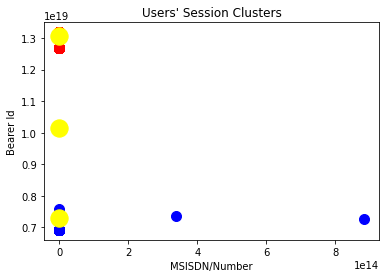


Centroids:
[[3.36806278e+10 1.30721059e+19]
 [4.99013022e+10 7.28801267e+18]
 [3.83279310e+10 1.01388747e+19]]


Min-Max Values 

Cluster 1:


Max Value(ms) 1.31865411671342e+19
Min Value(ms): 1.26821377751638e+19
Mean Value(ms):1.3072105917632057e+19
Total Value(ms): 9.600677470145688e+23


Cluster 2:


Max Value(ms) 7.56605604107365e+18
Min Value(ms): 6.91753751854353e+18
Mean Value(ms):7.288012667286459e+18
Total Value(ms): 5.5072596521616855e+23


Cluster 3:


Max Value(ms) 1.013887465425634e+19
Min Value(ms): 1.013887465425634e+19
Mean Value(ms):1.0138874654256337e+19
Total Value(ms): 1.004762478236803e+22


Optimal n_clusters - Elbow Method




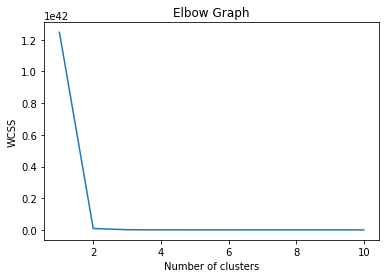

In [185]:
Cluster(db_sklearn,['MSISDN/Number', 'Bearer Id'], "Users' Session Clusters",'MSISDN/Number','Bearer Id')

### Duration Clusters

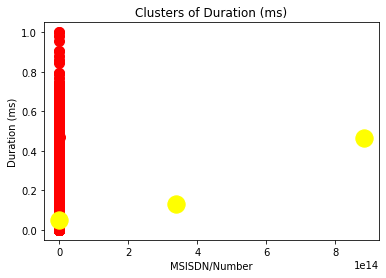


Centroids:
[[3.37540095e+10 5.26189315e-02]
 [8.82397108e+14 4.65773024e-01]
 [3.37000037e+14 1.32754992e-01]]


Min-Max Values 

Cluster 1:


Max Value(ms) 0.9999999999999999
Min Value(ms): 0.0
Mean Value(ms):0.052618931526717705
Total Value(ms): 7892.787110076129


Cluster 2:


Max Value(ms) 0.46577302377612706
Min Value(ms): 0.46577302377612706
Mean Value(ms):0.46577302377612706
Total Value(ms): 0.46577302377612706


Cluster 3:


Max Value(ms) 0.13275499218764342
Min Value(ms): 0.13275499218764342
Mean Value(ms):0.13275499218764342
Total Value(ms): 0.13275499218764342


Optimal n_clusters - Elbow Method




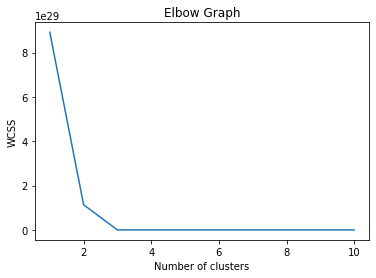

In [186]:
Cluster(db_sklearn,['MSISDN/Number', 'Dur. (ms)'], "Clusters of Duration (ms)",'MSISDN/Number','Duration (ms)')

### Min-Max for Non-Normalized Data

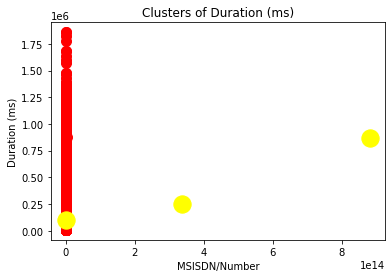


Centroids:
[[3.37540095e+10 1.04602469e+05]
 [8.82397108e+14 8.69844000e+05]
 [3.37000037e+14 2.53030000e+05]]


Min-Max Values 

Cluster 1:


Max Value(ms) 1859336.0
Min Value(ms): 7142.0
Mean Value(ms):104602.46926019738
Total Value(ms): 15690265786.560347


Cluster 2:


Max Value(ms) 869844.0
Min Value(ms): 869844.0
Mean Value(ms):869844.0
Total Value(ms): 869844.0


Cluster 3:


Max Value(ms) 253030.0
Min Value(ms): 253030.0
Mean Value(ms):253030.0
Total Value(ms): 253030.0


Optimal n_clusters - Elbow Method




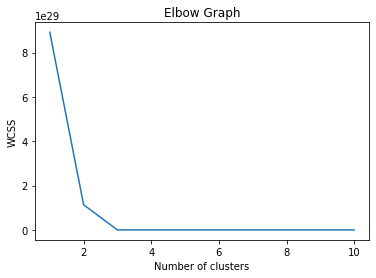

In [187]:
Cluster(db,['MSISDN/Number', 'Dur. (ms)'], "Clusters of Duration (ms)",'MSISDN/Number','Duration (ms)')

### Total Bytes Clusters

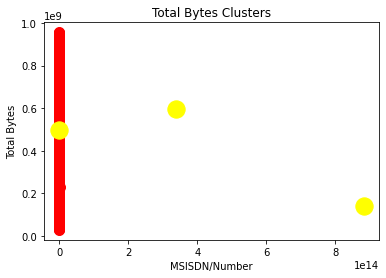


Centroids:
[[3.37540095e+10 4.95766344e+08]
 [8.82397108e+14 1.39153646e+08]
 [3.37000037e+14 5.96287824e+08]]


Min-Max Values 

Cluster 1:


Max Value(ms) 955984776.0
Min Value(ms): 28956107.0
Mean Value(ms):495766343.6344734
Total Value(ms): 74364455778827.38


Cluster 2:


Max Value(ms) 139153646.0
Min Value(ms): 139153646.0
Mean Value(ms):139153646.0
Total Value(ms): 139153646.0


Cluster 3:


Max Value(ms) 596287824.0
Min Value(ms): 596287824.0
Mean Value(ms):596287824.0
Total Value(ms): 596287824.0


Optimal n_clusters - Elbow Method




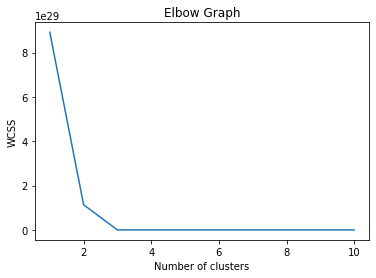

In [188]:
Cluster(db_totals_col,['MSISDN/Number', 'Total Bytes'], "Total Bytes Clusters",'MSISDN/Number',"Total Bytes")

### Total Social Media Clusters

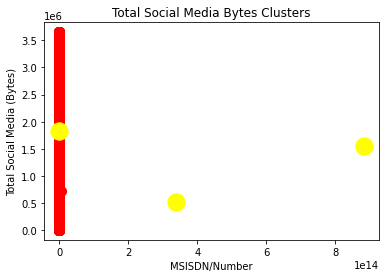


Centroids:
[[3.37540095e+10 1.82826080e+06]
 [8.82397108e+14 1.54608800e+06]
 [3.37000037e+14 5.21566000e+05]]


Min-Max Values 

Cluster 1:


Max Value(ms) 3650861.0
Min Value(ms): 1563.0
Mean Value(ms):1828260.800406723
Total Value(ms): 274237291800.20804


Cluster 2:


Max Value(ms) 1546088.0
Min Value(ms): 1546088.0
Mean Value(ms):1546088.0
Total Value(ms): 1546088.0


Cluster 3:


Max Value(ms) 521566.0
Min Value(ms): 521566.0
Mean Value(ms):521566.0
Total Value(ms): 521566.0


Optimal n_clusters - Elbow Method




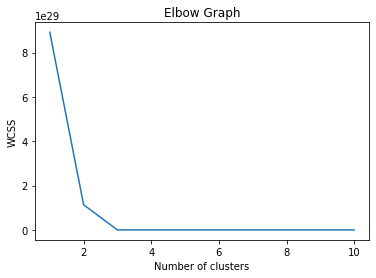

In [189]:
Cluster(db_totals_col,['MSISDN/Number', 'Total Social Media (Bytes)'], "Total Social Media Bytes Clusters",'MSISDN/Number',"Total Social Media (Bytes)")

### Total Google Bytes Clusters

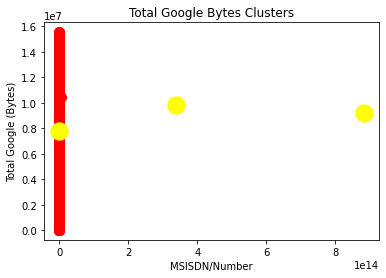


Centroids:
[[3.37540095e+10 7.80727165e+06]
 [8.82397108e+14 9.21864700e+06]
 [3.37000037e+14 9.83061700e+06]]


Min-Max Values 

Cluster 1:


Max Value(ms) 15528782.0
Min Value(ms): 40330.0
Mean Value(ms):7807271.647587955
Total Value(ms): 1171082939866.5457


Cluster 2:


Max Value(ms) 9218647.0
Min Value(ms): 9218647.0
Mean Value(ms):9218647.0
Total Value(ms): 9218647.0


Cluster 3:


Max Value(ms) 9830617.0
Min Value(ms): 9830617.0
Mean Value(ms):9830617.0
Total Value(ms): 9830617.0


Optimal n_clusters - Elbow Method




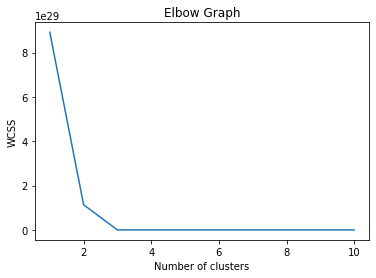

In [190]:
Cluster(db_totals_col,['MSISDN/Number', 'Total Google (Bytes)'], "Total Google Bytes Clusters",'MSISDN/Number',"Total Google (Bytes)")

### Total Email Bytes Clusters

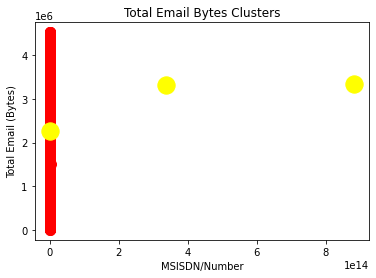


Centroids:
[[3.37540095e+10 2.25908810e+06]
 [8.82397108e+14 3.33097400e+06]
 [3.37000037e+14 3.31858200e+06]]


Min-Max Values 

Cluster 1:


Max Value(ms) 4518036.0
Min Value(ms): 8359.0
Mean Value(ms):2259088.100856072
Total Value(ms): 338860956040.30994


Cluster 2:


Max Value(ms) 3330974.0
Min Value(ms): 3330974.0
Mean Value(ms):3330974.0
Total Value(ms): 3330974.0


Cluster 3:


Max Value(ms) 3318582.0
Min Value(ms): 3318582.0
Mean Value(ms):3318582.0
Total Value(ms): 3318582.0


Optimal n_clusters - Elbow Method




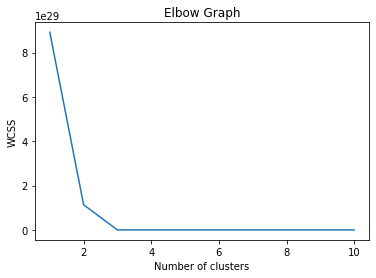

In [191]:
Cluster(db_totals_col,['MSISDN/Number', 'Total Email (Bytes)'], "Total Email Bytes Clusters",'MSISDN/Number',"Total Email (Bytes)")

### Total Youtube Bytes Clusters

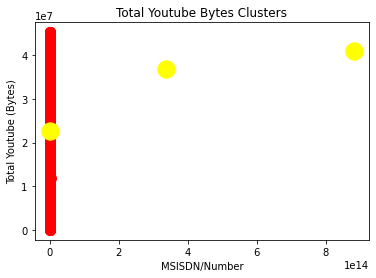


Centroids:
[[3.37540095e+10 2.26432667e+07]
 [8.82397108e+14 4.09407100e+07]
 [3.37000037e+14 3.67349400e+07]]


Min-Max Values 

Cluster 1:


Max Value(ms) 45190078.0
Min Value(ms): 78903.0
Mean Value(ms):22643266.712595675
Total Value(ms): 3396467363622.6387


Cluster 2:


Max Value(ms) 40940710.0
Min Value(ms): 40940710.0
Mean Value(ms):40940710.0
Total Value(ms): 40940710.0


Cluster 3:


Max Value(ms) 36734940.0
Min Value(ms): 36734940.0
Mean Value(ms):36734940.0
Total Value(ms): 36734940.0


Optimal n_clusters - Elbow Method




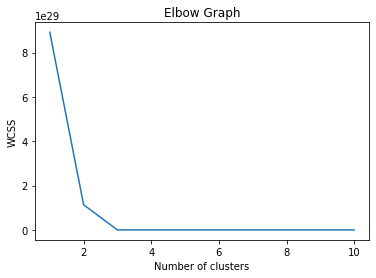

In [192]:
Cluster(db_totals_col,['MSISDN/Number', 'Total Youtube (Bytes)'], "Total Youtube Bytes Clusters",'MSISDN/Number',"Total Youtube (Bytes)")

### Total Netflix Bytes Clusters

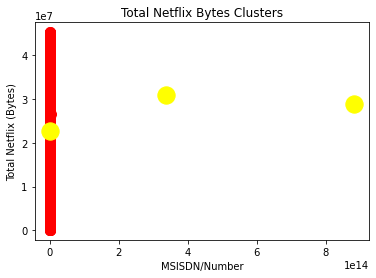


Centroids:
[[3.37540095e+10 2.26285099e+07]
 [8.82397108e+14 2.88462300e+07]
 [3.37000037e+14 3.09050420e+07]]


Min-Max Values 

Cluster 1:


Max Value(ms) 45198153.0
Min Value(ms): 98432.0
Mean Value(ms):22628509.910676327
Total Value(ms): 3394253858091.5386


Cluster 2:


Max Value(ms) 28846230.0
Min Value(ms): 28846230.0
Mean Value(ms):28846230.0
Total Value(ms): 28846230.0


Cluster 3:


Max Value(ms) 30905042.0
Min Value(ms): 30905042.0
Mean Value(ms):30905042.0
Total Value(ms): 30905042.0


Optimal n_clusters - Elbow Method




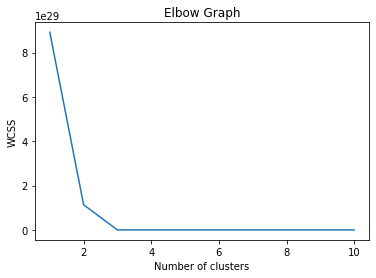

In [193]:
Cluster(db_totals_col,['MSISDN/Number', 'Total Netflix (Bytes)'], "Total Netflix Bytes Clusters",'MSISDN/Number',"Total Netflix (Bytes)")

### Total Gaming Bytes Clusters

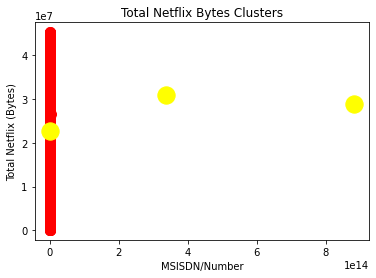


Centroids:
[[3.37540095e+10 2.26285099e+07]
 [8.82397108e+14 2.88462300e+07]
 [3.37000037e+14 3.09050420e+07]]


Min-Max Values 

Cluster 1:


Max Value(ms) 45198153.0
Min Value(ms): 98432.0
Mean Value(ms):22628509.910676327
Total Value(ms): 3394253858091.5386


Cluster 2:


Max Value(ms) 28846230.0
Min Value(ms): 28846230.0
Mean Value(ms):28846230.0
Total Value(ms): 28846230.0


Cluster 3:


Max Value(ms) 30905042.0
Min Value(ms): 30905042.0
Mean Value(ms):30905042.0
Total Value(ms): 30905042.0


Optimal n_clusters - Elbow Method




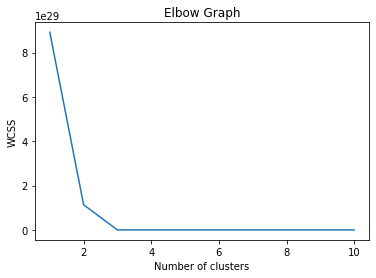

In [194]:
Cluster(db_totals_col,['MSISDN/Number', 'Total Netflix (Bytes)'], "Total Netflix Bytes Clusters",'MSISDN/Number',"Total Netflix (Bytes)")

### Total Other Services Bytes Clusters

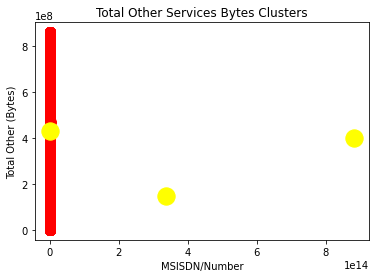


Centroids:
[[3.37540095e+10 4.29367398e+08]
 [8.82397108e+14 4.01360457e+08]
 [3.37000037e+14 1.49188439e+08]]


Min-Max Values 

Cluster 1:


Max Value(ms) 859520934.0
Min Value(ms): 149045.0
Mean Value(ms):429367398.17789197
Total Value(ms): 64404680359285.62


Cluster 2:


Max Value(ms) 401360457.0
Min Value(ms): 401360457.0
Mean Value(ms):401360457.0
Total Value(ms): 401360457.0


Cluster 3:


Max Value(ms) 149188439.0
Min Value(ms): 149188439.0
Mean Value(ms):149188439.0
Total Value(ms): 149188439.0


Optimal n_clusters - Elbow Method




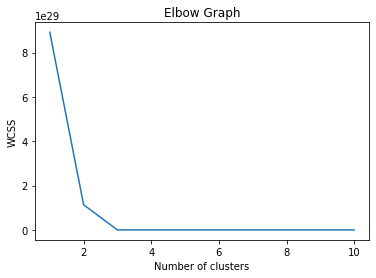

In [195]:
Cluster(db_totals_col,['MSISDN/Number', 'Total Other (Bytes)'], "Total Other Services Bytes Clusters",'MSISDN/Number',"Total Other (Bytes)")

### Total UL Clusters

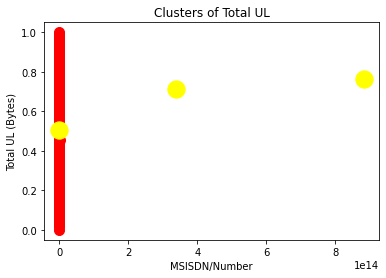


Centroids:
[[3.37540095e+10 5.06915476e-01]
 [8.82397108e+14 7.63129933e-01]
 [3.37000037e+14 7.12732540e-01]]


Min-Max Values 

Cluster 1:


Max Value(ms) 1.0
Min Value(ms): 0.0
Mean Value(ms):0.5069154755884041
Total Value(ms): 76036.81442278503


Cluster 2:


Max Value(ms) 0.7631299327965408
Min Value(ms): 0.7631299327965408
Mean Value(ms):0.7631299327965408
Total Value(ms): 0.7631299327965408


Cluster 3:


Max Value(ms) 0.7127325395561583
Min Value(ms): 0.7127325395561583
Mean Value(ms):0.7127325395561583
Total Value(ms): 0.7127325395561583


Optimal n_clusters - Elbow Method




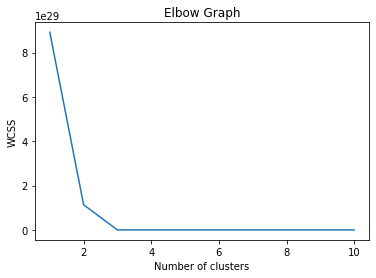

In [196]:
Cluster(db_sklearn,['MSISDN/Number', 'Total UL (Bytes)'], "Clusters of Total UL",'MSISDN/Number',"Total UL (Bytes)")

### Min-Max for Non-Normalized Data

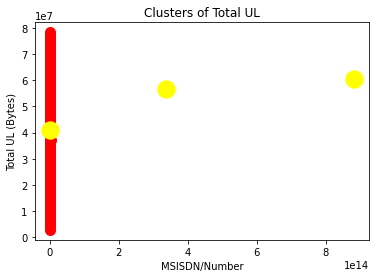


Centroids:
[[3.37540095e+10 4.11209738e+07]
 [8.82397108e+14 6.04560490e+07]
 [3.37000037e+14 5.66528390e+07]]


Min-Max Values 

Cluster 1:


Max Value(ms) 78331311.0
Min Value(ms): 2866892.0
Mean Value(ms):41120973.8473876
Total Value(ms): 6168104956134.292


Cluster 2:


Max Value(ms) 60456049.0
Min Value(ms): 60456049.0
Mean Value(ms):60456049.0
Total Value(ms): 60456049.0


Cluster 3:


Max Value(ms) 56652839.0
Min Value(ms): 56652839.0
Mean Value(ms):56652839.0
Total Value(ms): 56652839.0


Optimal n_clusters - Elbow Method




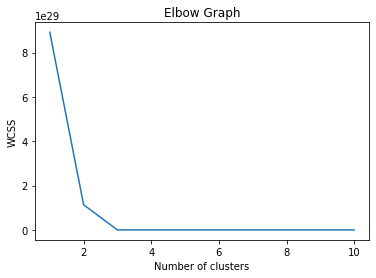

In [197]:
Cluster(db,['MSISDN/Number', 'Total UL (Bytes)'], "Clusters of Total UL",'MSISDN/Number',"Total UL (Bytes)")

### Data Scaling and Encoding

#### Drop some columns

In [198]:
print("Numeric scaled data:\n")
db_sklearn.head() # scaled data

Numeric scaled data:



Bearer Id            Start  Start ms              End  \
0 13,114,483,460,844,900,352.00   4/4/2019 12:01      0.77  4/25/2019 14:35   
1 13,114,483,482,878,900,224.00   4/9/2019 13:04      0.24   4/25/2019 8:15   
2 13,114,483,484,080,500,736.00   4/9/2019 17:42      0.00  4/25/2019 11:58   
3 13,114,483,485,442,799,616.00   4/10/2019 0:31      0.49   4/25/2019 7:36   
4 13,114,483,499,480,700,928.00  4/12/2019 20:10      0.57  4/25/2019 10:40   

   End ms  Dur. (ms)                   IMSI     MSISDN/Number  \
0    0.66       0.98 208,201,448,079,117.00 33,664,962,239.00   
1    0.61       0.73 208,201,909,211,140.00 33,681,854,413.00   
2    0.65       0.73 208,200,314,458,056.00 33,760,627,129.00   
3    0.17       0.71 208,201,402,342,131.00 33,750,343,200.00   
4    0.95       0.58 208,201,401,415,120.00 33,699,795,932.00   

                   IMEI     Last Location Name  Avg RTT DL (ms)  \
0 35,521,209,507,511.00  9.16456699548519E+015             0.00   
1 35,794,009,006,359.00                L77566A             0.00   
2 35,281,510,359,387.00                D42335A             0.00   
3 35,356,610,164,913.00                T21824A             0.00   
4 35,407,009,745,539.00                D88865A             0.00   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0             0.00                     0.00                     0.00   
1             0.00                     0.00                     0.00   
2             0.00                     0.00                     0.00   
3             0.00                     0.00                     0.00   
4             0.00                     0.00                     0.00   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.00                         0.00   
3                         0.00                         0.00   
4                         0.00                         0.00   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                 1.00                            0.00   
1                 1.00                            0.00   
2                 1.00                            0.00   
3                 1.00                            0.00   
4                 1.00                            0.00   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                           0.00                0.00                 1.00   
1                           0.00                0.00                 1.00   
2                           0.00                0.00                 1.00   
3                           0.00                0.00                 1.00   
4                           0.00                0.00                 1.00   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                  0.00             0.00             0.00   
1                  0.00             0.00             0.00   
2                  0.00             0.00             0.00   
3                  0.00             0.00             0.00   
4                  0.00             0.00             0.00   

   Activity Duration DL (ms)  Activity Duration UL (ms)  Dur. (ms).1  \
0                       0.00                       0.00         0.98   
1                       0.00                       0.00         0.73   
2                       0.00                       0.00         0.73   
3                       0.00                       0.00         0

In [199]:
columns_drop = ['Start','Start ms', 'End', 'End ms', 'IMSI','IMEI','Last Location Name','Dur. (ms).1']
db_drop_col = db_sklearn.copy()
db_drop_col=db_sklearn.drop(columns_drop, axis=1)
print("Data with some columns dropped: \n")
db_drop_col.head()



Data with some columns dropped: 



Bearer Id  Dur. (ms)     MSISDN/Number  Avg RTT DL (ms)  \
0 13,114,483,460,844,900,352.00       0.98 33,664,962,239.00             0.00   
1 13,114,483,482,878,900,224.00       0.73 33,681,854,413.00             0.00   
2 13,114,483,484,080,500,736.00       0.73 33,760,627,129.00             0.00   
3 13,114,483,485,442,799,616.00       0.71 33,750,343,200.00             0.00   
4 13,114,483,499,480,700,928.00       0.58 33,699,795,932.00             0.00   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0             0.00                     0.00                     0.00   
1             0.00                     0.00                     0.00   
2             0.00                     0.00                     0.00   
3             0.00                     0.00                     0.00   
4             0.00                     0.00                     0.00   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.00                         0.00   
3                         0.00                         0.00   
4                         0.00                         0.00   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                 1.00                            0.00   
1                 1.00                            0.00   
2                 1.00                            0.00   
3                 1.00                            0.00   
4                 1.00                            0.00   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                           0.00                0.00                 1.00   
1                           0.00                0.00                 1.00   
2                           0.00                0.00                 1.00   
3                           0.00                0.00                 1.00   
4                           0.00                0.00                 1.00   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                  0.00             0.00             0.00   
1                  0.00             0.00             0.00   
2                  0.00             0.00             0.00   
3                  0.00             0.00             0.00   
4                  0.00             0.00             0.00   

   Activity Duration DL (ms)  Activity Duration UL (ms) Handset Manufacturer  \
0                       0.00                       0.00              Samsung   
1                       0.00                       0.00              Samsung   
2                       0.00                       0.00              Samsung   
3                       0.00                       0.00                Apple   
4                       0.00                       0.00              Samsung   

                  Handset Type  Nb of sec with 125000B < Vol DL  \
0   Samsung Galaxy A5 Sm-A520F                             0.01   
1  Samsung Galaxy J5 (Sm-J530)                             0.01   
2     Samsung Galaxy A8 (2018)                             0.01   
3             Huawei B528S-23A                             0.01   
4             Samsung Sm-G390F                             0.01   

   Nb of sec with 1250B < Vol UL < 6250B  \
0                                   0.00   
1                                   0.00   
2                                   0.00   
3                                   0.00   
4                              

In [200]:
db_drop_col.shape

(150001, 47)

In [201]:
db_encoded = db_drop_col.copy()
lb = LabelEncoder() 
column_encoded = ['Handset Manufacturer', 'Handset Type']


def db_encoding (df):
  for column in column_encoded:
    df[column] = lb.fit_transform(df[column])
  return df

In [202]:
db_encooded = db_encoding(db_encoded)
print("Data with categorical data encoded:\n")
db_encoded.head()

Data with categorical data encoded:



Bearer Id  Dur. (ms)     MSISDN/Number  Avg RTT DL (ms)  \
0 13,114,483,460,844,900,352.00       0.98 33,664,962,239.00             0.00   
1 13,114,483,482,878,900,224.00       0.73 33,681,854,413.00             0.00   
2 13,114,483,484,080,500,736.00       0.73 33,760,627,129.00             0.00   
3 13,114,483,485,442,799,616.00       0.71 33,750,343,200.00             0.00   
4 13,114,483,499,480,700,928.00       0.58 33,699,795,932.00             0.00   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0             0.00                     0.00                     0.00   
1             0.00                     0.00                     0.00   
2             0.00                     0.00                     0.00   
3             0.00                     0.00                     0.00   
4             0.00                     0.00                     0.00   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.00                         0.00   
3                         0.00                         0.00   
4                         0.00                         0.00   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                 1.00                            0.00   
1                 1.00                            0.00   
2                 1.00                            0.00   
3                 1.00                            0.00   
4                 1.00                            0.00   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                           0.00                0.00                 1.00   
1                           0.00                0.00                 1.00   
2                           0.00                0.00                 1.00   
3                           0.00                0.00                 1.00   
4                           0.00                0.00                 1.00   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                  0.00             0.00             0.00   
1                  0.00             0.00             0.00   
2                  0.00             0.00             0.00   
3                  0.00             0.00             0.00   
4                  0.00             0.00             0.00   

   Activity Duration DL (ms)  Activity Duration UL (ms)  Handset Manufacturer  \
0                       0.00                       0.00                   103   
1                       0.00                       0.00                   103   
2                       0.00                       0.00                   103   
3                       0.00                       0.00                     5   
4                       0.00                       0.00                   103   

   Handset Type  Nb of sec with 125000B < Vol DL  \
0           838                             0.01   
1           888                             0.01   
2           850                             0.01   
3           316                             0.01   
4          1014                             0.01   

   Nb of sec with 1250B < Vol UL < 6250B  \
0                                   0.00   
1                                   0.00   
2                                   0.00   
3                                   0.00   
4                                   0.00   

   Nb of sec with 31250B < Vol DL < 125000B  Nb of sec with 37500B < V

In [203]:
db_user_Duration.head()

Duration_ms
MSISDN/Number                  
41,882,819,545.03 72,551,004.56
33,625,779,332.00 18,553,754.00
33,614,892,860.00  9,966,898.00
33,760,536,639.00  9,279,434.00
33,626,320,676.00  8,791,927.00

# User Experience Analysis
* AVG TCP Retrans
* AVG RTT
* AVG TP
* Handset Type

### User Experience Utitlity Functions

In [204]:
# def Aggregate_Sort_db(df, group_by, sort_by,agg_by,agg_func):
#   return df.groupby(group_by).agg(sort_by = (agg_by,agg_func)).sort(by=str(sort_by), ascending = )
# # db_user_TCP_DL_RT_count = db.groupby(["MSISDN/Number"]).agg(TCP_DL_RT_Count = ("TCP DL Retrans. Vol (Bytes)", 'value_counts')).sort_values(by='TCP_DL_RT_Count', ascending = False)#.value_counts(ascending = False) # it also works
# # db_user_TCP_DL_RT_count.head(10)

def group_agg_sort_db(df, group_by, sort_by,agg_by,agg_func):
  return df.groupby(group_by).agg(sort_by = (agg_by,agg_func)).sort_values(by=(agg_by,agg_func), ascending = False)
  

### Total TCP Retransmission

In [205]:
db_user_Total_TCPRtrans = db_totals_col.groupby(["MSISDN/Number"]).agg(Total_TCP_RT = ('Total TCP Retrans. (Bytes)', 'sum')).sort_values(by='Total_TCP_RT', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Total_TCPRtrans

Total_TCP_RT
MSISDN/Number                      
41,882,819,545.03 18,104,917,336.44
33,667,725,464.00  8,354,209,105.00
33,659,084,281.00  7,941,860,302.00
33,660,977,522.00  7,374,898,718.66
33,761,284,050.00  6,043,978,448.00
...                             ...
33,607,833,304.00            143.00
33,626,357,513.00            134.00
33,762,062,356.00            129.00
33,614,777,138.00            128.00
33,650,128,412.00             97.00

[106857 rows x 1 columns]

### Top 10 TCP Retransmissions

In [206]:
db_user_Total_TCPRtrans.head(10)

Total_TCP_RT
MSISDN/Number                      
41,882,819,545.03 18,104,917,336.44
33,667,725,464.00  8,354,209,105.00
33,659,084,281.00  7,941,860,302.00
33,660,977,522.00  7,374,898,718.66
33,761,284,050.00  6,043,978,448.00
33,762,644,658.00  5,879,989,037.00
33,650,658,056.00  5,593,366,107.00
33,663,180,885.00  5,566,928,580.00
33,669,054,076.00  5,195,784,536.94
33,763,572,381.00  5,179,458,974.00

### Bottom 10 TCP Retransmissions

In [207]:
db_user_Total_TCPRtrans.tail(10)

Total_TCP_RT
MSISDN/Number                  
33,699,694,715.00        182.00
33,679,366,089.00        179.00
33,784,203,839.00        177.00
33,650,681,239.00        176.00
33,769,636,458.00        176.00
33,607,833,304.00        143.00
33,626,357,513.00        134.00
33,762,062,356.00        129.00
33,614,777,138.00        128.00
33,650,128,412.00         97.00

### TCP DL Retramsmission

In [208]:
db_user_TCP_DL_RT = db.groupby(["MSISDN/Number"]).agg(TCP_DL_RT = ("TCP DL Retrans. Vol (Bytes)", 'sum')).sort_values(by='TCP_DL_RT', ascending = False)#.value_counts(ascending = False) # it also works
db_user_TCP_DL_RT

TCP_DL_RT
MSISDN/Number                      
41,882,819,545.03 17,642,635,928.62
33,667,725,464.00  8,332,732,777.00
33,659,084,281.00  7,938,178,623.00
33,660,977,522.00  7,374,100,838.00
33,761,284,050.00  6,039,191,773.00
...                             ...
33,761,506,920.00              4.00
33,761,619,710.00              4.00
33,699,002,991.00              4.00
33,664,535,559.00              2.00
33,761,543,605.00              2.00

[106857 rows x 1 columns]

### Top 10 TCP DL Retramsmission

In [209]:
db_user_TCP_DL_RT.head(10)

TCP_DL_RT
MSISDN/Number                      
41,882,819,545.03 17,642,635,928.62
33,667,725,464.00  8,332,732,777.00
33,659,084,281.00  7,938,178,623.00
33,660,977,522.00  7,374,100,838.00
33,761,284,050.00  6,039,191,773.00
33,762,644,658.00  5,878,002,490.00
33,650,658,056.00  5,590,343,967.00
33,663,180,885.00  5,562,845,158.00
33,763,572,381.00  5,178,607,391.00
33,658,638,625.00  5,165,784,763.00

### Bottom 10 TCP DL Retransmissions

In [210]:
db_user_TCP_DL_RT.tail(10)

TCP_DL_RT
MSISDN/Number               
33,763,992,917.00       4.00
33,761,544,858.00       4.00
33,669,328,368.00       4.00
33,669,309,035.00       4.00
33,763,938,150.00       4.00
33,761,506,920.00       4.00
33,761,619,710.00       4.00
33,699,002,991.00       4.00
33,664,535,559.00       2.00
33,761,543,605.00       2.00

### 10 most frequent TCP DL Reteransmissions

In [211]:
db_user_TCP_DL_RT_count = db.groupby(["MSISDN/Number"]).agg(TCP_DL_RT_Count = ("TCP DL Retrans. Vol (Bytes)", 'value_counts')).sort_values(by='TCP_DL_RT_Count', ascending = False)#.value_counts(ascending = False) # it also works
db_user_TCP_DL_RT_count.head(10)

TCP_DL_RT_Count
MSISDN/Number     TCP DL Retrans. Vol (Bytes)                 
41,882,819,545.03 20,809,914.27                            350
33,625,779,332.00 20,809,914.27                             12
33,626,320,676.00 20,809,914.27                             11
33,760,536,639.00 20,809,914.27                             10
33,669,068,942.00 20,809,914.27                              9
33,676,501,152.00 20,809,914.27                              9
33,786,323,068.00 20,809,914.27                              9
33,627,080,969.00 20,809,914.27                              9
33,664,693,736.00 20,809,914.27                              9
41,882,819,545.03 1,330.00                                   9

### TCP UL Retransmission

In [212]:
db_user_TCP_UL_RT = db.groupby(["MSISDN/Number"]).agg(TCP_UL_RT = ("TCP UL Retrans. Vol (Bytes)", 'sum')).sort_values(by='TCP_UL_RT', ascending = False)#.value_counts(ascending = False) # it also works
db_user_TCP_UL_RT

TCP_UL_RT
MSISDN/Number                     
33,669,054,076.00 5,169,346,345.66
33,658,249,284.00 2,637,302,536.00
33,763,588,772.00 2,455,599,840.00
33,664,698,321.00 1,751,383,517.00
33,665,090,461.00 1,727,810,000.00
...                            ...
33,635,265,913.00             2.00
33,659,776,438.00             2.00
33,642,796,046.00             1.00
33,782,587,773.00             1.00
33,668,086,182.00             1.00

[106857 rows x 1 columns]

### Top 10 TCP UL Retransmissions

In [213]:
db_user_TCP_UL_RT.head(10)

TCP_UL_RT
MSISDN/Number                     
33,669,054,076.00 5,169,346,345.66
33,658,249,284.00 2,637,302,536.00
33,763,588,772.00 2,455,599,840.00
33,664,698,321.00 1,751,383,517.00
33,665,090,461.00 1,727,810,000.00
33,760,918,898.00 1,238,624,476.66
33,668,333,080.00   807,925,207.00
33,661,679,531.00   794,825,766.00
33,698,382,849.00   719,571,807.00
33,668,446,094.00   526,246,337.00

### Bottom 10 TCP UL Retransmissions

In [214]:
db_user_TCP_UL_RT.tail(10)

TCP_UL_RT
MSISDN/Number               
33,627,130,922.00       3.00
33,672,916,358.00       3.00
33,665,381,941.00       3.00
33,670,409,412.00       3.00
33,699,595,309.00       2.00
33,635,265,913.00       2.00
33,659,776,438.00       2.00
33,642,796,046.00       1.00
33,782,587,773.00       1.00
33,668,086,182.00       1.00

### 10 most frequent TCP UL Reteransmissions

In [215]:
db_user_TCP_UL_RT_count = db.groupby(["MSISDN/Number"]).agg(TCP_UL_RT_Count = ("TCP UL Retrans. Vol (Bytes)", 'value_counts')).sort_values(by='TCP_UL_RT_Count', ascending = False)#.value_counts(ascending = False) # it also works
db_user_TCP_UL_RT_count.head(10)

TCP_UL_RT_Count
MSISDN/Number     TCP UL Retrans. Vol (Bytes)                 
41,882,819,545.03 759,658.66                               457
                  1,330.00                                  34
33,625,779,332.00 759,658.66                                16
41,882,819,545.03 2,660.00                                  15
33,667,163,239.00 759,658.66                                12
33,786,323,068.00 759,658.66                                11
33,760,536,639.00 759,658.66                                10
33,626,320,676.00 759,658.66                                10
33,669,068,942.00 759,658.66                                10
33,664,693,736.00 759,658.66                                 9

### Total Avg RTT

In [216]:
db_user_Total_RTT = db_totals_col.groupby(["MSISDN/Number"]).agg(Total_RTT = ('Total Avg RTT (ms)', 'sum')).sort_values(by='Total_RTT', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Total_RTT

Total_RTT
MSISDN/Number               
41,882,819,545.03 329,526.16
33,662,317,023.00  96,924.00
33,660,874,265.00  64,670.00
33,683,692,867.00  54,848.00
33,698,551,167.00  46,021.00
...                      ...
33,659,493,541.00       5.00
33,695,045,499.00       4.00
33,660,204,450.00       2.00
33,661,575,382.00       0.00
33,652,982,188.00       0.00

[106857 rows x 1 columns]

### Top 10 Avg RTT Times

In [217]:
db_user_Total_RTT.head(10)

Total_RTT
MSISDN/Number               
41,882,819,545.03 329,526.16
33,662,317,023.00  96,924.00
33,660,874,265.00  64,670.00
33,683,692,867.00  54,848.00
33,698,551,167.00  46,021.00
33,761,813,523.00  37,084.00
33,668,791,629.00  36,304.00
33,760,941,100.00  27,278.00
33,606,788,933.00  26,300.00
33,671,816,754.00  25,715.00

### Bottom 10 Avg RTT Times

In [218]:
db_user_Total_RTT.tail(10)

Total_RTT
MSISDN/Number               
33,634,684,770.00      10.00
33,610,846,366.00       9.00
33,672,196,893.00       9.00
33,647,679,481.00       8.00
33,668,619,895.00       6.00
33,659,493,541.00       5.00
33,695,045,499.00       4.00
33,660,204,450.00       2.00
33,661,575,382.00       0.00
33,652,982,188.00       0.00

### Average RTT DL

In [219]:
db_user_RTT_DL = db.groupby(["MSISDN/Number"]).agg(AVG_RTT_DL = ("Avg RTT DL (ms)", 'sum')).sort_values(by='AVG_RTT_DL', ascending = False)#.value_counts(ascending = False) # it also works
db_user_RTT_DL

AVG_RTT_DL
MSISDN/Number                
41,882,819,545.03  307,586.21
33,662,317,023.00   96,923.00
33,660,874,265.00   64,666.00
33,683,692,867.00   54,847.00
33,698,551,167.00   45,923.00
...                       ...
33,652,982,188.00        0.00
33,762,753,209.00        0.00
33,660,637,039.00        0.00
33,667,477,967.00        0.00
33,699,538,565.00        0.00

[106857 rows x 1 columns]

### Top 10 Average RTT DL

In [220]:
db_user_RTT_DL.head(10)

AVG_RTT_DL
MSISDN/Number                
41,882,819,545.03  307,586.21
33,662,317,023.00   96,923.00
33,660,874,265.00   64,666.00
33,683,692,867.00   54,847.00
33,698,551,167.00   45,923.00
33,761,813,523.00   36,977.00
33,668,791,629.00   36,125.00
33,760,941,100.00   26,971.00
33,606,788,933.00   26,250.00
33,671,816,754.00   25,602.00

### Bottom 10 Average RTT DL

In [221]:
db_user_RTT_DL.tail(10)

AVG_RTT_DL
MSISDN/Number                
33,659,493,541.00        5.00
33,788,060,063.00        5.00
33,695,045,499.00        4.00
33,660,204,450.00        2.00
33,661,575,382.00        0.00
33,652,982,188.00        0.00
33,762,753,209.00        0.00
33,660,637,039.00        0.00
33,667,477,967.00        0.00
33,699,538,565.00        0.00

### 10 most frequnet RTT DL

In [222]:
db_user_RTT_DL_count = db.groupby(["MSISDN/Number"]).agg(AVG_RTT_DL_Count = ("Avg RTT DL (ms)", 'value_counts')).sort_values(by='AVG_RTT_DL_Count', ascending = False)#.value_counts(ascending = False) # it also works
db_user_RTT_DL_count.head(10)

AVG_RTT_DL_Count
MSISDN/Number     Avg RTT DL (ms)                  
41,882,819,545.03 109.80                        185
                  40.00                          24
                  34.00                          22
                  35.00                          20
                  41.00                          18
                  39.00                          18
                  42.00                          17
                  33.00                          17
                  45.00                          16
                  30.00                          15

### Average RTT UL

In [223]:
db_user_RTT_UL = db.groupby(["MSISDN/Number"]).agg(AVG_RTT_UL = ("Avg RTT UL (ms)", 'sum')).sort_values(by='AVG_RTT_UL', ascending = False)#.value_counts(ascending = False) # it also works
db_user_RTT_UL

AVG_RTT_UL
MSISDN/Number                
41,882,819,545.03   21,939.96
33,659,778,586.00    7,120.00
33,633,298,261.00    5,607.00
33,761,092,970.00    5,422.00
33,667,163,239.00    5,414.00
...                       ...
33,666,658,437.00        0.00
33,666,666,373.00        0.00
33,761,103,978.00        0.00
33,628,032,087.00        0.00
33,601,001,722.00        0.00

[106857 rows x 1 columns]

### Top 10 Average RTT UL

In [224]:
db_user_RTT_UL.head(10)


AVG_RTT_UL
MSISDN/Number                
41,882,819,545.03   21,939.96
33,659,778,586.00    7,120.00
33,633,298,261.00    5,607.00
33,761,092,970.00    5,422.00
33,667,163,239.00    5,414.00
33,627,850,141.00    5,295.00
33,762,057,942.00    5,248.00
33,668,497,162.00    4,694.66
33,636,368,478.00    4,038.66
33,778,078,390.00    3,923.00

### Bottom 10 Average RTT UL

In [225]:
db_user_RTT_UL.tail(10)

AVG_RTT_UL
MSISDN/Number                
33,666,642,545.00        0.00
33,666,649,347.00        0.00
33,628,139,683.00        0.00
33,778,070,260.00        0.00
33,628,071,495.00        0.00
33,666,658,437.00        0.00
33,666,666,373.00        0.00
33,761,103,978.00        0.00
33,628,032,087.00        0.00
33,601,001,722.00        0.00

### 10 most frequent RTT UL

In [226]:
db_user_RTT_UL_count = db.groupby(["MSISDN/Number"]).agg(AVG_RTT_UL_Count = ("Avg RTT UL (ms)", 'value_counts')).sort_values(by='AVG_RTT_UL_Count', ascending = False)#.value_counts(ascending = False) # it also works
db_user_RTT_UL_count.head(10)

AVG_RTT_UL_Count
MSISDN/Number     Avg RTT UL (ms)                  
41,882,819,545.03 17.66                         187
                  5.00                           63
                  8.00                           60
                  3.00                           58
                  9.00                           56
                  6.00                           52
                  10.00                          47
                  7.00                           47
                  4.00                           46
                  11.00                          44

In [227]:
db_totals_col.columns

Index(['MSISDN/Number', 'Dur. (ms)', 'Handset Type', 'Total Bytes',
       'Total TCP Retrans. (Bytes)', 'Total Avg RTT (ms)',
       'Total Avg TP (kbps)', 'Total Social Media (Bytes)',
       'Total Google (Bytes)', 'Total Youtube (Bytes)', 'Total Email (Bytes)',
       'Total Netflix (Bytes)', 'Total Gaming (Bytes)', 'Total Other (Bytes)'],
      dtype='object')

### Total Session Throughput

In [228]:
db_user_Total_TP = db_totals_col.groupby(["MSISDN/Number"]).agg(Total_TP = ('Total Avg TP (kbps)', 'sum')).sort_values(by='Total_TP', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Total_TP

Total_TP
MSISDN/Number                  
41,882,819,545.03 32,488,506.09
33,762,333,464.00  1,692,326.00
33,668,708,263.00  1,361,988.00
33,659,546,392.00  1,341,860.00
33,668,425,947.00  1,317,374.00
...                         ...
33,665,639,363.00          0.00
33,787,829,360.00          0.00
33,665,704,104.00          0.00
33,618,978,343.00          0.00
33,663,593,544.00          0.00

[106857 rows x 1 columns]

### Top 10 Session Throughputs

In [229]:
db_user_Total_TP.head(10)

Total_TP
MSISDN/Number                  
41,882,819,545.03 32,488,506.09
33,762,333,464.00  1,692,326.00
33,668,708,263.00  1,361,988.00
33,659,546,392.00  1,341,860.00
33,668,425,947.00  1,317,374.00
33,698,174,760.00  1,213,862.00
33,669,946,573.00  1,162,418.00
33,625,700,673.00  1,112,218.00
33,658,581,169.00  1,021,704.00
33,672,505,906.00    960,932.00

### Bottom 10 Session Throughputs

In [230]:
db_user_Total_TP.tail(10)

Total_TP
MSISDN/Number              
33,665,117,954.00      0.00
33,665,318,260.00      0.00
33,665,324,762.00      0.00
33,619,834,498.00      0.00
33,665,595,613.00      0.00
33,665,639,363.00      0.00
33,787,829,360.00      0.00
33,665,704,104.00      0.00
33,618,978,343.00      0.00
33,663,593,544.00      0.00

### Average Session DL Throughput

In [231]:

db_user_TP_DL = db.groupby(["MSISDN/Number"]).agg(AVG_TP_DL = ("Avg Bearer TP DL (kbps)", 'sum')).sort_values(by='AVG_TP_DL', ascending = False)#.value_counts(ascending = False) # it also works
db_user_TP_DL

AVG_TP_DL
MSISDN/Number                  
41,882,819,545.03 16,244,253.05
33,762,333,464.00    846,163.00
33,668,708,263.00    680,994.00
33,659,546,392.00    670,930.00
33,668,425,947.00    658,687.00
...                         ...
33,665,639,363.00          0.00
33,787,829,360.00          0.00
33,665,704,104.00          0.00
33,618,978,343.00          0.00
33,663,593,544.00          0.00

[106857 rows x 1 columns]

### Top 10 Session DL Throughput

In [232]:
db_user_TP_DL.head(10)

AVG_TP_DL
MSISDN/Number                  
41,882,819,545.03 16,244,253.05
33,762,333,464.00    846,163.00
33,668,708,263.00    680,994.00
33,659,546,392.00    670,930.00
33,668,425,947.00    658,687.00
33,698,174,760.00    606,931.00
33,669,946,573.00    581,209.00
33,625,700,673.00    556,109.00
33,658,581,169.00    510,852.00
33,672,505,906.00    480,466.00

### Bottom 10 Session DL Throughput

In [233]:
db_user_TP_DL.tail(10)

AVG_TP_DL
MSISDN/Number               
33,665,117,954.00       0.00
33,665,318,260.00       0.00
33,665,324,762.00       0.00
33,619,834,498.00       0.00
33,665,595,613.00       0.00
33,665,639,363.00       0.00
33,787,829,360.00       0.00
33,665,704,104.00       0.00
33,618,978,343.00       0.00
33,663,593,544.00       0.00

### 10 most frequent session DL Throughput

In [234]:
db_user_TP_DL_count = db.groupby(["MSISDN/Number"]).agg(AVG_TP_DL_Count = ("Avg Bearer TP DL (kbps)", 'value_counts')).sort_values(by='AVG_TP_DL_Count', ascending = False)#.value_counts(ascending = False) # it also works
db_user_TP_DL_count.head(10)

AVG_TP_DL_Count
MSISDN/Number     Avg Bearer TP DL (kbps)                 
41,882,819,545.03 6.00                                  64
                  0.00                                  36
                  12.00                                 10
                  8.00                                   9
                  45.00                                  8
                  35.00                                  8
33,664,119,811.00 23.00                                  6
41,882,819,545.03 56.00                                  6
                  33.00                                  6
                  20.00                                  6

### Average Session UL Throughput

In [235]:
db_user_TP_UL = db.groupby(["MSISDN/Number"]).agg(AVG_TP_UL = ("Avg Bearer TP UL (kbps)", 'sum')).sort_values(by='AVG_TP_UL', ascending = False)#.value_counts(ascending = False) # it also works
db_user_TP_UL

AVG_TP_UL
MSISDN/Number                      
41,882,819,545.03      1,833,980.43
33,658,124,130.00        167,024.00
33,658,075,438.00        163,585.00
33,763,744,937.00        161,563.00
33,668,708,263.00        159,430.00
...                             ...
33,660,736,208.00              0.00
33,660,874,647.00              0.00
33,660,916,790.00              0.00
33,668,544,632.00              0.00
882,397,108,489,451.00         0.00

[106857 rows x 1 columns]

### Top 10 Session UL Throughput

In [236]:
db_user_TP_UL.head(10)

AVG_TP_UL
MSISDN/Number                 
41,882,819,545.03 1,833,980.43
33,658,124,130.00   167,024.00
33,658,075,438.00   163,585.00
33,763,744,937.00   161,563.00
33,668,708,263.00   159,430.00
33,650,520,779.00   145,320.00
33,763,586,476.00   138,359.00
33,660,394,384.00   137,330.00
33,659,546,392.00   127,412.00
33,667,600,457.00   127,200.00

### Bottom 10 Session UL Throughput

In [237]:
db_user_TP_UL.tail(10)

AVG_TP_UL
MSISDN/Number                    
33,660,706,120.00            0.00
33,668,594,017.00            0.00
33,668,587,519.00            0.00
33,668,582,653.00            0.00
33,660,724,041.00            0.00
33,660,736,208.00            0.00
33,660,874,647.00            0.00
33,660,916,790.00            0.00
33,668,544,632.00            0.00
882,397,108,489,451.00       0.00

### 10 most frequent session UL Throughput

In [238]:
db_user_TP_UL_count = db.groupby(["MSISDN/Number"]).agg(AVG_TP_UL_Count = ("Avg Bearer TP UL (kbps)", 'value_counts')).sort_values(by='AVG_TP_UL_Count', ascending = False)#.value_counts(ascending = False) # it also works
db_user_TP_UL_count.head(10)

AVG_TP_UL_Count
MSISDN/Number     Avg Bearer TP UL (kbps)                 
41,882,819,545.03 9.00                                  61
                  0.00                                  25
                  19.00                                 13
                  53.00                                 12
                  54.00                                  8
                  44.00                                  8
                  47.00                                  7
                  40.00                                  7
                  29.00                                  7
                  51.00                                  6

### Handset Tyep and number of handsets used per user

In [239]:
db_user_HandsetT = db.groupby(["MSISDN/Number"]).agg(Handset_Count = ("Handset Type", 'value_counts')).sort_values(by='Handset_Count', ascending = False)#.value_counts(ascending = False) # it also works
db_user_HandsetT

Handset_Count
MSISDN/Number          Handset Type                                   
41,882,819,545.03      Huawei B528S-23A                            653
                       Samsung Galaxy S8 (Sm-G950F)                 40
                       Samsung Galaxy S7 (Sm-G930X)                 23
                       Apple iPhone 7 (A1778)                       22
                       Samsung Galaxy J3 (Sm-J330)                  20
...                                                                ...
33,660,681,821.00      Samsung Galaxy S8 (Sm-G950F)                  1
33,660,681,747.00      Samsung Galaxy S9 Sm-G960F Ds                 1
33,660,681,139.00      Apple iPhone X (A1901)                        1
33,660,680,977.00      Apple iPhone 6S (A1688)                       1
882,397,108,489,451.00 Quectel Wireless. Quectel Ec21-E              1

[106963 rows x 1 columns]

### Total TP per Handset

In [240]:
db_user_Handset_TP = db_totals_col.groupby(["Handset Type"]).agg(Total_TP_per_Handset = ('Total Avg TP (kbps)', 'sum')).sort_values(by='Total_TP_per_Handset', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Handset_TP

Total_TP_per_Handset
Handset Type                                      
Huawei B528S-23A                  1,619,131,324.09
Apple iPhone 7 (A1778)              136,412,634.00
Apple iPhone 6S (A1688)             130,339,160.00
Apple iPhone 6 (A1586)              118,775,992.00
Samsung Galaxy S8 (Sm-G950F)        115,265,772.00
...                                            ...
Archos Sa Sense 101X                          0.00
Archos Sa Core 70 3G                          0.00
Rim Blackberry 9300                           0.00
Rim Blackberry 8520                           0.00
Rim Pearl 8100                                0.00

[1395 rows x 1 columns]

### Avg TP DL per Handset Type

In [241]:
db_user_Handset_TP_DL = db.groupby(["Handset Type"]).agg(Total_TP_DL_per_Handset = ('Avg Bearer TP DL (kbps)', 'sum')).sort_values(by='Total_TP_DL_per_Handset', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Handset_TP_DL

Total_TP_DL_per_Handset
Handset Type                                         
Huawei B528S-23A                       809,565,662.05
Apple iPhone 7 (A1778)                  68,206,317.00
Apple iPhone 6S (A1688)                 65,169,580.00
Apple iPhone 6 (A1586)                  59,387,996.00
Samsung Galaxy S8 (Sm-G950F)            57,632,886.00
...                                               ...
Archos Sa Sense 101X                             0.00
Archos Sa Core 70 3G                             0.00
Rim Blackberry 9300                              0.00
Rim Blackberry 8520                              0.00
Rim Pearl 8100                                   0.00

[1395 rows x 1 columns]

### Avg TP UL per Handset  Type

In [242]:
db_user_Handset_TP_UL = db.groupby(["Handset Type"]).agg(Total_TP_UL_per_Handset = ('Avg Bearer TP UL (kbps)', 'sum')).sort_values(by='Total_TP_UL_per_Handset', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Handset_TP_UL

Total_TP_UL_per_Handset
Handset Type                                             
Huawei B528S-23A                           121,480,070.43
Apple iPhone Xr (A2105)                      9,446,673.00
Apple iPhone 6 (A1586)                       9,347,012.00
Huawei E5180                                 9,329,154.00
Apple iPhone 6S (A1688)                      9,128,651.00
...                                                   ...
Htc Desire 10 Lifestyle                              0.00
Quectel Wireless. Quectel Ec25-E                     0.00
Lg-X230Fv                                            0.00
Lg Lg-T385                                           0.00
Quectel Wireless. Quectel Ec21-E                     0.00

[1395 rows x 1 columns]

### Total TCP Retransmission per Handset Type

In [243]:
db_user_Handset_TCP = db_totals_col.groupby(["Handset Type"]).agg(Total_TCP_per_Handset = ('Total TCP Retrans. (Bytes)', 'sum')).sort_values(by='Total_TCP_per_Handset', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Handset_TCP

Total_TCP_per_Handset
Handset Type                                           
Huawei B528S-23A                   1,248,126,852,050.81
Apple iPhone 6S (A1688)              171,774,383,482.88
Apple iPhone 6 (A1586)               152,379,640,879.86
Apple iPhone 7 (A1778)               105,315,763,429.31
Apple iPhone Se (A1723)               92,109,934,897.79
...                                                 ...
Oppo A37F                                      2,377.00
Lenovo Moto X Play                             1,817.00
Gotron (Hk) Elec. Armor X                      1,500.00
Samsung Galaxy Note 8 (Sm-N9500)                 418.00
Casper Bilgisaya. Via M1                         360.00

[1395 rows x 1 columns]

### TCP DL Retransmission per Handset Type


In [244]:
db_user_Handset_TCPRet_DL = db.groupby(["Handset Type"]).agg(TCP_Retrans_DL_per_Handset = ('TCP DL Retrans. Vol (Bytes)', 'sum')).sort_values(by='TCP_Retrans_DL_per_Handset', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Handset_TCPRet_DL

TCP_Retrans_DL_per_Handset
Handset Type                                                          
Huawei B528S-23A                                  1,207,390,732,521.98
Apple iPhone 6S (A1688)                             165,619,182,375.04
Apple iPhone 6 (A1586)                              146,696,723,064.41
Apple iPhone 7 (A1778)                              101,597,172,265.56
Apple iPhone Se (A1723)                              88,789,789,548.70
...                                                                ...
Tcl Communicatio. Nura 2                                         75.00
Archos Sa Sense 55S                                              66.00
Hmd Global Oy Nokia 6 Ds                                         57.00
Microsoft Mobile. Rm-1062 Lumia 640 Xl Lte                       45.00
Gemalto M2M Gmbh Cinterion Ehs5-E                                12.00

[1395 rows x 1 columns]

### TCP UL Retransmission per Handset Type

In [245]:
db_user_Handset_TCPRet_UL = db.groupby(["Handset Type"]).agg(TCP_Retrans_UL_per_Handset = ('TCP UL Retrans. Vol (Bytes)', 'sum')).sort_values(by='TCP_Retrans_UL_per_Handset', ascending = False)#.value_counts(ascending = False) # it also works
db_user_Handset_TCPRet_UL

TCP_Retrans_UL_per_Handset
Handset Type                                                                 
Huawei B528S-23A                                            40,736,119,528.83
Apple iPhone 6S (A1688)                                      6,155,201,107.83
Apple iPhone 6 (A1586)                                       5,682,917,815.45
Apple iPhone 7 (A1778)                                       3,718,591,163.75
Apple iPhone Se (A1723)                                      3,320,145,349.10
...                                                                       ...
Zebra Technologi. Mc67Na                                                69.00
Shenzhen Malata Liger 81G Smb-E1002 Smb-E8001                           35.00
Lenovo Moto E Plus (4Th Gen)                                            35.00
Ecom Instruments. Ecom Mobile Safety Smart-Ex 201                        2.00
Spa Condor Elect. Plume L2                                               1.00

[1395 rows x 1 columns]

## User Experience Clustering

### Features of Clustering
* TCP retransmission
* Average RTT
* Handset type
* Average throughput (TP)

### Total TCP Retransmission Clusters

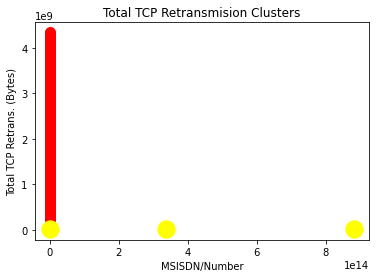


Centroids:
[[3.37540095e+10 2.15695729e+07]
 [8.82397108e+14 2.15695729e+07]
 [3.37000037e+14 2.15695729e+07]]


Min-Max Values 

Cluster 1:


Max Value(ms) 4344115651.0
Min Value(ms): 86.0
Mean Value(ms):21569572.935153
Total Value(ms): 3235414370700.0146


Cluster 2:


Max Value(ms) 21569572.935152996
Min Value(ms): 21569572.935152996
Mean Value(ms):21569572.935152996
Total Value(ms): 21569572.935152996


Cluster 3:


Max Value(ms) 21569572.935152996
Min Value(ms): 21569572.935152996
Mean Value(ms):21569572.935152996
Total Value(ms): 21569572.935152996


Optimal n_clusters - Elbow Method




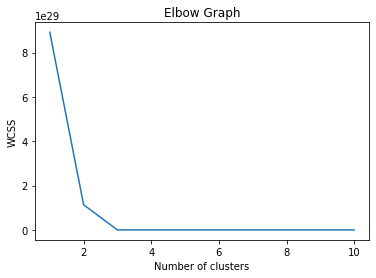

In [246]:
Cluster(db_totals_col,['MSISDN/Number', 'Total TCP Retrans. (Bytes)'], "Total TCP Retransmision Clusters",'MSISDN/Number','Total TCP Retrans. (Bytes)')

### Total Avg RTT Clusters

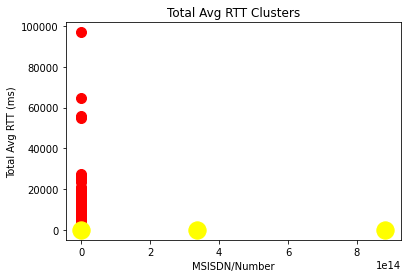


Centroids:
[[3.37540095e+10 1.27458589e+02]
 [8.82397108e+14 1.27458589e+02]
 [3.37000037e+14 1.27458589e+02]]


Min-Max Values 

Cluster 1:


Max Value(ms) 96924.0
Min Value(ms): 0.0
Mean Value(ms):127.45858896466056
Total Value(ms): 19118660.88611012


Cluster 2:


Max Value(ms) 127.45858896466059
Min Value(ms): 127.45858896466059
Mean Value(ms):127.45858896466059
Total Value(ms): 127.45858896466059


Cluster 3:


Max Value(ms) 127.45858896466059
Min Value(ms): 127.45858896466059
Mean Value(ms):127.45858896466059
Total Value(ms): 127.45858896466059


Optimal n_clusters - Elbow Method




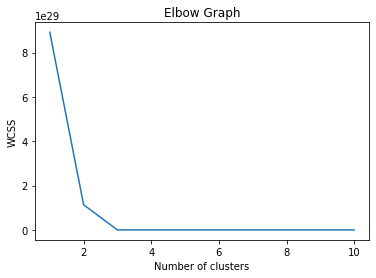

In [247]:
Cluster(db_totals_col,['MSISDN/Number', 'Total Avg RTT (ms)'], "Total Avg RTT Clusters",'MSISDN/Number','Total Avg RTT (ms)')

### Total Avg Throughput Clusters

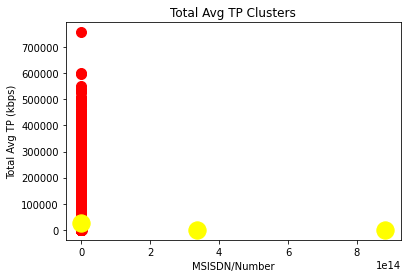


Centroids:
[[3.37540095e+10 2.66004464e+04]
 [8.82397108e+14 4.00000000e+00]
 [3.37000037e+14 2.20000000e+01]]


Min-Max Values 

Cluster 1:


Max Value(ms) 756320.0
Min Value(ms): 0.0
Mean Value(ms):26600.44635025469
Total Value(ms): 3990040352.091853


Cluster 2:


Max Value(ms) 4.0
Min Value(ms): 4.0
Mean Value(ms):4.0
Total Value(ms): 4.0


Cluster 3:


Max Value(ms) 22.0
Min Value(ms): 22.0
Mean Value(ms):22.0
Total Value(ms): 22.0


Optimal n_clusters - Elbow Method




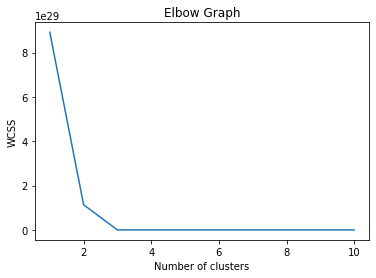

In [248]:
Cluster(db_totals_col,['MSISDN/Number', 'Total Avg TP (kbps)'], "Total Avg TP Clusters",'MSISDN/Number','Total Avg TP (kbps)')

### TCP DL Retransmission Clusters

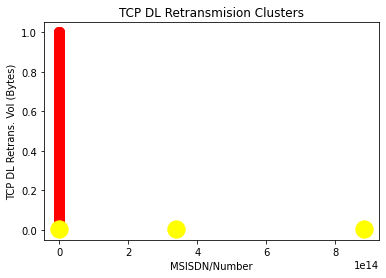


Centroids:
[[3.37540095e+10 4.84579647e-03]
 [8.82397108e+14 4.84579647e-03]
 [3.37000037e+14 4.84579647e-03]]


Min-Max Values 

Cluster 1:


Max Value(ms) 0.9999999999999999
Min Value(ms): 0.0
Mean Value(ms):0.004845796472852485
Total Value(ms): 726.8646251313999


Cluster 2:


Max Value(ms) 0.004845796472852484
Min Value(ms): 0.004845796472852484
Mean Value(ms):0.004845796472852484
Total Value(ms): 0.004845796472852484


Cluster 3:


Max Value(ms) 0.004845796472852484
Min Value(ms): 0.004845796472852484
Mean Value(ms):0.004845796472852484
Total Value(ms): 0.004845796472852484


Optimal n_clusters - Elbow Method




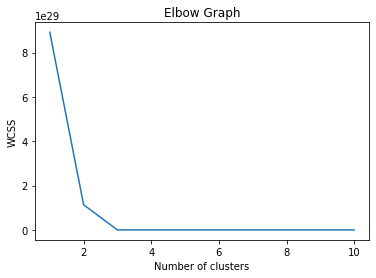

In [249]:
Cluster(db_sklearn,['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)'], "TCP DL Retransmision Clusters",'MSISDN/Number','TCP DL Retrans. Vol (Bytes)')

### TCP UL Retransmission Clusters

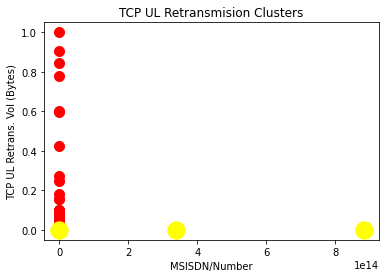


Centroids:
[[3.37540095e+10 2.61209983e-04]
 [8.82397108e+14 2.61209983e-04]
 [3.37000037e+14 2.61209983e-04]]


Min-Max Values 

Cluster 1:


Max Value(ms) 1.0
Min Value(ms): 0.0
Mean Value(ms):0.0002612099828228674
Total Value(ms): 39.181236213447285


Cluster 2:


Max Value(ms) 0.00026120998282286735
Min Value(ms): 0.00026120998282286735
Mean Value(ms):0.00026120998282286735
Total Value(ms): 0.00026120998282286735


Cluster 3:


Max Value(ms) 0.00026120998282286735
Min Value(ms): 0.00026120998282286735
Mean Value(ms):0.00026120998282286735
Total Value(ms): 0.00026120998282286735


Optimal n_clusters - Elbow Method




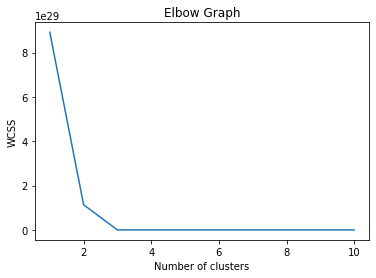

In [250]:
Cluster(db_sklearn,['MSISDN/Number', 'TCP UL Retrans. Vol (Bytes)'], "TCP UL Retransmision Clusters",'MSISDN/Number','TCP UL Retrans. Vol (Bytes)')

### Avg RTT DL Clusters

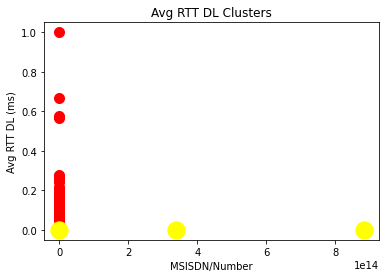


Centroids:
[[3.37540095e+10 1.13281374e-03]
 [8.82397108e+14 1.13281374e-03]
 [3.37000037e+14 1.13281374e-03]]


Min-Max Values 

Cluster 1:


Max Value(ms) 1.0
Min Value(ms): 0.0
Mean Value(ms):0.0011328137392957324
Total Value(ms): 169.92092808062057


Cluster 2:


Max Value(ms) 0.0011328137392957324
Min Value(ms): 0.0011328137392957324
Mean Value(ms):0.0011328137392957324
Total Value(ms): 0.0011328137392957324


Cluster 3:


Max Value(ms) 0.0011328137392957324
Min Value(ms): 0.0011328137392957324
Mean Value(ms):0.0011328137392957324
Total Value(ms): 0.0011328137392957324


Optimal n_clusters - Elbow Method




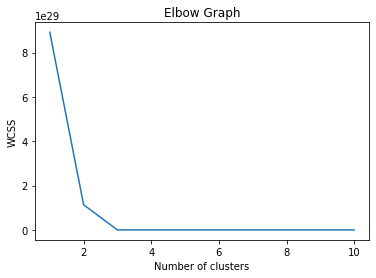

In [251]:
Cluster(db_sklearn,['MSISDN/Number', 'Avg RTT DL (ms)'], "Avg RTT DL Clusters",'MSISDN/Number','Avg RTT DL (ms)')

### Avg RTT UL Clusters

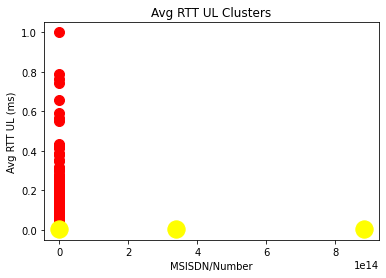


Centroids:
[[3.37540095e+10 2.48074198e-03]
 [8.82397108e+14 2.48074198e-03]
 [3.37000037e+14 2.48074198e-03]]


Min-Max Values 

Cluster 1:


Max Value(ms) 1.0
Min Value(ms): 0.0
Mean Value(ms):0.002480741981868024
Total Value(ms): 372.10881653822173


Cluster 2:


Max Value(ms) 0.0024807419818680234
Min Value(ms): 0.0024807419818680234
Mean Value(ms):0.0024807419818680234
Total Value(ms): 0.0024807419818680234


Cluster 3:


Max Value(ms) 0.0024807419818680234
Min Value(ms): 0.0024807419818680234
Mean Value(ms):0.0024807419818680234
Total Value(ms): 0.0024807419818680234


Optimal n_clusters - Elbow Method




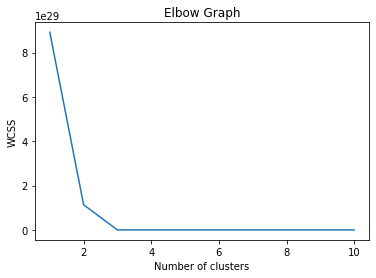

In [252]:
Cluster(db_sklearn,['MSISDN/Number', 'Avg RTT UL (ms)'], "Avg RTT UL Clusters",'MSISDN/Number','Avg RTT UL (ms)')

### Handset Type Clusters

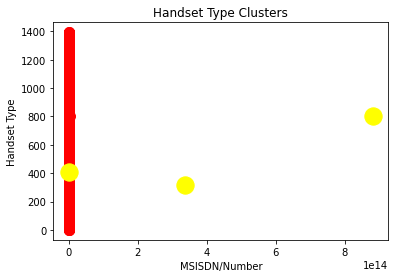


Centroids:
[[3.37540095e+10 4.05177581e+02]
 [8.82397108e+14 8.03000000e+02]
 [3.37000037e+14 3.14000000e+02]]


Min-Max Values 

Cluster 1:


Max Value(ms) 1394.0
Min Value(ms): 0.0
Mean Value(ms):405.17758118387457
Total Value(ms): 60776232.0


Cluster 2:


Max Value(ms) 803.0
Min Value(ms): 803.0
Mean Value(ms):803.0
Total Value(ms): 803.0


Cluster 3:


Max Value(ms) 314.0
Min Value(ms): 314.0
Mean Value(ms):314.0
Total Value(ms): 314.0


Optimal n_clusters - Elbow Method




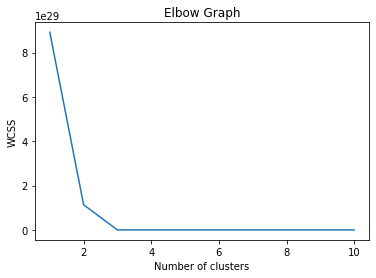

In [253]:
Cluster(db_encoded,['MSISDN/Number', 'Handset Type'], "Handset Type Clusters",'MSISDN/Number','Handset Type')

### Avg Bearer Throughput(TP) DL Clusters

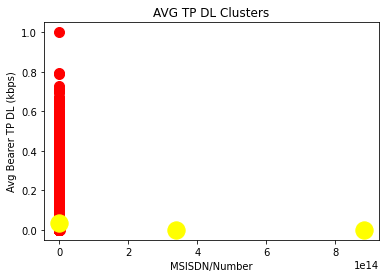


Centroids:
[[3.37540095e+10 3.51708884e-02]
 [8.82397108e+14 5.28876666e-06]
 [3.37000037e+14 2.90882166e-05]]


Min-Max Values 

Cluster 1:


Max Value(ms) 1.0
Min Value(ms): 0.0
Mean Value(ms):0.03517088844702597
Total Value(ms): 5275.598096165449


Cluster 2:


Max Value(ms) 5.288766659614978e-06
Min Value(ms): 5.288766659614978e-06
Mean Value(ms):5.288766659614978e-06
Total Value(ms): 5.288766659614978e-06


Cluster 3:


Max Value(ms) 2.9088216627882377e-05
Min Value(ms): 2.9088216627882377e-05
Mean Value(ms):2.9088216627882377e-05
Total Value(ms): 2.9088216627882377e-05


Optimal n_clusters - Elbow Method




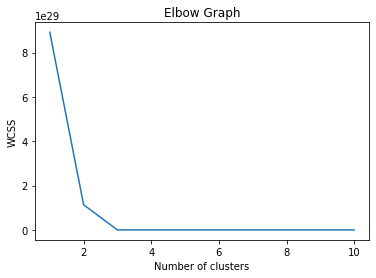

In [254]:
Cluster(db_sklearn,['MSISDN/Number', 'Avg Bearer TP DL (kbps)'], "AVG TP DL Clusters",'MSISDN/Number','Avg Bearer TP DL (kbps)')

### Avg Throughput(TP) UL Clusters

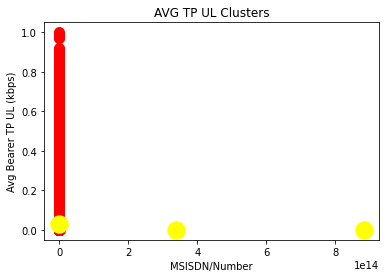


Centroids:
[[3.37540095e+10 3.02057923e-02]
 [8.82397108e+14 0.00000000e+00]
 [3.37000037e+14 3.75343354e-04]]


Min-Max Values 

Cluster 1:


Max Value(ms) 1.0
Min Value(ms): 0.0
Mean Value(ms):0.030205792330569727
Total Value(ms): 4530.8386437931285


Cluster 2:


Max Value(ms) 0.0
Min Value(ms): 0.0
Mean Value(ms):0.0
Total Value(ms): 0.0


Cluster 3:


Max Value(ms) 0.0003753433538634774
Min Value(ms): 0.0003753433538634774
Mean Value(ms):0.0003753433538634774
Total Value(ms): 0.0003753433538634774


Optimal n_clusters - Elbow Method




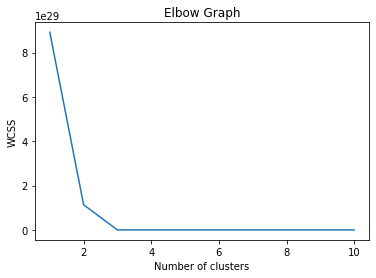

In [255]:
Cluster(db_sklearn,['MSISDN/Number', 'Avg Bearer TP UL (kbps)'], "AVG TP UL Clusters",'MSISDN/Number','Avg Bearer TP UL (kbps)')

# User Satisfaction Analysis

### Utility Functions

In [256]:
def CalculateUserEnga_Score(df,datapoint_col):

  points = df[[datapoint_col]]
  kmeans_fit = kmeans.fit(points)
  df['cluster'] = kmeans_fit.labels_

  centroids = kmeans_fit.cluster_centers_
  dists = pd.DataFrame(
      sdist.cdist(points, centroids), 
      columns=[f'dist_{i}' for i in range(len(centroids))],index=df.index)
  df = pd.concat([df, dists], axis=1)

  # Engagement score
  df["Engagement_Score"] = df[[f'dist_{i}' for i in range(len(centroids))]].max(axis = 1)
  # df = pd.concat([df,df["Engagement_Score"]],axis = 1)
  return df[["Engagement_Score"]]

  # distance between its own centroid
  
  # # points = df.drop('id', axis=1)
  # points = df[[datapoint_col]]
  # kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(points)
  # df['cluster'] = kmeans.labels_

  # centroids = kmeans.cluster_centers_
  # dist = sdist.norm(points - centroids[df['cluster']])
  # df['dist'] = dist

  # print(df)

def CalculateUserExpr_Score(df,datapoint_col):

  points = df[[datapoint_col]]
  kmeans_fit = kmeans.fit(points)
  df['cluster'] = kmeans_fit.labels_

  centroids = kmeans_fit.cluster_centers_
  dists = pd.DataFrame(
      sdist.cdist(points, centroids), 
      columns=[f'dist_{i}' for i in range(len(centroids))],index=df.index)
  df = pd.concat([df, dists], axis=1)

  df["Experience_Score"] = df[[f'dist_{i}' for i in range(len(centroids))]].max(axis = 1)
  # df = pd.concat([df,df["Experience_Score"]],axis = 1)
  return df[["Experience_Score"]]



### Duration Engagement Score

In [257]:
db_engag = db_totals_col.copy()

In [258]:
engage_score_dur = CalculateUserEnga_Score(db_totals_col, "Dur. (ms)")
db_engag["Engagement_Score_Dur"] = engage_score_dur["Engagement_Score"]
db_engag[['MSISDN/Number', 'Engagement_Score_Dur']]


MSISDN/Number  Engagement_Score_Dur
0      33,664,962,239.00          1,755,119.31
1      33,681,854,413.00          1,296,571.31
2      33,760,627,129.00          1,293,229.31
3      33,750,343,200.00          1,252,976.31
4      33,699,795,932.00          1,020,476.31
...                  ...                   ...
149996 33,650,688,697.00            363,681.89
149997 33,663,449,963.00            346,941.89
149998 33,621,890,103.00            346,662.89
149999 33,619,622,058.00            347,001.89
150000 41,882,819,545.03            340,303.33

[150001 rows x 2 columns]

### Total Bytes Engagement Score

In [259]:
engage_score_total = CalculateUserEnga_Score(db_totals_col, 'Total Bytes')
db_engag["Engagement_Score_Total"] = engage_score_total["Engagement_Score"]
db_engag[['MSISDN/Number', 'Engagement_Score_Total']]#.head(10)


MSISDN/Number  Engagement_Score_Total
0      33,664,962,239.00          431,089,224.77
1      33,681,854,413.00          495,422,817.27
2      33,760,627,129.00          469,027,628.77
3      33,750,343,200.00          677,590,209.27
4      33,699,795,932.00          395,918,864.27
...                  ...                     ...
149996 33,650,688,697.00          420,041,571.27
149997 33,663,449,963.00          494,021,386.27
149998 33,621,890,103.00          415,936,090.27
149999 33,619,622,058.00          375,196,585.77
150000 41,882,819,545.03          284,002,097.64

[150001 rows x 2 columns]

# Expereince Score

In [260]:
db_exper = db_totals_col.copy()

### Total TCP Retransmission Experience Score

In [261]:
exper_score_total_TCP = CalculateUserExpr_Score(db_totals_col, 'Total TCP Retrans. (Bytes)')
db_exper["Experience_Score_Total_TCP"] = exper_score_total_TCP["Experience_Score"]
db_exper[['MSISDN/Number', 'Experience_Score_Total_TCP']]#.head(10)


MSISDN/Number  Experience_Score_Total_TCP
0      33,664,962,239.00            3,086,832,429.79
1      33,681,854,413.00            3,086,832,429.79
2      33,760,627,129.00            3,086,832,429.79
3      33,750,343,200.00            3,086,832,429.79
4      33,699,795,932.00            3,086,832,429.79
...                  ...                         ...
149996 33,650,688,697.00            3,086,832,429.79
149997 33,663,449,963.00            3,086,832,429.79
149998 33,621,890,103.00            3,086,832,429.79
149999 33,619,622,058.00            3,086,832,429.79
150000 41,882,819,545.03            3,086,832,429.79

[150001 rows x 2 columns]

### Total RTT Experience Score

In [262]:
exper_score_total_RTT = CalculateUserExpr_Score(db_totals_col, 'Total Avg RTT (ms)')
db_exper["Experience_Score_Total_RTT"] = exper_score_total_RTT["Experience_Score"]
db_exper[['MSISDN/Number', 'Experience_Score_Total_RTT']]#.head(10)


MSISDN/Number  Experience_Score_Total_RTT
0      33,664,962,239.00                   68,009.25
1      33,681,854,413.00                   67,986.25
2      33,760,627,129.00                   67,928.79
3      33,750,343,200.00                   67,928.79
4      33,699,795,932.00                   67,928.79
...                  ...                         ...
149996 33,650,688,697.00                   68,024.25
149997 33,663,449,963.00                   68,027.25
149998 33,621,890,103.00                   68,007.25
149999 33,619,622,058.00                   68,014.25
150000 41,882,819,545.03                   67,928.79

[150001 rows x 2 columns]

### Total TP Experience Score

In [263]:
exper_score_total_TP = CalculateUserExpr_Score(db_totals_col, 'Total Avg TP (kbps)')
db_exper["Experience_Score_Total_TP"] = exper_score_total_TP["Experience_Score"]
db_exper[['MSISDN/Number', 'Experience_Score_Total_TP']]#.head(10)



MSISDN/Number  Experience_Score_Total_TP
0      33,664,962,239.00                 179,846.79
1      33,681,854,413.00                 179,860.79
2      33,760,627,129.00                 179,880.79
3      33,750,343,200.00                 179,804.79
4      33,699,795,932.00                 179,880.79
...                  ...                        ...
149996 33,650,688,697.00                 179,788.79
149997 33,663,449,963.00                 179,846.79
149998 33,621,890,103.00                 179,806.79
149999 33,619,622,058.00                 179,824.79
150000 41,882,819,545.03                 153,292.70

[150001 rows x 2 columns]


# Satisfaction Score

### Engagement Satisfaction Score

In [264]:
satisf_score_engag = (db_engag['Engagement_Score_Dur'] + db_engag['Engagement_Score_Total'])/2.0
db_engag["Engagement_Satisf_Score"] = satisf_score_engag
db_engag[['MSISDN/Number', 'Engagement_Satisf_Score']].head(10)

MSISDN/Number  Engagement_Satisf_Score
0 33,664,962,239.00           216,422,172.04
1 33,681,854,413.00           248,359,694.29
2 33,760,627,129.00           235,160,429.04
3 33,750,343,200.00           339,421,592.79
4 33,699,795,932.00           198,469,670.29
5 33,668,185,951.00           287,001,766.29
6 33,665,368,271.00           329,599,018.54
7 33,763,490,140.00           311,641,789.79
8 33,698,743,617.00           346,542,984.79
9 33,659,219,748.00           331,010,866.29

### Experience Satisfaction Score

In [265]:
satisf_score_exper= (db_exper['Experience_Score_Total_TCP'] + db_exper['Experience_Score_Total_RTT'] + db_exper['Experience_Score_Total_TP'])/3.0
db_exper["Experience_Satisf_Score"] = satisf_score_exper
# db_exper.rename(columns = {'Satisf_Score':'Experience_Satisf_Score'})
db_exper[['MSISDN/Number', 'Experience_Satisf_Score']].head(10)

MSISDN/Number  Experience_Satisf_Score
0 33,664,962,239.00         1,029,026,761.94
1 33,681,854,413.00         1,029,026,758.94
2 33,760,627,129.00         1,029,026,746.46
3 33,750,343,200.00         1,029,026,721.12
4 33,699,795,932.00         1,029,026,746.46
5 33,668,185,951.00         1,029,026,703.79
6 33,665,368,271.00         1,029,026,742.61
7 33,763,490,140.00         1,035,954,440.03
8 33,698,743,617.00         1,029,026,719.79
9 33,659,219,748.00         1,035,134,510.26

## Engagement Satisfaction Cluster

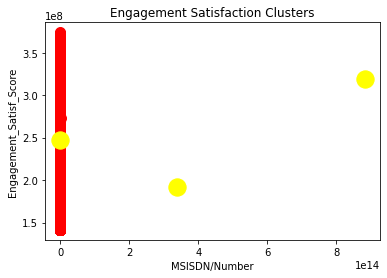


Centroids:
[[3.37540095e+10 2.47179706e+08]
 [8.82397108e+14 3.19183134e+08]
 [3.37000037e+14 1.92358584e+08]]


Min-Max Values 

Cluster 1:


Max Value(ms) 374078737.8297056
Min Value(ms): 141364038.82970563
Mean Value(ms):247179705.52258343
Total Value(ms): 37076708648681.99


Cluster 2:


Max Value(ms) 319183133.5393588
Min Value(ms): 319183133.5393588
Mean Value(ms):319183133.5393588
Total Value(ms): 319183133.5393588


Cluster 3:


Max Value(ms) 192358583.5779677
Min Value(ms): 192358583.5779677
Mean Value(ms):192358583.5779677
Total Value(ms): 192358583.5779677


Optimal n_clusters - Elbow Method




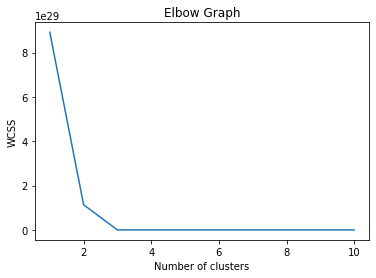

In [267]:
Cluster(db_engag,['MSISDN/Number', 'Engagement_Satisf_Score'], "Engagement Satisfaction Clusters",'MSISDN/Number','Engagement_Satisf_Score')

## Experience Satisfaction Cluster

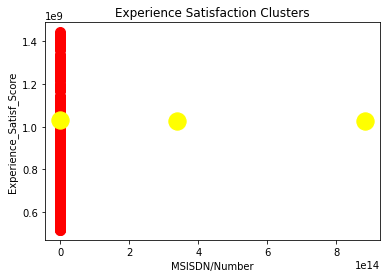


Centroids:
[[3.37540095e+10 1.03022558e+09]
 [8.82397108e+14 1.02902675e+09]
 [3.37000037e+14 1.02902674e+09]]


Min-Max Values 

Cluster 1:


Max Value(ms) 1442755122.349083
Min Value(ms): 516221747.8666125
Mean Value(ms):1030225583.7635739
Total Value(ms): 154532807338952.3


Cluster 2:


Max Value(ms) 1029026749.1238664
Min Value(ms): 1029026749.1238664
Mean Value(ms):1029026749.1238664
Total Value(ms): 1029026749.1238664


Cluster 3:


Max Value(ms) 1029026743.1238664
Min Value(ms): 1029026743.1238664
Mean Value(ms):1029026743.1238664
Total Value(ms): 1029026743.1238664


Optimal n_clusters - Elbow Method




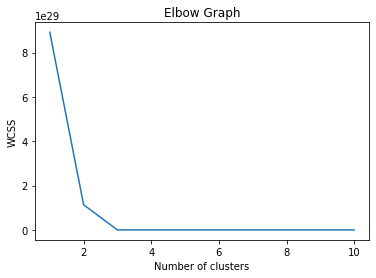

In [269]:
Cluster(db_exper,['MSISDN/Number', 'Experience_Satisf_Score'], "Experience Satisfaction Clusters",'MSISDN/Number','Experience_Satisf_Score')

## Engagement Clusters

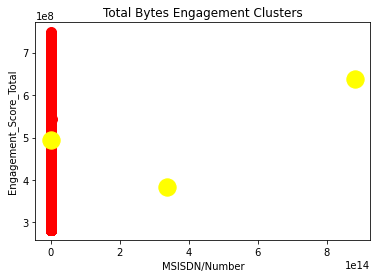


Centroids:
[[3.37540095e+10 4.94010071e+08]
 [8.82397108e+14 6.37564956e+08]
 [3.37000037e+14 3.84525285e+08]]


Min-Max Values 

Cluster 1:


Max Value(ms) 747762494.773324
Min Value(ms): 282479630.773324
Mean Value(ms):494010070.55591697
Total Value(ms): 74101016573316.98


Cluster 2:


Max Value(ms) 637564955.773324
Min Value(ms): 637564955.773324
Mean Value(ms):637564955.773324
Total Value(ms): 637564955.773324


Cluster 3:


Max Value(ms) 384525285.26984817
Min Value(ms): 384525285.26984817
Mean Value(ms):384525285.26984817
Total Value(ms): 384525285.26984817


Optimal n_clusters - Elbow Method




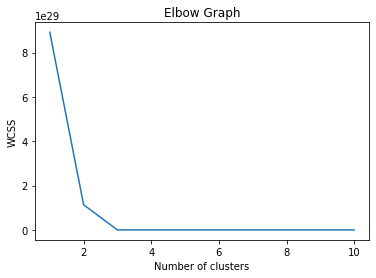

In [270]:
Cluster(db_engag,['MSISDN/Number', 'Engagement_Score_Total'], "Total Bytes Engagement Clusters",'MSISDN/Number','Engagement_Score_Total')

## Experience Cluster

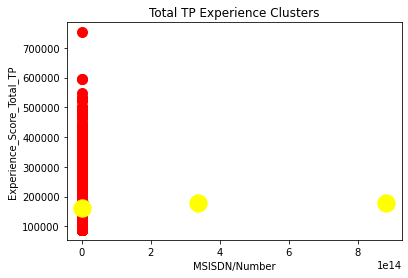


Centroids:
[[3.37540095e+10 1.63282950e+05]
 [8.82397108e+14 1.79888795e+05]
 [3.37000037e+14 1.79870795e+05]]


Min-Max Values 

Cluster 1:


Max Value(ms) 752434.628997548
Min Value(ms): 88004.79450114118
Mean Value(ms):163282.95025330136
Total Value(ms): 24492279255.044952


Cluster 2:


Max Value(ms) 179888.79450114118
Min Value(ms): 179888.79450114118
Mean Value(ms):179888.79450114118
Total Value(ms): 179888.79450114118


Cluster 3:


Max Value(ms) 179870.79450114118
Min Value(ms): 179870.79450114118
Mean Value(ms):179870.79450114118
Total Value(ms): 179870.79450114118


Optimal n_clusters - Elbow Method




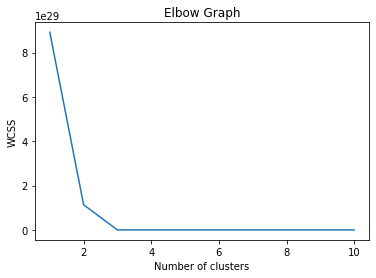

'Experience_Score_Total_TP'

In [271]:
Cluster(db_exper,['MSISDN/Number', 'Experience_Score_Total_TP'], "Total TP Experience Clusters",'MSISDN/Number','Experience_Score_Total_TP')
'Experience_Score_Total_TP'

### MySQL Table Columns

In [274]:
# eng_score_total= db_engag['Engagement_Score_Dur'] + db_engag['Engagement_Score_Total']
# exper_score_total= db_exper['Experience_Score_Total_TCP'] + db_exper['Experience_Score_Total_RTT'] + db_exper['Experience_Score_Total_TP']
db_1 = db_engag[['MSISDN/Number','Engagement_Score_Dur', 'Engagement_Score_Total','Engagement_Satisf_Score']]
db_2 = db_exper[['Experience_Score_Total_TCP', 'Experience_Score_Total_RTT','Experience_Score_Total_TP', 'Experience_Satisf_Score']]
db_mysql = pd.concat([db_1,db_2], axis = 1)
db_mysql
# db_mysql[["MSISDN_Number", "Engagement_Score", "Experience_Score", "Satisfaction_Score"]] = 

MSISDN/Number  Engagement_Score_Dur  Engagement_Score_Total  \
0      33,664,962,239.00          1,755,119.31          431,089,224.77   
1      33,681,854,413.00          1,296,571.31          495,422,817.27   
2      33,760,627,129.00          1,293,229.31          469,027,628.77   
3      33,750,343,200.00          1,252,976.31          677,590,209.27   
4      33,699,795,932.00          1,020,476.31          395,918,864.27   
...                  ...                   ...                     ...   
149996 33,650,688,697.00            363,681.89          420,041,571.27   
149997 33,663,449,963.00            346,941.89          494,021,386.27   
149998 33,621,890,103.00            346,662.89          415,936,090.27   
149999 33,619,622,058.00            347,001.89          375,196,585.77   
150000 41,882,819,545.03            340,303.33          284,002,097.64   

        Engagement_Satisf_Score  Experience_Score_Total_TCP  \
0                216,422,172.04            3,086,832,429.79   
1                248,359,694.29            3,086,832,429.79   
2                235,160,429.04            3,086,832,429.79   
3                339,421,592.79            3,086,832,429.79   
4                198,469,670.29            3,086,832,429.79   
...                         ...                         ...   
149996           210,202,626.58            3,086,832,429.79   
149997           247,184,164.08            3,086,832,429.79   
149998           208,141,376.58            3,086,832,429.79   
149999           187,771,793.83            3,086,832,429.79   
150000           142,171,200.48            3,086,832,429.79   

        Experience_Score_Total_RTT  Experience_Score_Total_TP  \
0                        68,009.25                 179,846.79   
1                        67,986.25                 179,860.79   
2                        67,928.79                 179,880.79   
3                        67,928.79                 179,804.79   
4                        67,928.79                 179,880.79   
...                            ...                        ...   
149996                   68,024.25                 179,788.79   
149997                   68,027.25                 179,846.79   
149998                   68,007.25                 179,806.79   
149999                   68,014.25                 179,824.79   
150000                   67,928.79                 153,292.70   

        Experience_Satisf_Score  
0              1,029,026,761.94  
1              1,029,026,758.94  
2              1,029,026,746.46  
3              1,029,026,721.12  
4              1,029,026,746.46  
...                         ...  
149996         1,029,026,747.61  
149997         1,029,026,767.94  
149998         1,029,026,747.94  
149999         1,029,026,756.28  
150000         1,029,017,883.76  

[150001 rows x 8 columns]

In [290]:
db_mysql.to_csv("/content/drive/MyDrive/Colab Notebooks/data/User_Scores.csv",
                header = True, index = False)

In [275]:
db_mysql.columns

Index(['MSISDN/Number', 'Engagement_Score_Dur', 'Engagement_Score_Total',
       'Engagement_Satisf_Score', 'Experience_Score_Total_TCP',
       'Experience_Score_Total_RTT', 'Experience_Score_Total_TP',
       'Experience_Satisf_Score'],
      dtype='object')